<a href="https://colab.research.google.com/github/chicolucio/panorama-covid-mundo/blob/master/projeto_covid_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no mundo

Por: [Francisco Bustamante](https://franciscobustamante.com.br/)

*Recomendada a abertura do notebook do Google Colab para uma melhor visualização.*

---

A COVID-19 é uma doença infecciosa causada por um recém-descoberto coronavírus.

Completamos pouco mais de 2 anos desde o surgimento do vírus COVID-19. As medidas para controle pandêmico adotadas por governos em todo mundo  afetaram significativamente a rotina de todos. É de grande interesse acompanharmos a evolução da pandemia para saber seus reais efeitos e avaliar o retorno ao convívio normal.

<center><img alt="covid_banner" width="70%" src="https://raw.githubusercontent.com/chicolucio/panorama-covid-mundo/master/images/evolucao_casos_banner.gif"></center>

Neste trabalho, uma análise exploratória dos dados fornecidos pela Our World in Data (OWID) é feita, mostrando o avanço temporal de casos, óbitos e vacinação. Estudos comparativos e busca de correlações são feitos com intuito de melhor compreender os dados. Animações como a mostrada acima serão criadas e interpretadas.

## Obtenção dos dados


<center><img alt="covid_banner" width="10%" src="https://ourworldindata.org/uploads/2019/02/OurWorldinData-logo.png"></center>

Como já citado, os dados aqui utilizados são fornecidos pela *Our World in Data* (OWID) [neste repositório](https://github.com/owid/covid-19-data), uma organização que reúne pesquisadores de todo o mundo para agregar dados de diversas fontes sobre os mais diversos problemas contemporâneos.

Obviamente, por ser uma doença recente, cuidados devem ser tomados no que diz respeito à interpretação dos dados e relações de causa e efeito. Como será mostrado adiante, nem todos os países fornecem dados completos e há algumas inconsistências nos dados a depender de suas origens. Além disso, com o crescente conhecimento a respeito da doença, por vezes se faz necessário alterar a forma de agregar os dados, causando algumas dificuldades de análise temporal. Não podemos ignorar também o fato de que, infelizmente, a visão passada por veículos de mídia e governantes para população pode variar e ser distorcida a depender dos interesses momentâneos dos mesmos.

Assim, durante esse estudo, especial cuidado é destinado em apresentar os dados e buscar interpretá-los de forma rigorosa deixando claro eventuais limitações, conflitos e condições de contorno de cada análise. E, sempre lembrando, correlações não implicam em causalidade.

### Dicionário de variáveis

A base de dados da OWID apresenta 67 variáveis (colunas). Para deixar o trabalho mais fácil de entender, segue  o significado de cada variável divido por categoria para que o leitor possa consultar se achar necessário:

* Categoria geral / outros

|Atributo|Descrição|
|:-------|:---------|
| iso_code | Código de 3 letras para o país definido de acordo com a [ISO 3166-1 alfa-3](https://pt.wikipedia.org/wiki/ISO_3166-1_alfa-3)|
| continent | Continente do país ou região|
| location | Nome do país ou região|
| date | Data da observação|
| population | População em 2020.|
| population_density | Número de pessoas dividido pela área terrestre, medido em quilômetros quadrados, para o ano mais recente disponível|
| median_age | Mediana da idade da população de acordo com projeção da ONU para 2020|
| aged_65_older | Parcela da população com 65 anos ou mais, considerando o ano mais recente disponível|
| aged_70_older | Parcela da população com 70 anos ou mais em 2015|
| gdp_per_capita | Produto interno bruto per capita para o ano mais recente disponível|
| extreme_poverty | Parcela da população que vive em pobreza extrema, para o ano mais recente disponível desde 2010|
| cardiovasc_death_rate | Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)|
| diabetes_prevalence | Prevalência de diabetes (% da população de 20 a 79 anos) em 2017|
| female_smokers | Parcela de mulheres que fumam, ano mais recente disponível|
| male_smokers | Parcela de homens que fumam, ano mais recente disponível|
| handwashing_facilities | Parcela da população com instalações básicas para lavagem das mãos, ano mais recente disponível|
| hospital_beds_per_thousand | Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010|
| life_expectancy | Expectativa de vida ao nascer em 2019|
| human_development_index | Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano: uma vida longa e saudável,<br>conhecimento e um padrão de vida decente. Valores para 2019|


* Categoria casos

|Atributo|Descrição|
|:-------|:---------|
| total_cases | Total de casos confirmados de COVID-19|
| new_cases | Novos casos confirmados de COVID-19.|
| new_cases_smoothed | Novos casos confirmados (média móvel de 7 dias).|
| total_cases_per_million | Total de casos de COVID-19 por milhão de pessoas.
| new_cases_per_million | Novos casos confirmados de COVID-19 por milhão de pessoas.
| new_cases_smoothed_per_million | Novos casos confirmados de COVID-19 por milhão de pessoas (média móvel de 7 dias).

* Categoria mortes

|Atributo|Descrição|
|:-------|:---------|
| total_deaths | Total de mortes atribuídas ao COVID-19.|
| new_deaths | Novas mortes atribuídas ao COVID-19 .|
| new_deaths_smoothed | Novas mortes atribuídas ao COVID-19 (média móvel de 7 dias).
| total_deaths_per_million | Total de mortes por COVID-19 por milhão de pessoas.
| new_deaths_per_million | Novas mortes por COVID-19 por milhão de pessoas.
| new_deaths_smoothed_per_million | Novas mortes por COVID-19 por milhão de pessoas (média móvel de 7 dias).

* Categoria taxa de reprodução (R)

|Atributo|Descrição|
|:-------|:---------|
| reproduction_rate | Estimativa em tempo real da taxa efetiva de reprodução (R) do COVID-19.

* Categoria hospitalização e UTI

|Atributo|Descrição|
|:-------|:---------|
| icu_patients | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um dado dia
| icu_patients_per_million | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um dado dia por milhão de pessoas
| hosp_patients | Número de pacientes hospitalizados em um dado dia
| hosp_patients_per_million | Número de pacientes hospitalizados em um dado dia por milhão de pessoas 
| weekly_icu_admissions | Número de novos pacientes em UTI em uma dada semana. 
| weekly_icu_admissions_per_million | Número de novos pacientes em UTI em uma dada semana por milhão de pessoas
| weekly_hosp_admissions | Número de novos pacientes com COVID-19 hospitalizados em uma dada semana.
| weekly_hosp_admissions_per_million | Número de novos pacientes com COVID-19 hospitalizados em uma dada semana por milhão de pessoas

* Categoria testes

|Atributo|Descrição|
|:-------|:---------|
| total_tests | Total de testes para COVID-19 
| new_tests | Novos testes para COVID-19 (calculado apenas para dias consecutivos)
| total_tests_per_thousand | Total de testes para COVID-19 por mil pessoas
| new_tests_per_thousand | Novos testes para COVID-19 por mil pessoas.
| new_tests_smoothed | Novos testes para COVID-19 (média móvel de 7 dias)
| new_tests_smoothed_per_thousand | Novos testes para COVID-19 (média móvel 7 dias) por mil pessoas.
| positive_rate | A parcela de testes COVID-19 que são positivos, dada como uma média móvel de 7 dias (é o inverso de _`tests_per_case`_).
| tests_per_case | Testes conduzidos para cada novo caso confirmado de COVID-19, dado como uma média móvel de 7 dias (é o inverso de _`positive_rate`_)
| tests_units | Unidades usadas pela localidade para reportar os dados de testes

* Categoria vacinação

|Atributo|Descrição|
|:-------|:---------|
| total_vaccinations | Total de vacinas administradas
| people_vaccinated | Total de pessoas que receberam pelo menos uma dose da vacina
| people_fully_vaccinated | Total de pessoas que receberam todas as doses prescritas pelos protocolos de vacinação
| total_boosters | Número de doses administradas além das previstas no protocolo inicial de vacinação (doses de reforço)
| new_vaccinations | Novas doses de vacinas administradas (contado apenas para dias consecutivos)
| new_vaccinations_smoothed | Novas doses de vacinas administradas (média móvel de 7 dias)
| total_vaccinations_per_hundred | Quantidade de doses administradas por 100 pessoas
| people_vaccinated_per_hundred | Total de pessoas que receberam pelo menos uma dose da vacina por 100 pessoas 
| people_fully_vaccinated_per_hundred | Total de pessoas que receberam todas as doses preescritas pelo protocolo de vacinação por 100 pessoas
| total_boosters_per_hundred | Número de doses administradas além das previstas no protocolo inicial de vacinação (doses de reforço) por 100 pessoas
| new_vaccinations_smoothed_per_million | Novas doses de vacina administradas (média móvel de 7 dias) por milhão de pessoas
| new_people_vaccinated_smoothed | Número de pessoas recebendo sua primeira dose (média móvel de 7 dias)
| new_people_vaccinated_smoothed_per_hundred | Número de pessoas recebendo sua primeira dose (média móvel de 7 dias) por 100 pessoas

* Categoria política governamental

|Atributo|Descrição|
|:-------|:---------|
| stringency_index | Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, <br>incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens, <br>redimensionado para um valor de 0 a 100 (100 = resposta mais estrita)|

* Categoria excesso de mortes

|Atributo|Descrição|
|:-------|:---------|
| excess_mortality | diferença percentual entre o número reportado de mortes semanal ou mensalmente em 2020-2021 e o número projetado com base em anos anteriores
| excess_mortality_cumulative | idem anterior, sendo que acumulado desde Janeiro de 2020
| excess_mortality_cumulative_absolute | idem anterior, mas em números absolutos ao invés de percentuais
| excess_mortality_cumulative_per_million | idem anterior, por milhão de pessoas

### Importando os dados e pacotes necessários

O pacote [Pandas](https://pandas.pydata.org/) foi utilizado para trabalhar com os dados e construir matrizes de correlações. Os pacotes [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) e [Plotly](https://plotly.com/) foram utilizados para construir os gráficos. Funções foram criadas para padronizar os estilos de cada tipo de gráfico utilizado no trabalho. Tais funções se encontram no arquivo `plots.py` no repositório do estudo e são importadas na célula a seguir.  A biblioteca `datetime`, presente em uma instalação padrão do Python, foi utilizada para lidar com datas. 

In [1]:
# Para que toda a parte gráfica funcione, são necessárias versões
# recentes de algumas bibliotecas. Rode esta célula de forma
# independente (sem usar a opção de rodar todas).
# Depois que visualizar a mensagem "Reiniciando o kernel..."
# pode usar a opção de rodar todas as células a seguir, se desejar.
# Mensagens de erro de kernel podem ser ignoradas.

print('Instalando bibliotecas. Aguarde alguns instantes.')

!pip install matplotlib==3.5.1 -q &> /dev/null 
!pip install plotly==5.8.0 -q &> /dev/null
!pip install pandas==1.4.2 -q &> /dev/null

# from IPython import get_ipython

print('🔁 Reinicie o kernel...')
# get_ipython().kernel.do_shutdown(True)

Instalando bibliotecas. Aguarde alguns instantes.
🔁 Reinicie o kernel...


In [2]:
print('Clonando o repositório. Aguarde, pode demorar uns instantes.')
!git clone https://github.com/chicolucio/panorama-covid-mundo &> /dev/null
%cd -q panorama-covid-mundo

print('Importando bibliotecas e criando dataframe inicial.') 
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# funções criadas especificamente para os gráficos deste estudo
from plots import (eng_format, eng_format_k, linear_log_scales, winter,
                   hbars_top10, comparing_locations, treemap, animated_map,
                   bubble_scatter)

from IPython.display import display, HTML


CODEBOOK = 'data/owid-covid-codebook.csv'
DATA = 'data/owid-covid-data.csv'

codebook = pd.read_csv(CODEBOOK)
df = pd.read_csv(DATA)

print('Tudo OK. Notebook pronto para uso.')  

Clonando o repositório. Aguarde, pode demorar uns instantes.
Importando bibliotecas e criando dataframe inicial.
Tudo OK. Notebook pronto para uso.


Como visto, foram importados dois arquivos csv. O `codeboook` é a fonte das informações apresentadas anteriormente no dicionário de variáveis, sendo que contém também a origem de cada uma das informações. Vamos ver as 5 primeiras entradas:

In [3]:
codebook.head()

column                                             source  \
0     iso_code     International Organization for Standardization   
1    continent                                  Our World in Data   
2     location                                  Our World in Data   
3         date                                  Our World in Data   
4  total_cases  COVID-19 Data Repository by the Center for Sys...   

          category                                        description  
0           Others    ISO 3166-1 alpha-3 – three-letter country codes  
1           Others             Continent of the geographical location  
2           Others                              Geographical location  
3           Others                                Date of observation  
4  Confirmed cases  Total confirmed cases of COVID-19. Counts can ...

O `df` é a base de dados em si. Vamos ver as primeiras entradas e uma breve descrição dos dados:

In [4]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [5]:
print('Dimensões da base de dados',
      '\nVariáveis: ', df.shape[1],
      '\nEntradas: ', df.shape[0])

Dimensões da base de dados 
Variáveis:  67 
Entradas:  187097


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187097 entries, 0 to 187096
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    187097 non-null  object 
 1   continent                                   176205 non-null  object 
 2   location                                    187097 non-null  object 
 3   date                                        187097 non-null  object 
 4   total_cases                                 179712 non-null  float64
 5   new_cases                                   179418 non-null  float64
 6   new_cases_smoothed                          178246 non-null  float64
 7   total_deaths                                161354 non-null  float64
 8   new_deaths                                  161330 non-null  float64
 9   new_deaths_smoothed                         160173 non-null  float64
 

### Avaliando ausência de dados

Vemos acima que há entradas com muitos dados ausentes. Vamos olhar com mais detalhes a proporção de dados ausentes por entrada e categoria:

In [7]:
categories = codebook['category'].unique()

columns_per_category = {}

for cat in categories:
    columns_per_category[cat] = tuple(codebook.loc[codebook['category'] == cat]['column'])

print('Fração de dados ausentes por entrada de cada categoria'.center(80))
print('-' * 80)
print()
    
for cat in columns_per_category:
    print(f'{cat.upper():^30}')
    print((df[list(columns_per_category[cat])].isnull().sum() / df.shape[0]).sort_values(ascending=False))
    print()

             Fração de dados ausentes por entrada de cada categoria             
--------------------------------------------------------------------------------

            OTHERS            
handwashing_facilities        0.595039
extreme_poverty               0.463514
male_smokers                  0.385126
female_smokers                0.376580
hospital_beds_per_thousand    0.268636
human_development_index       0.197106
aged_65_older                 0.182649
gdp_per_capita                0.178538
aged_70_older                 0.178223
cardiovasc_death_rate         0.175716
median_age                    0.173888
diabetes_prevalence           0.135475
population_density            0.108874
life_expectancy               0.064822
continent                     0.058216
population                    0.006131
date                          0.000000
location                      0.000000
iso_code                      0.000000
dtype: float64

       CONFIRMED CASES        
new_cases_smoothed

Vemos que há maior proporção de dados ausentes nas categorias referentes a hospitalizações, testes, vacinações e excesso de mortalidade. Cada categoria possui justificativas para as ausências (todas descritas no [repositório oficial](https://github.com/owid/covid-19-data) e resumidas a seguir):

- *hospitalizações*: os dados são obtidos apenas de países europeus e de alguns poucos países de outros continentes como, por exemplo, os Estados Unidos. Por tal restrição, não serão feitas análises com tais dados neste estudo.

- *testes*: ainda há países sem dados oficiais de testagem. Além disso, cada país adota um calendário de publicação de dados de testagem distinto, de forma que a própria base de dados é atualizada apenas semanalmente. Por fim, [nem todas as formas de testagem](https://ourworldindata.org/coronavirus-testing#our-checklist-for-covid-19-testing-data) são consideradas na inclusão na base de dados.

- *vacinações*: há países sem dados oficiais. Além disso, cada país adota um calendário de publicação de dados  distinto. E, obviamente, a vacinação começou apenas no final de 2020, de forma que as datas anteriores não possuem registros de vacinação.

- *excesso de mortalidade*: a depender do país, o número é reportado semanalmente ou mensalmente, de forma que há ausência de registro em diversas datas. Diversos países não atendem [aos critérios](https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality) necessários para a inclusão, não tendo registros na base de dados.

### Fixando uma data limite para as análises

A base de dados baixada apresenta dados até 17 de maio de 2022, quando foi obtida. Porém, como vimos, há alguns dados cuja periodicidade é diferenciada. Desta forma, vamos considerar como última data para análise **30 de abril de 2022** para termos apenas meses fechados, *de janeiro de 2020 até abril de 2022*.

In [8]:
df['date'] = pd.to_datetime(df['date'])
first_date = min(df.dropna(subset=['total_cases'])['date'])  # data dos primeiros casos registrados
last_date = datetime.fromisoformat('2022-04-30')
first_date, last_date

(Timestamp('2020-01-22 00:00:00'), datetime.datetime(2022, 4, 30, 0, 0))

In [9]:
df = df.loc[df['date'] <= last_date]

## Evolução do número de casos

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/3d-medical-grunge-background-with-abstract-coronavirus-cells_1048-11987.jpg"></center>

Vamos começar nossa análise avaliando a evolução no número total de casos em todo o mundo.

### Total de casos

#### Mundo

Muito do que é exposto nas mídias foca na quantidade total de casos por país ou mundialmente. Vamos avaliar o perfil de crescimento no número de casos mundial:

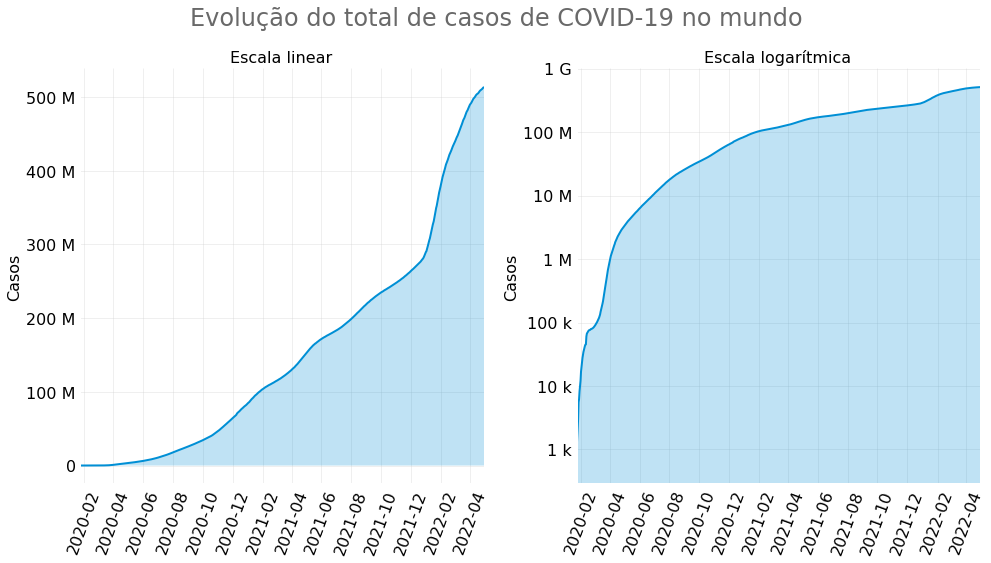

In [10]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'total_cases'],
                  y_axis_name = 'Casos',
                  sup_title = 'Evolução do total de casos de COVID-19 no mundo')

Vemos que, desde o surgimento em meados de janeiro de 2020, foram necessários cerca de 3 meses para atingir 1 milhão de casos e 1 ano para 100 milhões de casos. Lembrando que esses são os casos efetivamente computados devido a testagem ou procura das pessoas pelas redes de saúde. O número real é potencialmente maior tendo em vista que há casos brandos ou assintomáticos, de maneira que os indivíduos não procuram as redes de saúde. De qualquer forma, considerando que a população mundial é estimada na ordem de 7,8 bilhões de pessoas, **o número de casos até o momento indica que cerca de 6 % da população mundial já teve a doença**.

Muito se fala das variantes do vírus. A Organização Mundial da Saúde (OMS) em [seu site](https://www.who.int/en/activities/tracking-SARS-CoV-2-variants/) descreve os critérios para considerar uma determinada variante como sendo de interesse ou preocupante. A OMS também esclarece que os nomes são dados um certo tempo depois que as primeiras amostras de cada variante são analisadas, conforme a tabela:

| Variante | Data da primeira amostra | Data do nome |
|:------|:--------|:--------|
| alfa | Setembro/2020 - Reino Unido | Dezembro de 2020 
| beta | Maio/2020 - África do Sul | Dezembro de 2020 
| gama | Novembro/2020 - Brasil | Janeiro de 2021
| delta | Outubro/2020 - Índia | Abril de 2021
| lambda | Dezembro/2020 - Peru | Junho de 2021
| mu | Janeiro/2021 - Colômbia | Agosto de 2021
| ômicron | Novembro/2021 - Diversos | Novembro de 2021

Neste estudo, *optou-se por utilizar a data da primeira amostra nos gráficos*, motivo pelo qual a beta aparece antes da alfa. Tal escolha se deve ao fato de a variante já estar se espalhando desde a data de amostra independentemente de ter recebido um nome. Vamos adicionar aos gráficos anteriores linhas indicando as datas de aparecimento de cada variante:

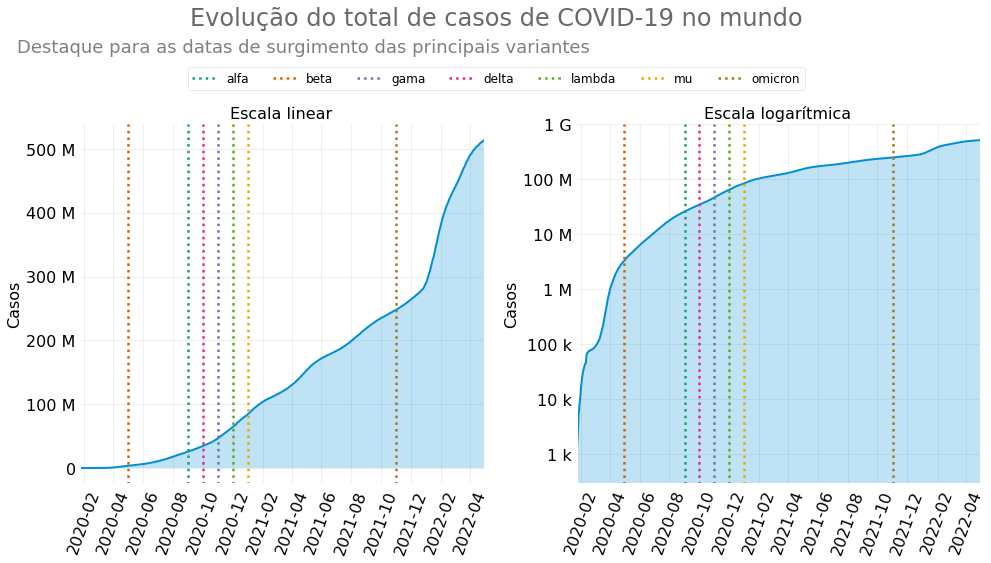

In [11]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'total_cases'],
                  y_axis_name='Casos',
                  sup_title='Evolução do total de casos de COVID-19 no mundo\n\n',
                  text='Destaque para as datas de surgimento das principais variantes\n',
                  variants_lines=True, legend=True)

O número de casos teve um acelerado crescimento inicial antes do surgimento da primeira variante (beta) e houve um aumento de 10 vezes entre as datas da variante beta e da variante alfa, um intervalo de 4 meses. O crescimento se torna, então, um mais lento. Nos quatro meses entre as variantes alfa e mu o número de casos cresceu 3 vezes.

Cerca de 2 meses depois do surgimento da variante ômicron, ou seja, em janeiro de 2022, houve um acentuado aumento no número de casos.

#### Principais países

Vamos agora olhar os países com mais casos até abril de 2022. Primeiro, vamos visualizar nossa base de dados com base na data desejada (30 de abril de 2022):

In [12]:
df.loc[df['date'] == last_date].sort_values(by='total_cases', ascending=False).head()

iso_code continent        location       date  total_cases  new_cases  \
184735  OWID_WRL       NaN           World 2022-04-30  513547035.0   362601.0   
74096   OWID_HIC       NaN     High income 2022-04-30  293348387.0   275526.0   
55046   OWID_EUR       NaN          Europe 2022-04-30  192754362.0   142067.0   
9755    OWID_ASI       NaN            Asia 2022-04-30  148893390.0   133827.0   
55891   OWID_EUN       NaN  European Union 2022-04-30  137352552.0   133467.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
184735          604172.143     6237167.0      1319.0             2606.000   
74096           498981.286     2375678.0       605.0             1655.429   
55046           292341.714     1819698.0       469.0             1203.000   
9755            173320.429     1428795.0       413.0              679.000   
55891           264320.000     1077615.0       305.0              793.000   

        ...  female_smokers  male_smokers  handwashing_facilities  \
184735  ...           6.434        34.635                   60.13   
74096   ...             NaN           NaN                     NaN   
55046   ...             NaN           NaN                     NaN   
9755    ...             NaN           NaN                     NaN   
55891   ...             NaN           NaN                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
184735                       2.705            72.58                    0.737   
74096                          NaN              NaN                      NaN   
55046                          NaN              NaN                      NaN   
9755                           NaN              NaN                      NaN   
55891                          NaN              NaN                      NaN   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
184735                                   NaN                          NaN   
74096                                    NaN                          NaN   
55046                                    NaN                          NaN   
9755                                     NaN                          NaN   
55891                                    NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
184735               NaN                                      NaN  
74096                NaN                                      NaN  
55046                NaN                                      NaN  
9755                 NaN                                      NaN  
55891                NaN                                      NaN  

[5 rows x 67 columns]

Vemos que a OWID adicionou entradas para totais parciais (continentes) e o total mundial. Vamos verificar quais entradas começam com `OWID`:

In [13]:
df[df['iso_code'].str.startswith('OWID')]['iso_code'].unique()

array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_INT', 'OWID_KOS', 'OWID_LIC', 'OWID_LMC', 'OWID_NAM',
       'OWID_CYN', 'OWID_OCE', 'OWID_SAM', 'OWID_UMC', 'OWID_WRL'],
      dtype=object)

Vamos identificar cada uma dessas entradas:

- `OWID_AFR` = África
- `OWID_ASI` = Ásia
- `OWID_EUR` = Europa
- `OWID_EUN` = União europeia
- `OWID_INT` = Casos [não atribuídos](https://github.com/owid/covid-19-data/issues/127) a algum país 
- `OWID_KOS` = Kosovo (ainda não reconhecido como independente por vários países)
- `OWID_NAM` = América do Norte
- `OWID_CYN` = Chipre do Norte (ainda não reconhecido como independente por vários países)
- `OWID_OCE` = Oceania
- `OWID_SAM` = América do Sul
- `OWID_WRL` = Mundo
- `OWID_LIC` = Economias de renda baixa (menos de US\\$ 1045 per capita) na classificação do Banco Mundial
- `OWID_LMC` = Economias de renda média baixa (entre US\\$ 1046 e US\\$ 4095 per capita) na classificação do Banco Mundial
- `OWID_UMC` = Economias de renda média alta (entre US\\$ 4096 e US\\$ 12695 per capita) na classificação do Banco Mundial
- `OWID_HIC` = Economias de renda alta (acima de US\\$ 12696 per capita) na classificação do Banco Mundial

Observe que não há América Central, uma divisão comumente feita em alguns estudos. Isto porque a OWID coloca todos os países que usalmente são considerados parte da América Central como parte da América do Norte tendo em vista que, formalmente, [não há um continente América Central](https://www.britannica.com/place/Central-America) tendo em vista a classificação geográfica por placas tectônicas.

Um aspecto interessante, e que será explorado adiante, é a presença de dados consolidados de acordo com a [classificação de renda do Banco Mundial](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups).

Vemos que, além dos consolidados por continente e global, há ainda entradas referentes a territórios não reconhecidos como países e referente a casos não atribuídos a algum país específico. Vamos criar um novo dataframe sem essas entradas:

In [14]:
df_countries_last_date = df[~df['iso_code'].str.startswith('OWID')].loc[df['date'] == last_date].sort_values(by="total_deaths", ascending=False)

##### Totais absolutos

Em um primeiro momento, podemos supor que países com maiores populações apresentem mais casos. Vamos verificar as maiores populações mundiais:

In [15]:
top_10_population = df_countries_last_date.loc[:, ['location', 'population', 'total_cases', 'total_deaths']].sort_values(by="population", ascending=False)[0:10]
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(top_10_population.to_html(index=False)))

Agora, vamos organizar uma tabela mostrando os países com mais casos e, também, expressar isto graficamente:

In [16]:
top_10_total_cases = df_countries_last_date.loc[:, ['location', 'continent', 'population', 'total_cases', 'total_deaths']].sort_values(by="total_cases", ascending=False)[0:10]
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(top_10_total_cases.to_html(index=False)))

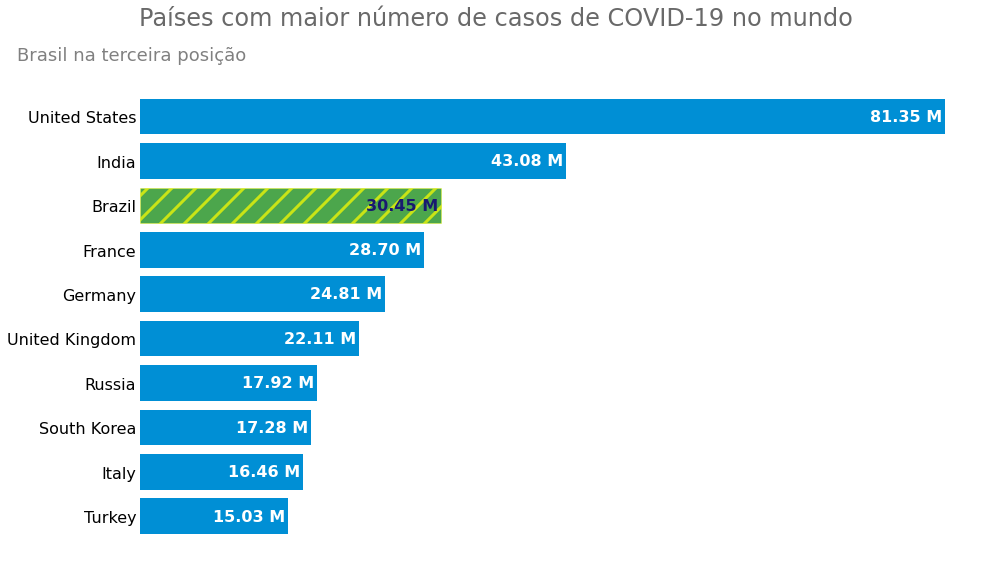

In [17]:
hbars_top10(top_10_total_cases, 'location', 'total_cases',
            'Países com maior número de casos de COVID-19 no mundo\n',
            'Brasil na terceira posição\n', 3)

Vemos que 4 países dentre os que apresentam maiores populações no mundo também figuram entre os com mais casos: Estados Unidos, Índia, Brasil e Rússia. Há a ausência da China, mas os dados de lá não são confiáveis tendo em vista o regime ditatorial, sendo que o país até mesmo [se nega a fornecer](https://www.forbes.com/sites/jemimamcevoy/2021/07/15/who-chief-china-not-sharing-critical-data-in-covid-origins-probe/?sh=411fe3e47591) dados mais completos sobre a própria origem do vírus.

Outra ausência que chama a atenção é a Indonésia. Novamente, devido a questões políticas, não se pode confiar totalmente nos dados reportados por tal país, visto que o [próprio presidente da Indonésia](https://www.thejakartapost.com/news/2020/03/13/we-dont-want-people-to-panic-jokowi-says-on-lack-of-transparency-about-covid-cases.html) afirmou em dado ponto que não estavam disponibilizando informações para "evitar pânico" na população. Obviamente, tal posicionamento é [amplamente criticado](https://indonesiaatmelbourne.unimelb.edu.au/talking-indonesia-covid-19-and-data-transparency/).

Vemos por esses dois casos que há diversos fatores sociais, econômicos e políticos que podem afetar a análise.  Há países entre as maiores populações que enfrentam questões políticas, econômicas e de saúde complicadas, como Paquistão, Bangladesh e Nigéria, que podem afetar a capacidade de tais países em acompanhar e reportar os casos adequadamente. Inclusive, de acordo com [dados e relatórios das Nações Unidas](https://unstats.un.org/unsd/demographic-social/crvs/#coverage), apenas dois terços dos países do mundo possuem registros de pelo menos 90 % dos nascimentos e óbitos. Todos os países citados aparecem nos relatórios como países com dificuldades de registro.

Neste estudo, vamos nos ater ao que é apresentado. Mas é importante notar tais situações. 

Comparando com a [primeira versão deste estudo](https://franciscobustamante.com.br/portfolio/2021-10-projeto_covid/), publicada em outubro de 2021, temos as três primeiras posições com os mesmos países. A França passou da sétima posição para a quarta, anteriormente ocupada pelo Reino Unido. A Alemanha nem ao menos aparecia na lista em outubro de 2021 e, agora, ocupa a quinta posição, antes ocupada pela Rússia. A Túrquia antes ocupava a sexta posição e, agora, a décima. Itália e Coreia do Sul não figuravam na lista.  

Vamos montar uma gráfico interativo para avaliar cada país por continente. Para isso, precisamos de dois novos dataframes, um para dados acumulados para todo o mundo e outro por continente:

In [18]:
df_world = df[df['iso_code'] == 'OWID_WRL']
df_world.head()

iso_code continent location       date  total_cases  new_cases  \
183906  OWID_WRL       NaN    World 2020-01-22        557.0        0.0   
183907  OWID_WRL       NaN    World 2020-01-23        657.0      100.0   
183908  OWID_WRL       NaN    World 2020-01-24        944.0      287.0   
183909  OWID_WRL       NaN    World 2020-01-25       1437.0      493.0   
183910  OWID_WRL       NaN    World 2020-01-26       2120.0      683.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
183906                 NaN          17.0         0.0                  NaN   
183907                 NaN          18.0         1.0                  NaN   
183908                 NaN          26.0         8.0                  NaN   
183909                 NaN          42.0        16.0                  NaN   
183910                 NaN          56.0        14.0                  NaN   

        ...  female_smokers  male_smokers  handwashing_facilities  \
183906  ...           6.434        34.635                   60.13   
183907  ...           6.434        34.635                   60.13   
183908  ...           6.434        34.635                   60.13   
183909  ...           6.434        34.635                   60.13   
183910  ...           6.434        34.635                   60.13   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
183906                       2.705            72.58                    0.737   
183907                       2.705            72.58                    0.737   
183908                       2.705            72.58                    0.737   
183909                       2.705            72.58                    0.737   
183910                       2.705            72.58                    0.737   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
183906                                   NaN                          NaN   
183907                                   NaN                          NaN   
183908                                   NaN                          NaN   
183909                                   NaN                          NaN   
183910                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
183906               NaN                                      NaN  
183907               NaN                                      NaN  
183908               NaN                                      NaN  
183909               NaN                                      NaN  
183910               NaN                                      NaN  

[5 rows x 67 columns]

In [19]:
df_continent_last_date = df[(df['iso_code'].isin(['OWID_AFR',
                                                  'OWID_ASI',
                                                  'OWID_EUR',
                                                  'OWID_NAM',
                                                  'OWID_OCE',
                                                  'OWID_SAM'])) & (df['date'] == last_date)]
df_continent_last_date

iso_code continent       location       date  total_cases  new_cases  \
1620    OWID_AFR       NaN         Africa 2022-04-30   11672799.0     5899.0   
9755    OWID_ASI       NaN           Asia 2022-04-30  148893390.0   133827.0   
55046   OWID_EUR       NaN         Europe 2022-04-30  192754362.0   142067.0   
124370  OWID_NAM       NaN  North America 2022-04-30   96315373.0    31011.0   
128254  OWID_OCE       NaN        Oceania 2022-04-30    7186765.0    31342.0   
156431  OWID_SAM       NaN  South America 2022-04-30   56723625.0    18455.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
1620              5225.143      252881.0         3.0               14.286   
9755            173320.429     1428795.0       413.0              679.000   
55046           292341.714     1819698.0       469.0             1203.000   
124370           66612.286     1430880.0       220.0              452.857   
128254           46694.000       10640.0        19.0               49.857   
156431           19978.571     1294258.0       195.0              207.000   

        ...  female_smokers  male_smokers  handwashing_facilities  \
1620    ...             NaN           NaN                     NaN   
9755    ...             NaN           NaN                     NaN   
55046   ...             NaN           NaN                     NaN   
124370  ...             NaN           NaN                     NaN   
128254  ...             NaN           NaN                     NaN   
156431  ...             NaN           NaN                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
1620                           NaN              NaN                      NaN   
9755                           NaN              NaN                      NaN   
55046                          NaN              NaN                      NaN   
124370                         NaN              NaN                      NaN   
128254                         NaN              NaN                      NaN   
156431                         NaN              NaN                      NaN   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
1620                                     NaN                          NaN   
9755                                     NaN                          NaN   
55046                                    NaN                          NaN   
124370                                   NaN                          NaN   
128254                                   NaN                          NaN   
156431                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
1620                 NaN                                      NaN  
9755                 NaN                                      NaN  
55046                NaN                                      NaN  
124370               NaN                                      NaN  
128254               NaN                                      NaN  
156431               NaN                                      NaN  

[6 rows x 67 columns]

In [20]:
treemap(df_countries_last_date, df_world, df_continent_last_date, 'total_cases',
        'Total de casos de COVID-19 no mundo<br>',
        'Casos por continente e país. Clique em um continente para detalhes')

No gráfico, temos uma ideia da proporção do total de casos de cada país frente aos demais de seu continente e do mundo.

Mas será que essa é a melhor métrica para avaliar comparativamente a situação de cada país?

##### Totais por milhão de habitantes

Uma análise do total absoluto de casos não necessariamente reflete a realidade de cada país. Afinal, como já dito, países com maiores populações tendem a ter maior número de casos. No entanto, isso não significa que países com populações pequenas não possam estar em situação pior. Afinal, podem, relativamente ao seu número de habitantes e à sua estrutura de saúde pública, estar com elevado número de casos. E regiões com maiores densidades populacionais podem favorecer uma maior taxa de transmissão (hipótese que será estudada mais adiante).

Vamos, então, verificar os países com mais casos por milhão de habitantes:

In [21]:
top_10_total_cases_per_million = df_countries_last_date.loc[:, ['location', 'continent', 'population', 'total_cases', 'total_cases_per_million']].sort_values(by="total_cases_per_million", ascending=False)[0:10]
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(top_10_total_cases_per_million.to_html(index=False)))

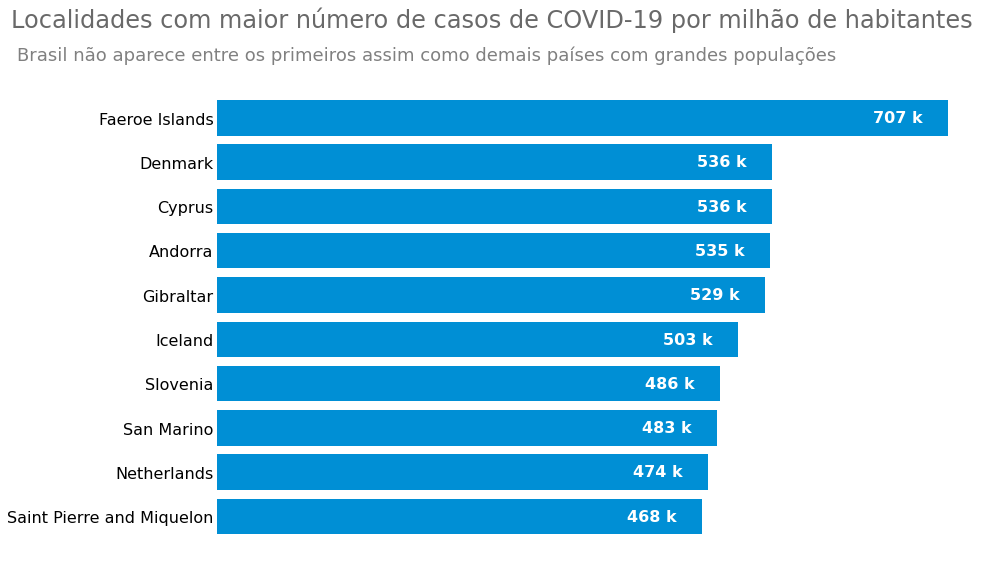

In [22]:
hbars_top10(top_10_total_cases_per_million, 'location',
            'total_cases_per_million',
            'Localidades com maior número de casos de COVID-19 por milhão de habitantes \n',
            'Brasil não aparece entre os primeiros assim como demais países com grandes populações\n',
            fmt_function=eng_format_k)

Percebemos uma grande mudança, aparecendo pequenos territórios e países. Na primeira posição, temos as Ilhas Faroe, um [território dependente da Dinamarca](https://en.wikipedia.org/wiki/Faroe_Islands) com cerca de 50 mil habitantes. Por mais que a localidade ainda seja oficialmente parte da Dinamarca, a base de dados em questão trabalha com o conceito de territórios e não de países. 

A própria Dinamarca, considerando a [porção continental](https://en.wikipedia.org/wiki/Danish_Realm) do país, aparece em segundo. Ainda no início de 2021, o país já enfrentava críticas internas sobre sua política de lockdown [como mostra esse artigo da Science](https://www.science.org/content/article/danish-scientists-see-tough-times-ahead-they-watch-more-contagious-covid-19-virus-surge). Recentemente, no início de 2022, o país retirou todas as restrições e [viu o número de casos diários diminuir significativamente](https://www.thelocal.dk/20220425/covid-19-denmark-registers-under-1000-cases-in-a-day-for-first-time-in-2022/). No entanto, como descrito no artigo citado, a política de testagem mudou, não sendo possível fazer uma comparação adequada entre o período atual, sem restrições, e o anterior, com restrições. Em [recente entrevista](https://youtu.be/1s1UX2ZNsh4), Camilla Holten-Moller, uma das responsáveis por modelos matemáticos utilizados pelo governo dinamarquês, justificou a retirada de todas as restrições ao final de janeiro de 2022 ainda que os casos na época estivessem aumentando devido à variante ômicron. E ainda fez análises críticas sobre o uso de modelos matemáticos em situações políticas.

Outros territórios aparecem na listagem:

- Gibraltar (território britânico)
- São Pedro e Miquelão (território francês), único da lista não localizado na Europa

Como vemos, quando consideramos a proporção de casos ao invés do total absoluto, o perfil da análise muda significativamente. E fica mais seguro e coerente fazer comparações com os dados em uma mesma escala. O fato de termos predominância de localidades na Europa sugere que há características do continente que favorecem o espalhamento do vírus. Tais características podem ser: clima, idade da população, densidade populacional, dentre inúmeras outras. Adiante, iremos nos aprofundar em algumas dessas características e verificar se há algum tipo de correlação com os dados de COVID.

Apenas três localidades da listagem possuem populações na ordem milhões: Dinamarca, Eslovênia e Holanda. Sobre a Dinamarca já escrevemos um pouco anteriormente. Tanto a [Eslovênia](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Slovenia) quanto a [Holanda](https://nltimes.nl/2022/05/16/netherlands-lack-covid-strategy-result-lockdowns-report) também adotaram políticas de lockdown e restrições, que foram retiradas nos últimos meses. Como descrito no link sobre a Holanda, o país já enfrentava dificuldades no setor de saúde antes da pandemia, por falta de profissionais, e há críticas quanto ao modo que o governo local abordou a situação durante a pandemia e preocupação caso haja uma nova onda da doença. Ainda assim, o número de casos no país cai continuamente após a retirada das restrições.

Vamos criar um gráfico interativo mostrando cada país por continente:

In [23]:
treemap(df_countries_last_date, df_world, df_continent_last_date,
        'total_cases_per_million',
        'Total de casos por milhão de COVID-19<br>',
        'Casos por continente e país. Clique em um continente para detalhes')

Veja como a análise proporcional muda significativamente o perfil do gráfico. Todos os países que apareciam como líderes em totais absolutos não figuram entre os que possuem mais casos por milhão de habitantes. Na Europa, vemos uma maior participação de países do leste europeu que tiveram [uma nova onda](https://edition.cnn.com/2021/10/25/uk/europe-covid-second-pandemic-winter-intl-gbr/index.html) ao final do ano passado. Mesmo com os casos na região caindo, a [OMS tem alertado os países da região](https://www.reuters.com/business/healthcare-pharmaceuticals/omicron-threat-remains-high-east-europe-who-2022-02-15/) sobre o risco de novas ondas. Na América do Sul, vemos que o Brasil se encontra em quarto, atrás de Argentina, Uruguai e Chile. Uruguai e Argentina [foram considerados modelos](https://www.nexojornal.com.br/expresso/2021/04/15/As-respostas-de-Argentina-e-Uruguai-aos-recordes-de-covid) em diversos estágios da pandemia com suas medidas restritivas e lockdowns, mas agora lideram o total de casos por milhão.

Na Ásia, vemos que o país com mais casos por milhão de habitantes é Israel. O país adotou lockdowns e diversas estratégias restritivas e foi um dos mais ágeis do mundo na distribuição de vacinas, inclusive as doses de reforço, para população. No entanto, como vemos, os resultados não foram os esperados. Em [recente entrevista](https://youtu.be/bnMMYJKZvnU), Cyrille Cohen, um dos membros do comitê de vacinas do governo israelense, disse "cometemos enganos" durante a pandemia. Dentre os "enganos" ele cita: passaportes vacinais, que não são efetivos; as vacinas, que não previnem transmissão como esperado inicialmente, e que não deveriam ser obrigatórias; ter fechado escolas e universidades, o que prejudicará de forma incalculável a evolução cognitiva de crianças e jovens. Por fim, na entrevista, Cohen afirma que não se deveria ignorar a imunidade de rebanho e que, com a ômicron e novas variantes, a COVID será "como uma gripe".

Vamos construir uma mapa interativo mostrando a evolução do total de casos por milhão em cada país. Para isso, vamos construir dois novos dataframes: um para dados apenas de países; outro para consolidar mensalmente esses dados. A consolidação por mês é apenas para deixar a animação do mapa mais rápida, se fosse evolução diária seria uma animação bem demorada.

In [24]:
df_countries = df[~df['iso_code'].str.startswith('OWID')]
df_countries.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [25]:
df_countries_monthly = df_countries.set_index('date').sort_index()
df_countries_monthly = df_countries_monthly.loc[df_countries_monthly.index <= last_date]
df_countries_monthly = df_countries_monthly.dropna(how='any', subset=['total_cases',
                                                                      'total_deaths',
                                                                      'total_cases_per_million',
                                                                      'total_deaths_per_million'])
df_countries_monthly = df_countries_monthly.groupby([df_countries_monthly.index.year,
                                                     df_countries_monthly.index.month,
                                                     df_countries_monthly['iso_code'],
                                                     ]).tail(1)

df_countries_monthly.head()

iso_code continent     location  total_cases  new_cases  \
date                                                                 
2020-01-31      CHN      Asia        China       9783.0     1659.0   
2020-02-29      FRA    Europe       France        100.0       43.0   
2020-02-29      KOR      Asia  South Korea       3150.0      813.0   
2020-02-29      PHL      Asia  Philippines          3.0        0.0   
2020-02-29      HKG      Asia    Hong Kong         95.0        1.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
date                                                                            
2020-01-31            1266.714         213.0        42.0               26.714   
2020-02-29              12.571           2.0         0.0                0.143   
2020-02-29             388.143          16.0         3.0                2.000   
2020-02-29               0.000           1.0         0.0                0.000   
2020-02-29               3.714           2.0         0.0                0.000   

            total_cases_per_million  ...  female_smokers  male_smokers  \
date                                 ...                                 
2020-01-31                    6.774  ...             1.9          48.4   
2020-02-29                    1.483  ...            30.1          35.6   
2020-02-29                   61.397  ...             6.2          40.9   
2020-02-29                    0.027  ...             7.8          40.8   
2020-02-29                   12.578  ...             NaN           NaN   

            handwashing_facilities  hospital_beds_per_thousand  \
date                                                             
2020-01-31                     NaN                        4.34   
2020-02-29                     NaN                        5.98   
2020-02-29                     NaN                       12.27   
2020-02-29                  78.463                        1.00   
2020-02-29                     NaN                         NaN   

            life_expectancy  human_development_index  \
date                                                   
2020-01-31            76.91                    0.761   
2020-02-29            82.66                    0.901   
2020-02-29            83.03                    0.916   
2020-02-29            71.23                    0.718   
2020-02-29            84.86                    0.949   

            excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
date                                                                            
2020-01-31                                   NaN                          NaN   
2020-02-29                                   NaN                          NaN   
2020-02-29                                   NaN                          NaN   
2020-02-29                               -4100.6                        -3.95   
2020-02-29                                 362.8                         3.95   

            excess_mortality  excess_mortality_cumulative_per_million  
date                                                                   
2020-01-31               NaN                                      NaN  
2020-02-29               NaN                                      NaN  
2020-02-29               NaN                                      NaN  
2020-02-29             -4.94                               -36.926737  
2020-02-29              7.08                                48.035166  

[5 rows x 66 columns]

In [26]:
animated_map(df_countries_monthly, 'iso_code', 'total_cases_per_million',
             'location',
             'Evolução do total de casos por milhão de habitante de COVID-19<br>',
             'Casos por milhão de habitantes para cada país entre 2020 e abril de 2022. Clique na seta para iniciar',)

Vemos no mapa que apenas alguns países da África apresentaram significativa evolução no número de casos. Como já escrito anteriormente, provavelmente isso está relacionado com as precárias condições de tais países em reportar adequadamente casos e mesmo realizar testes. No entanto, como será mostrado adiante, o perfil mais jovem da população também pode ter alguma relação, já que a doença é mais branda em jovens, o que pode fazer com que menos pessoas busquem tratamento, ficando de fora dos números oficiais. Há [estudos](https://www.sciencedirect.com/science/article/pii/S120197122032172X) que sugerem tal explicação, além de outras. Mais algumas referências sobre o assunto COVID na África: [Nature](https://www.nature.com/articles/s41577-021-00579-y), [JNMA](https://www.sciencedirect.com/science/article/pii/S002796842030345X) e [Science](https://www.science.org/doi/full/10.1126/science.abf8832). Todas as referências citam o fato de o número de casos e mortes no continente africano estarem bem abaixo do esperado com base em modelos e que ainda não há clareza sobre os motivos.

Na Oceania, vemos poucos casos na Austrália e na Nova Zelândia até o início de 2022. Os dois países adotaram políticas altamente restritivas e questionáveis, como [campos de quarentena forçada](https://youtu.be/mGFdWcJU7-0), buscando zerar novos casos. Agora, se [veem forçados a afrouxar](https://www.bloomberg.com/news/articles/2021-08-22/n-z-says-delta-raises-questions-about-its-covid-zero-approach) tais políticas por não terem tido o efeito desejado e estarem quebrando suas economias. Ao reabrirem suas economias pelo fracasso da política de COVID zero, viram o números de casos disparar, especialmente pela variante ômicron.

Na Austrália, a [população já estava saturada](https://www.theguardian.com/world/2022/may/07/explainer-why-are-covid-infection-rates-in-australia-so-high-compared-to-other-countries) das restrições e o número particularmente alto também pode ser reflexo dos testes de PCR ainda serem gratuitos, o que não é o caso em boa parte dos países. Na Nova Zelândia, a disruptura social causada pelas medidas restritivas tem levado a [um aumento na criminalidade em grandes centros](https://www.theguardian.com/world/2022/may/15/after-covid-swells-in-new-zealands-empty-city-centres) após a reabertura. A preocupação é a maior participação de jovens em atividades criminosas, tendo em vista que muitos se afastaram das escolas e colégios durante os lockdowns. Além da situação financeira, com o aumento do custo de vida, que tem gerado problemas de habitação.

Observe no parágrafo anterior o comentário sobre os testes de PCR. Já havíamos visto que a Dinamarca mudou sua política de testagem, apenas para ["casos médicos especiais"](https://www.thelocal.dk/20220310/denmark-says-covid-19-testing-now-only-needed-for-special-medical-reasons/), enquanto que a Austrália ainda faz testagem gratuitamente em sua população. Estas diferentes políticas adotadas por países dificulta a comparação entre os mesmos e pode levar a distorções nos dados. Inclusive, o primeiro ministro australiano Scott Morrison, candidato à reeleição que [foi derrotado](https://www.france24.com/en/australia/20220521-australia-s-conservative-pm-scott-morrison-concedes-election-defeat) nas eleições que ocorreram em maio de 2022, criticou a [política de testagem atual e de registro de óbitos em recente entrevista](https://www.ndtv.com/world-news/australia-coronavirus-australia-covid-covid-in-australia-why-australias-covid-cases-are-rising-again-2986729). Com mais de 95 % da população adulta vacinada, Morrison disse que se deve conviver com a COVID, e que muitas mortes registradas com COVID não necessariamente foram devido à COVID. Isto porque os protocolos locais orientam o registro como COVID de qualquer situação confirmada ou que seja provável de infecção pelo vírus, a menos que uma "clara alternativa" exista.

#### Idade e riqueza

Vamos verificar se o número de casos possui alguma relação com a renda per capita do país ou a idade da população.

Comecemos verificando os países com maior PIB per capita:

In [27]:
top_10_gdp_per_capita_cases = df_countries_last_date.loc[:, ['location', 'population', 'total_cases',
                                      'total_cases_per_million',
                                      'gdp_per_capita', 'continent']].sort_values(by="gdp_per_capita",
                                                                                  ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(top_10_gdp_per_capita_cases.to_html(index=False)))

Como era de se esperar, vemos apenas países da Ásia e Europa. 

No início do estudo, mostramos que a base de dados possui entradas para agregados de países com base na classificação de renda do Banco Mundial. Tal classificação baseia-se na renda per capita da seguinte forma (dólares americanos):


| Classifição | Limite inferior | Limite superior
| --- | --- | --- 
| Renda baixa (*low-income*) | - | 1045
| Renda média baixa (*lower-middle-income*) | 1046 | 4095
| Renda média alta (*upper-middle-income*) | 4096 | 12695
| Renda alta (*high-income*) | 12696 | -

Para detalhes de classificação de cada país, [veja este link](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups). O Brasil, por exemplo, é considerado uma economia de renda média alta. Abordaremos com mais detalhes o caso brasileiro em uma seção específica mais adiante. 

Vejamos, então, o total de casos por milhão de habitantes considerando estes agregados:

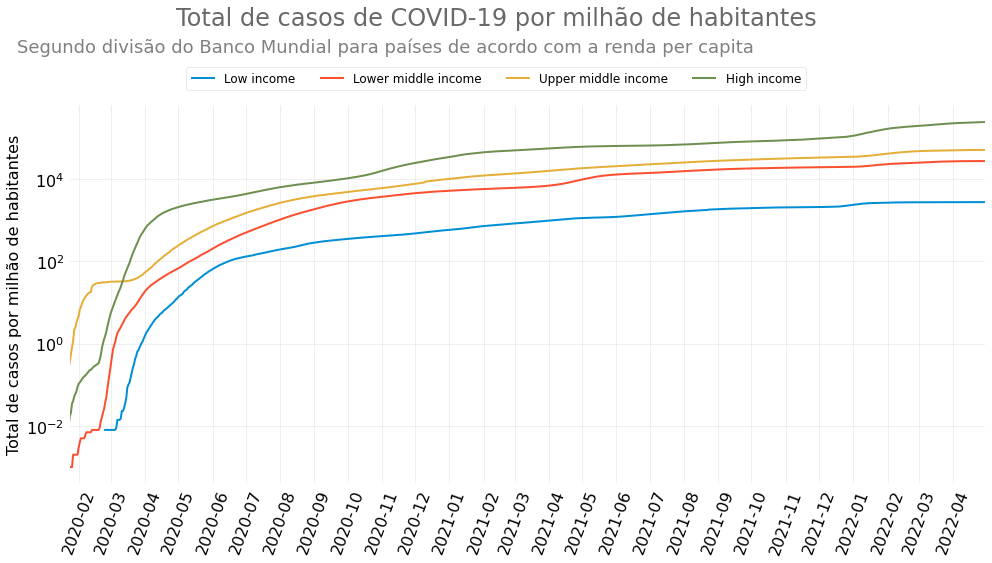

In [28]:
comparing_locations(df, 'date', 'total_cases_per_million', 'Total de casos por milhão de habitantes',
                   ('Low income', 'Lower middle income', 'Upper middle income', 'High income'),
                   'Total de casos de COVID-19 por milhão de habitantes\n\n',
                    'Segundo divisão do Banco Mundial para países de acordo com a renda per capita\n',
                    ylog=True)

Vemos claramente que há mais casos em países de renda alta, com quase duas ordens de grandeza mais casos que países de renda baixa. O perfil de crescimento é similar em todas as classificações.

Vamos criar um gráfico interativo buscando avaliar como os casos variam com a expectativa de vida e o PIB per capita:

In [29]:
bubble_scatter(df_countries_last_date, 'life_expectancy',
               'total_cases_per_million', 'gdp_per_capita', 'continent',
               'location', 'Expectativa de vida',
               'Total de casos por milhão de habitantes',
               'Total de casos de COVID-19 por milhão de habitantes e expectativa de vida<br>',
               '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente. Passe o mouse para detalhes')

No gráfico vemos claramente que os países do continente africano possuem, em sua maioria, menores expectativas de vida e menores PIB per capita (menores círculos no gráfico). No entanto, Seicheles, país africano com maior PIB per capita e uma das maiores expectativas de vida do continente, lidera o continente em total de casos por milhão. [Na primeira versão deste trabalho](https://franciscobustamante.com.br/portfolio/2021-10-projeto_covid/), em outubro de 2021, Seicheles liderava o mundo em casos por milhão, mesmo sendo o país com maior porcentagem da população vacinada à época.

Vemos uma tendência similar em outros continentes, maiores expectativas de vida e PIB per capita com mais casos. Obviamente que países mais ricos tendem a ter uma maior parcela da população com idade avançada e, como a doença afeta mais pessoas idosas, é de se esperar maior notificação de casos nesses países. No entanto, cabe destacar que há notáveis exceções à essa tendência como, por exemplo, o Japão.

Uma maior expectativa de vida, no entanto, não necessariamente significa que a população atual possui mais idosos que jovens. Assim, vamos repetir o gráfico substituindo o eixo de expectativa de vida por mediana de idade:

In [30]:
bubble_scatter(df_countries_last_date, 'median_age',
               'total_cases_per_million', 'gdp_per_capita', 'continent',
               'location', 'Mediana de idade da população',
               'Total de casos por milhão de habitantes',
               'Total de casos de COVID-19 por milhão de habitantes e mediana de idade<br>',
               '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente. Passe o mouse para detalhes')

Vemos a mesma tendência geral: população mais velha, mais casos notificados. É interessante notar que o Japão possui a maior mediana de idade do mundo e não possui um valor muito elevado de casos por milhão. O país não adotou políticas como lockdowns e quarentenas compulsórias pois entendeu que tais medidas impostas violariam os direitos humanos expressos em sua constituição. Ao invés, adotou o sistema de [estados de emergência](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Japan#State_of_Emergency), onde apenas algumas medidas voltadas para locais com muitas pessoas podiam ser tomadas e, mesmo assim, não havia poder legal de impedir a movimentação de pessoas. Inclusive, a [Corte de Tóquio considerou ilegal](https://www.japantimes.co.jp/news/2022/05/16/national/crime-legal/japan-covid-measures-illegal-ruling/) uma ordem do governo metropolitano de restringir o horário de uma cadeia de restaurantes.

Enquanto a política interna não foi muito restritiva, a voltada para as fronteiras foi. Apenas agora, em maio de 2022, o país [começa a abrir aos poucos](https://www.theguardian.com/world/2022/may/17/japan-prepares-to-reopen-to-tourists-for-first-time-since-2020) suas fronteiras, ainda com diversas restrições. O Japão é o único país do G7 que ainda não retirou restrições de viagem e sua política de fronteiras tem recebido críticas como ["isolacionista e xenófoba"](https://thediplomat.com/2022/05/whats-behind-japans-continued-covid-19-border-restrictions/), além de sem sentido tendo em vista a transmissibilidade da variante ômicron. A pressão interna para reabertura tem aumentado, já que a [economia do país passa por dificuldades](https://www.nytimes.com/2022/05/17/business/japan-economy-covid.html) e o turismo sempre foi uma grande fonte de recursos. A guerra da Ucrânia e os [absurdos lockdowns na China](https://www.nbcnews.com/news/world/shanghai-videos-residents-clash-police-china-covid-protest-rcna24520) causaram aumento de preços dentro do Japão por ruptura da cadeia de suprimentos.

Mas se o Japão não adotou medidas restritivas severas como, então, não teve um grande número de casos e de óbitos? Ainda no início da pandemia, [estudos](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7207161/) tentavam responder esse questionamento. Alguns aspectos culturais foram considerados, como a ausência de apertos de mão e abraços ao cumprimentar, a já presente [cultura de uso de máscaras](https://www.japanesestudies.org.uk/ejcjs/vol14/iss2/horii.html), alguns aspectos genéticos e uma possível ajuda da vacina BCG, obrigatória em crianças. Nenhuma dessas alternativas provavelmente responde por completo a questão. As máscaras, por exemplo, são utilizadas por pessoas de diversos países na Ásia para evitar rinite por pólen ou diminuir o efeito respiratório da poluição de grandes centros. Além disso, há [estudos](https://www.nejm.org/doi/full/10.1056/NEJMp2006372) que mostram que [máscaras são pouco efetivas](https://wwwnc.cdc.gov/eid/article/26/5/19-0994_article) para proteger contra infeção respiratória.

Talvez uma explicação esteja no [sistema de saúde](https://en.wikipedia.org/wiki/Health_care_system_in_Japan) e a experiência do país em outras epidemias respiratórias. A maneira como o país [monitora casos de influenza](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5155020/) é considerada modelo e [há indícios](https://onlinelibrary.wiley.com/doi/10.1111/irv.12977) que o protocolo utilizado, e que foi adotado inicialmente para a pandemia, tenha colaborado no tratamento nos estágios iniciais de COVID.

Por fim, é interessante notar como a Itália, com expectativa de vida, mediana de idade, e PIB per capita similares aos do Japão, possui cerca de 4 vezes mais casos. Além disso, a população da Itália é de cerca de 60 milhões de habitantes, pouco menos da metade dos 125 milhões do Japão, de forma que a densidade populacional italiana é bem menor. 

Lembrando, [a Itália foi o país europeu mais afetado](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7767319/) no início da pandemia. Em março de 2020, era o terceiro em total de casos e o primeiro em número de óbitos em todo o mundo. Na época, muito se falou sobre a idade da população, mas, como vemos agora, não se pode avaliar um único parâmetro já que, por idade, o Japão deveria ter dados similares. 

Há muito mais a ser analisado e nem sempre é possível resumir tudo em números que representam bem todo um país. 

[Este artigo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7908106/) avalia como as 21 regiões administrativas italianas lidaram com o início da pandemia. Na Itália, cada região tem certa autonomia para organizar suas políticas de saúde. O artigo mostra como as regiões que adotaram hospitalização logo no início tiveram números piores do que outras regiões. Além disso, destaca como diferentes políticas de testagem dificultam a comparação de casos entre as regiões, um aspecto já levantado em outros contextos aqui neste estudo. Por fim, o artigo também destaca que cerca de um terço das mortes atribuídas ao COVID-19 até maio de 2020 ocorreram em casas de repouso para idosos e que não necessariamente este número é confiável.

### Novos casos

Até o momento focamos em avaliar a evolução do total de casos no mundo e em cada país. Agora, vamos verificar a evolução de novos casos, à medida que foram sendo reportados. Assim, podemos verificar em quais momentos houve maior notificação, as popularmente chamadas "ondas" de casos.

A base de dados apresenta as entradas na forma de dados diários e na forma de média móvel de 7 dias. A média móvel ajuda a visualizar melhor a tendência dos dados, visto que há grande variação dos dados diários. Vamos começar com os casos em todo mundo:

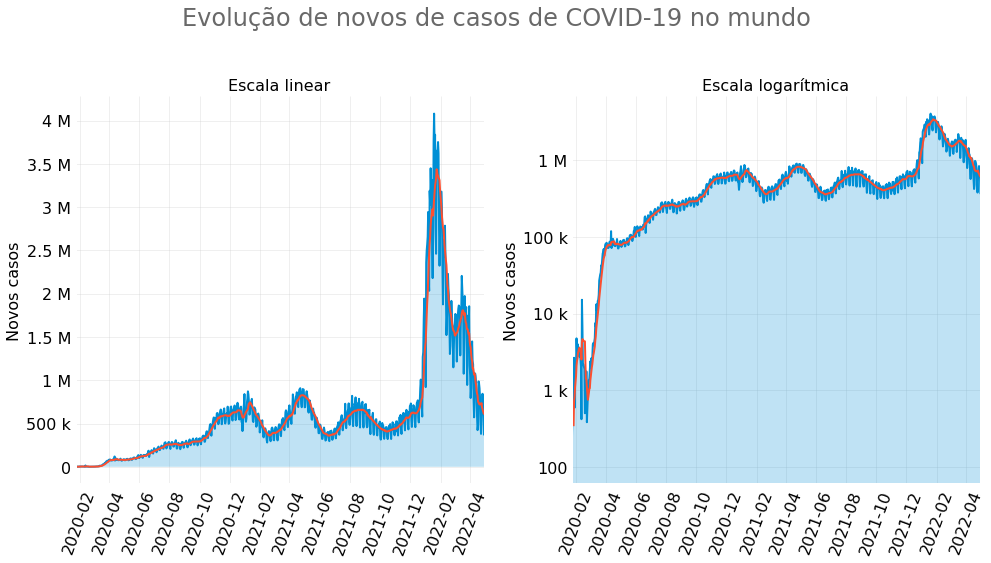

In [31]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'new_cases'],
                  y_smooth = df.loc[df['location'] == 'World', 'new_cases_smoothed'],
                  y_axis_name = 'Novos casos',
                  y_label = 'Novos casos diários',
                  y_smooth_label = 'Média móvel de 7 dias',
                  sup_title = 'Evolução de novos de casos de COVID-19 no mundo\n')

Vemos que está surgindo um padrão de aceleração de casos e máximos. Em 2020 vimos três grandes saltos em novos casos, com inícios em março, em junho e em novembro. Em 2021, vimos novamente saltos em março e junho. Na virada de 2021 para 2022 tivemos um grande aumento de casos.

Podemos verificar se há algum indício de relação entre novos casos e as variantes:

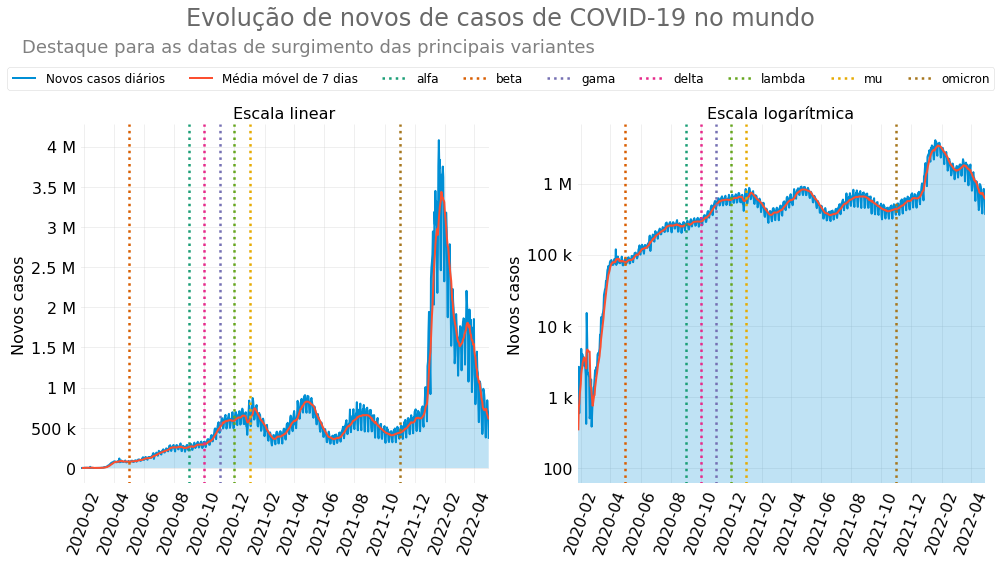

In [32]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'new_cases'],
                  y_smooth = df.loc[df['location'] == 'World', 'new_cases_smoothed'],
                  y_axis_name = 'Novos casos',
                  y_label = 'Novos casos diários',
                  y_smooth_label = 'Média móvel de 7 dias',
                  sup_title = 'Evolução de novos de casos de COVID-19 no mundo\n\n',
                  text='Destaque para as datas de surgimento das principais variantes\n',
                  variants_lines=True, legend=True)

Em 2020, vemos que o aumento de casos entre junho e julho ocorre após o surgimento da variante beta. De forma similar, após o surgimento da variante delta, ocorre o aumento significativo de casos entre outubro e novembro. Isso corrobora as afirmações veiculadas à época na mídia que tal variante era mais transmissível que as primeiras. Durante o ano de 2021, algumas variantes de menor impacto surgiram, mas ficaram pouco tempo como variantes de interesse na classificação da OMS. Em novembro de 2021, houve o surgimento da variante ômicron e, logo após sua identificação, o grande aumento no número de casos na passagem de 2021 para 2022.

Agora, sabemos que em estações mais frias usualmente há [mais casos de resfriados e gripes](https://www.cdc.gov/flu/about/season/flu-season.htm). Será que há alguma relação entre inverno e casos de COVID-19? Vejamos:

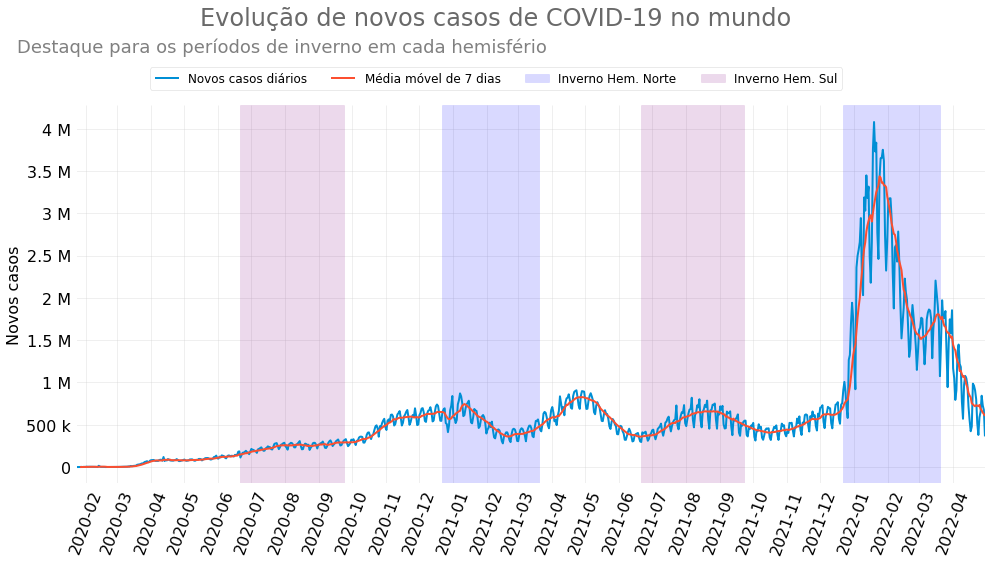

In [33]:
winter(x = df.loc[df['location'] == 'World', 'date'],
       y = df.loc[df['location'] == 'World', 'new_cases'],
       y_smooth = df.loc[df['location'] == 'World', 'new_cases_smoothed'],
       y_label='Novos casos diários',
       y_smooth_label='Média móvel de 7 dias',
       y_axis_name='Novos casos',
       sup_title='Evolução de novos casos de COVID-19 no mundo\n\n',
       text='Destaque para os períodos de inverno em cada hemisfério\n',
       legend=True)

Vemos que há uma possível relação, repare os períodos entre junho e setembro dos anos de 2020 e 2021, e os períodos entre dezembro e março nas passagens de 2020 para 2021 e de 2021 para 2022. No entanto, o máximo ao final de abril de 2021 não encaixa nessa explicação. Como veremos adiante, este máximo é devido a casos na Índia, sendo devido a situações específicas deste país. Assim, podemos considerar que há uma forte correlação entre períodos de frio e casos de COVID, o que é característico de infecções respiratórias. 

Vamos comparar os dados consolidados mundialmente com os dados individuais dos países que vimos anteriormente possuir mais casos:

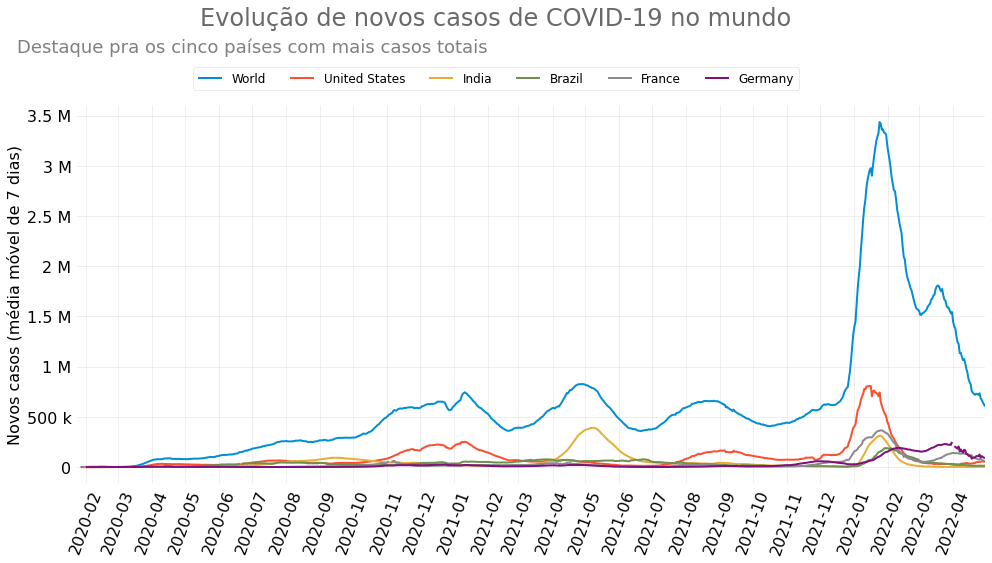

In [34]:
comparing_locations(df, 'date', 'new_cases_smoothed',
                    'Novos casos (média móvel de 7 dias)',
                    ('World', 'United States', 'India', 'Brazil', 'France', 'Germany'),
                    'Evolução de novos casos de COVID-19 no mundo\n\n',
                    'Destaque pra os cinco países com mais casos totais\n')

Aqui vemos mais claramente como o pico entre abril e maio de 2021 possui grande influência da Índia. Na época, [notícias](https://www.nature.com/articles/d41586-021-01059-y) também demonstravam uma certa dúvida nos motivos que levaram a Índia a ter esse surto de casos, suspeitando-se de novas variantes ou de espalhamento para os grandes centros urbanos. Posteriormente, ficou mais [evidente o papel das eleições que ocorreram em algumas localidades](https://thewire.in/politics/election-rally-covid-19-case-spike). Também contribuiu o fato de milhares de pessoas, com medo do aumento de casos, recorrerem ao [ritual de se dirigir ao rio Ganges](https://www.reuters.com/business/healthcare-pharmaceuticals/india-overtakes-brazil-worlds-second-worst-hit-country-by-covid-19-2021-04-12/) para se banhar, já que o rio é considerado sagrado na cultura hindu.


A escala linear do gráfico não é muito adequada para uma comparação. Vamos recriar o gráfico com uma escala logarítmica:

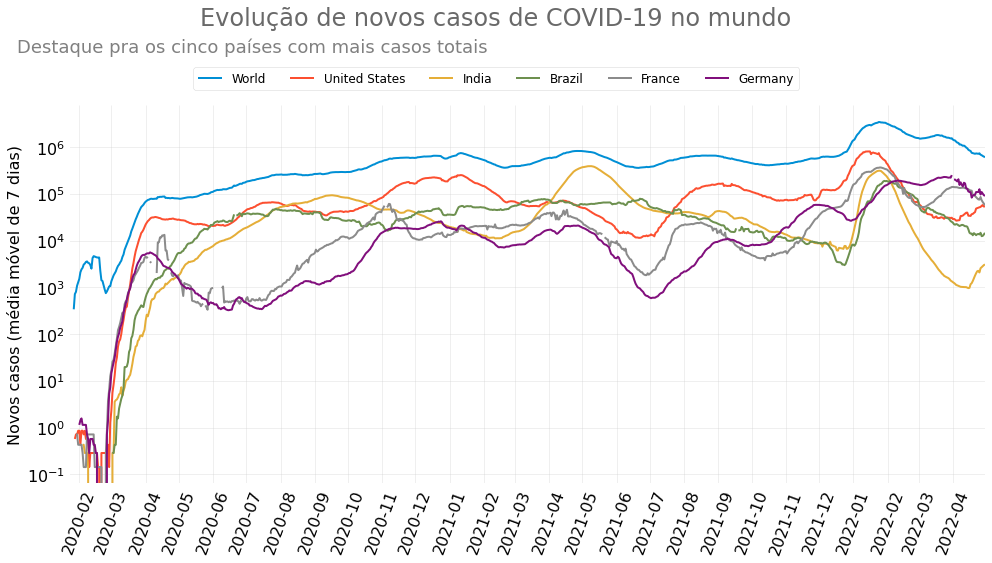

In [35]:
comparing_locations(df, 'date', 'new_cases_smoothed',
                    'Novos casos (média móvel de 7 dias)',
                    ('World', 'United States', 'India', 'Brazil', 'France', 'Germany'),
                    'Evolução de novos casos de COVID-19 no mundo\n\n',
                    'Destaque pra os cinco países com mais casos totais\n',
                    ylog=True)

Vemos que, com exceção do período entre abril e setembro de 2020, os comportamentos de Estados Unidos, França e Alemanha possuem perfis similares. As curvas de Índia e Brasil não se assemelham entre si nem com os demais países, exceto no que diz respeito aos novos casos decorrentes da variante ômicron no início de 2022.

Partimos agora para uma análise mais global.  Já vimos que aparentemente há um caráter sazonal nos casos de COVID-19. Vamos criar um mapa que apresente esse perfil para cada país do mundo:

In [36]:
animated_map(df_countries_monthly, 'iso_code', 'new_cases', 'location',
             'Evolução de novos casos de COVID-19<br>',
             'Sazonalidade dos novos casos. Compare, por exemplo, EUA e Brasil')

Observe como as cores oscilam para os países enquanto o tempo passa, e como as oscilações não são sincronizadas. Compare, por exemplo, os Estados Unidos e o Brasil para perceber essa falta de sincronia. Será que conseguimos analisar esse comportamento a nível de continentes?

Vamos verificar o perfil de cada continente, ainda comparando com o acumulado mundial:

In [37]:
df_continent = df[(df['iso_code'].isin(['OWID_AFR',
                                        'OWID_ASI',
                                        'OWID_EUR',
                                        'OWID_NAM',
                                        'OWID_OCE',
                                        'OWID_SAM']))]
df_continent.head()

iso_code continent location       date  total_cases  new_cases  \
813  OWID_AFR       NaN   Africa 2020-02-13          NaN        0.0   
814  OWID_AFR       NaN   Africa 2020-02-14          1.0        1.0   
815  OWID_AFR       NaN   Africa 2020-02-15          1.0        0.0   
816  OWID_AFR       NaN   Africa 2020-02-16          1.0        0.0   
817  OWID_AFR       NaN   Africa 2020-02-17          1.0        0.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
813                 NaN           NaN         0.0                  NaN  ...   
814                 NaN           NaN         0.0                  NaN  ...   
815                 NaN           NaN         0.0                  NaN  ...   
816                 NaN           NaN         0.0                  NaN  ...   
817                 NaN           NaN         0.0                  NaN  ...   

     female_smokers  male_smokers  handwashing_facilities  \
813             NaN           NaN                     NaN   
814             NaN           NaN                     NaN   
815             NaN           NaN                     NaN   
816             NaN           NaN                     NaN   
817             NaN           NaN                     NaN   

     hospital_beds_per_thousand  life_expectancy  human_development_index  \
813                         NaN              NaN                      NaN   
814                         NaN              NaN                      NaN   
815                         NaN              NaN                      NaN   
816                         NaN              NaN                      NaN   
817                         NaN              NaN                      NaN   

     excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
813                                   NaN                          NaN   
814                                   NaN                          NaN   
815                                   NaN                          NaN   
816                                   NaN                          NaN   
817                                   NaN                          NaN   

     excess_mortality  excess_mortality_cumulative_per_million  
813               NaN                                      NaN  
814               NaN                                      NaN  
815               NaN                                      NaN  
816               NaN                                      NaN  
817               NaN                                      NaN  

[5 rows x 67 columns]

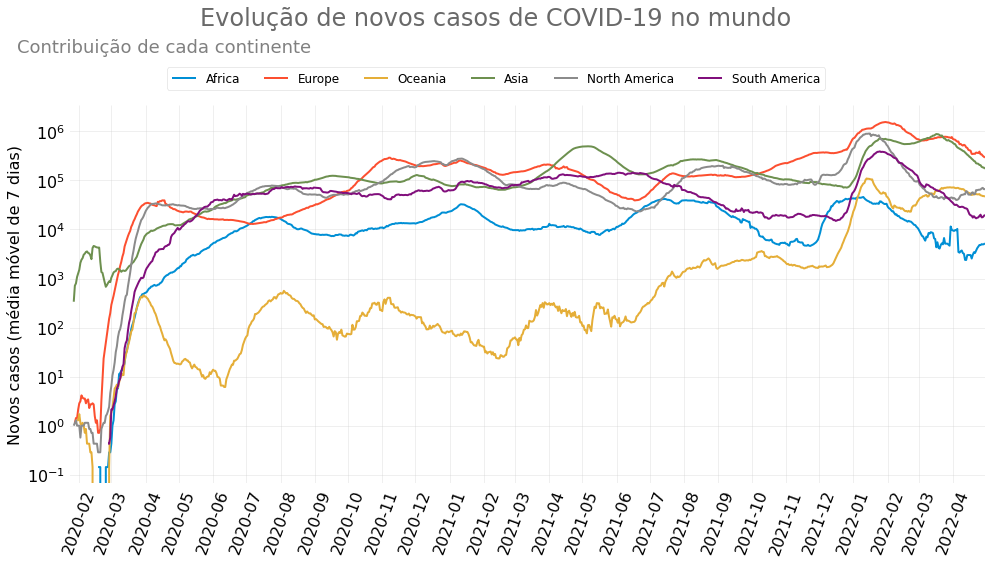

In [38]:
comparing_locations(df_continent, 'date', 'new_cases_smoothed',
                    'Novos casos (média móvel de 7 dias)',
                    ('Africa', 'Europe', 'Oceania', 'Asia', 'North America', 'South America'),
                    'Evolução de novos casos de COVID-19 no mundo\n\n',
                    'Contribuição de cada continente\n',
                    ylog=True)

Aqui percebemos que o perfil da Ásia não acompanha fielmente o da Europa e o da América do Norte, mesmo estando todos estes continentes no mesmo hemisfério. Mas, como vimos, há grande efeito dos números da Índia no continente asiático e há diversos países suspeitos de subnotificação no mesmo continente, de forma que a comparação pode ser prejudicada.

Quanto as continentes do hemisfério sul, não se pode afirmar claramente se há alguma tendência conjunta. 

É perceptível no gráfico o efeito da variante ômicron na Oceania. Como já discutido anteriormente, a política de COVID zero adotada por Austrália e Nova Zelândia fracassou e os dois países vêm enfrentando um grande aumento de casos.

A dificuldade em encontrar padrões entre continentes é resultado da grande diferença de população entre os mesmos, além da posição geográfica e de possíveis subnotificações já citadas. Não necessariamente pertencer ao mesmo hemisfério significa ter estações do ano similares. Além de haver diversos fatores relacionados ao microclima de cada país/região e, obviamente, aspectos políticos e econômicos muito distintos. Apenas de forma ilustrativa, vejamos a população de cada continente e o total de casos por milhão de habitantes:

In [39]:
continents = df_continent_last_date.loc[:, ['location', 'total_cases_per_million', 'population']].sort_values(by='population')
with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(continents.to_html(index=False)))

Veja como o total de casos por milhão é significativamente maior na Europa. O continente africano possui um número muito baixo de casos por milhão, conforme já discutido anteriormente. Quanto à Ásia, o valor baixo se deve a números não confiáveis de diversos países, pelos motivos vistos no início deste estudo, principalmente China e Indonésia. O caso da Oceania é um reflexo do grande número de casos da variante ômicron na Austrália e na Nova Zelândia.

Assim como já discutido para o total de casos, talvez seja mais elucidativo comparar os novos casos por milhão de habitantes, para diminuir eventuais efeitos de países com grandes populações. Comecemos mostrando o perfil de novos casos por milhão para os países que anteriormente vimos serem os que possuem maior total de casos até o fim de abril de 2022:

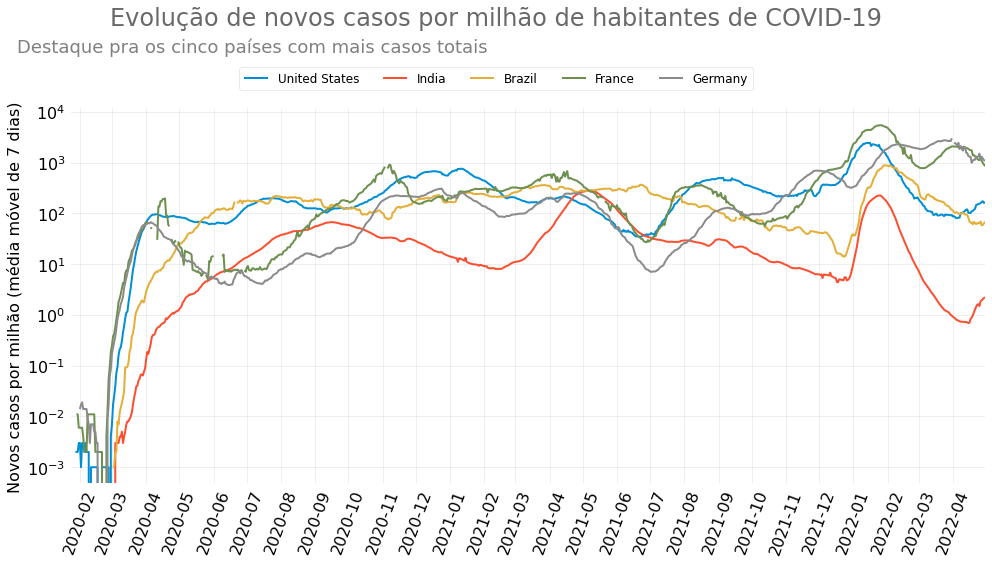

In [40]:
comparing_locations(df, 'date', 'new_cases_smoothed_per_million',
                    'Novos casos por milhão (média móvel de 7 dias)',
                    ('United States', 'India', 'Brazil', 'France', 'Germany'),
                    'Evolução de novos casos por milhão de habitantes de COVID-19\n\n',
                    'Destaque pra os cinco países com mais casos totais\n',
                    ylog=True)

Aqui percebemos como França e Alemanha foram muito afetadas pela variante ômicron, na passagem do ano 2021 para 2022. Muito mais que o Brasil, por exemplo. Novamente, fica evidente a importância de se comparar números relativos, e não números absolutos, quando se compara países. Os Estados Unidos também apresentaram muitos novos casos. Como já mostrado anteriormente, o grande aumento no período coincide com o inverno no Hemisfério Norte.

Vejamos o gráfico de novos casos por milhão de habitantes para os continentes:

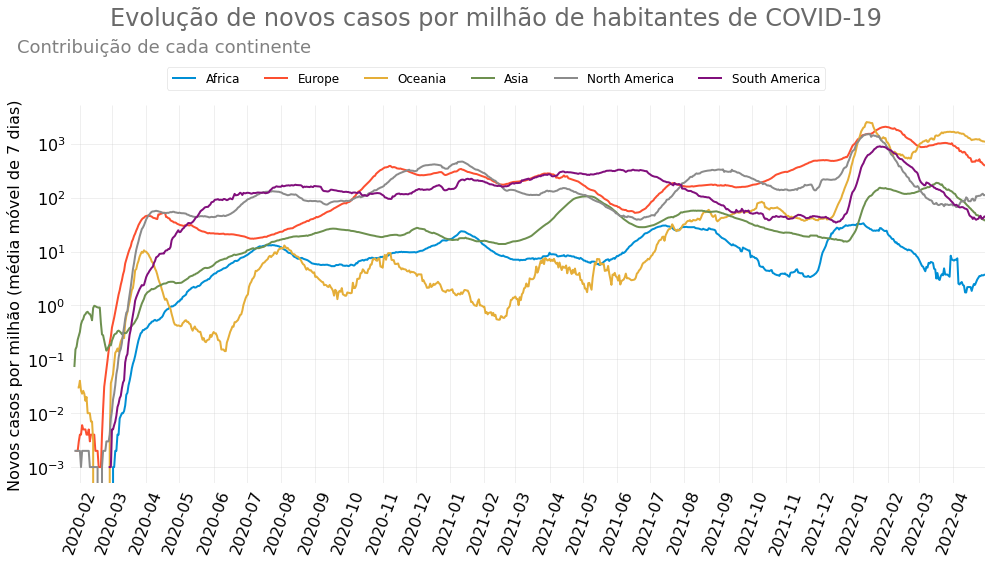

In [41]:
comparing_locations(df_continent, 'date', 'new_cases_smoothed_per_million',
                    'Novos casos por milhão (média móvel de 7 dias)',
                    ('Africa', 'Europe', 'Oceania', 'Asia', 'North America', 'South America'),
                    'Evolução de novos casos por milhão de habitantes de COVID-19\n\n',
                    'Contribuição de cada continente\n',
                    ylog=True)

O gráfico está em escala logarítmica pois as ordens de grandeza mudam muito entre os continentes. Vemos como cada continente possui um comportamento próprio, tendo em vista que cada um possui países com especifidades próprias, conforme viemos discutindo durante todo o estudo. É perceptível que a variante ômicron foi significativa em todos os continentes.

Vejamos a evolução temporal de novos casos por milhão de habitantes através de um mapa:

In [42]:
animated_map(df_countries_monthly, 'iso_code', 'new_cases_per_million',
             'location',
             'Evolução de novos casos de COVID-19 por milhão de habitantes<br>',
             'Sazonalidade dos novos casos. Compare, por exemplo, EUA e Brasil')

Assim como já visto no mapa para o número absoluto de novos casos, fica evidente o caráter sazonal, popularmente conhecido como "ondas" de casos.

Vejamos como foi o comportamento de novos casos considerando agregados de países com base na classificação de renda do Banco Mundial:

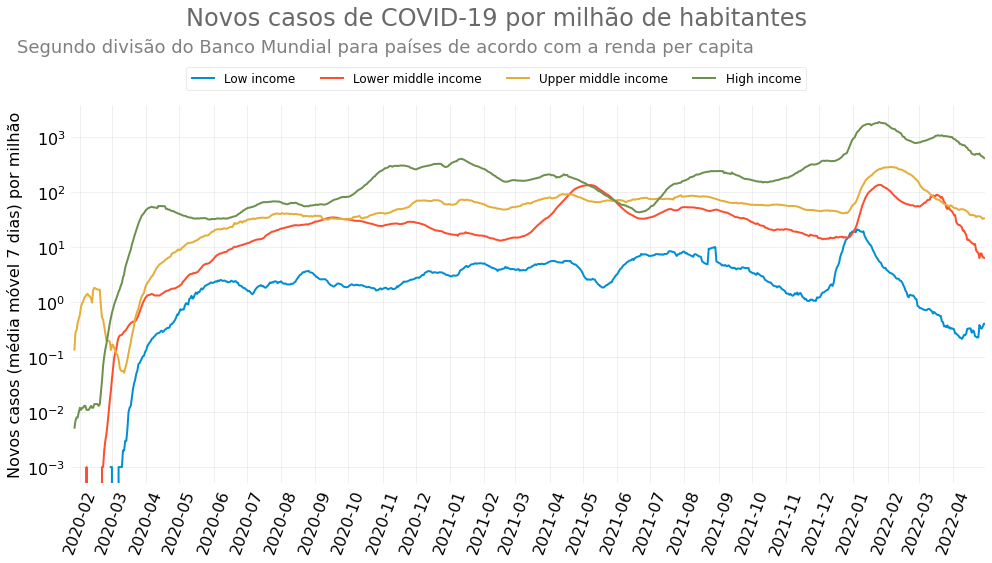

In [43]:
comparing_locations(df, 'date', 'new_cases_smoothed_per_million', 'Novos casos (média móvel 7 dias) por milhão',
                   ('Low income', 'Lower middle income', 'Upper middle income', 'High income'),
                   'Novos casos de COVID-19 por milhão de habitantes\n\n',
                    'Segundo divisão do Banco Mundial para países de acordo com a renda per capita\n',
                    ylog=True)

Assim como já havíamos discutido para o total de casos, vemos que as ondas de novos casos possuem maior impacto em países de mais alta renda. A variante ômicron, na passagem de 2021 para 2022, é perceptível em todas as classificações.

Agora, será que há alguma forma de medir a velocidade de transmissão da doença?

### Taxa efetiva de reprodução (R)

A taxa efetiva de reprodução (R) é o número médio de pessoas infectadas em determinado momento por um indivíduo infectado introduzido em uma população *parcialmente imune*. Atenção ao "parcialmente imune", pois no início da pandemia muito se falava do R<sub>0</sub>, que é um conceito análogo mas para uma população completamente suscetível, ou seja, sem indivíduos imunizados seja por contágio prévio ou por vacinação.

A [interpretação](https://www.dw.com/pt-br/o-que-%C3%A9-o-n%C3%BAmero-de-reprodu%C3%A7%C3%A3o-r/a-53397119) do valor calculado de R é simples:

- R > 1: o número de casos da doença está aumentando. Epidemia.
- R = 1: cada infectado causa uma nova infecção. Endemia.
- R < 1: cada vez menos indivíduos se infectam e o número dos contágios retrocede.

Vamos verificar se podemos visualizar alguma relação entre mudanças no valor de R, as diversas variantes e períodos de inverno:

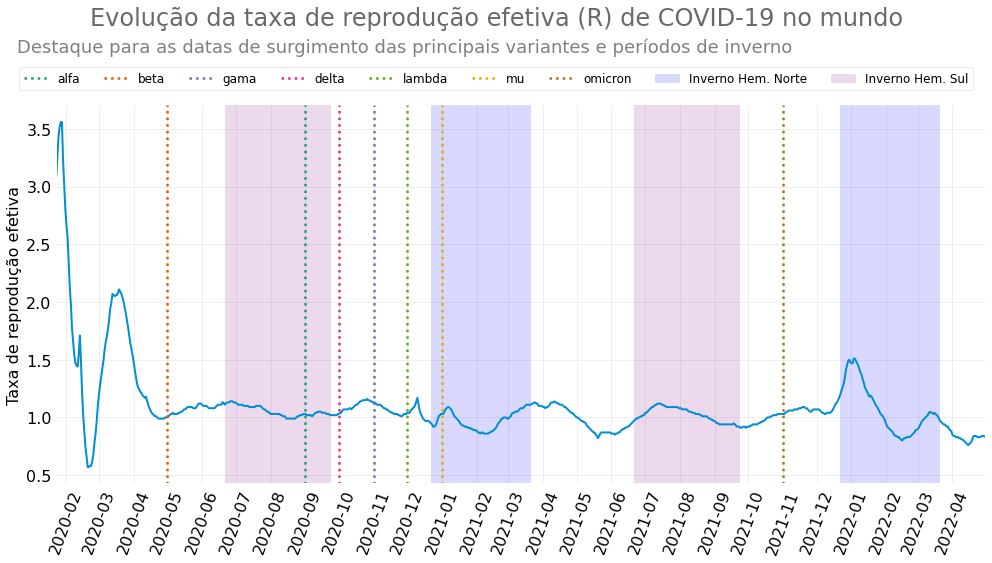

In [44]:
winter(x=df.loc[df['location'] == 'World', 'date'],
       y=df.loc[df['location'] == 'World', 'reproduction_rate'],
       y_axis_name='Taxa de reprodução efetiva',
       sup_title='Evolução da taxa de reprodução efetiva (R) de COVID-19 no mundo\n\n',
       text='Destaque para as datas de surgimento das principais variantes e períodos de inverno\n',
       variants_lines=True, legend=True, engfmt=False)

Valores elevados aparecem apenas no início do período. É possível perceber leves aumentos coincidentes com os períodos de máximos de novos casos discutidos anteriormente. Mesmo a variante ômicron, reconhecível no gráfico pelo máximo em janeiro de 2022, não atingiu um valor de *R* comparável ao início da pandemia. Como se trata dos valores de todo o mundo, a curva pode estar sendo balanceada entre países com taxas elevadas e países com taxas baixas. Vamos refazer o gráfico com os dados dos cinco países com mais casos:

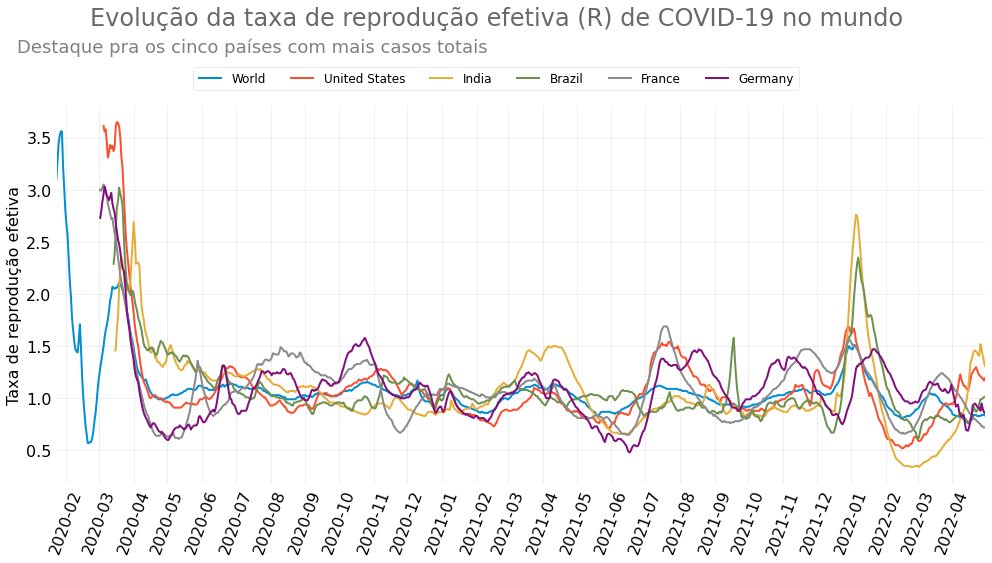

In [45]:
comparing_locations(df, 'date', 'reproduction_rate',
                    'Taxa de reprodução efetiva',
                    ('World', 'United States', 'India', 'Brazil', 'France', 'Germany'),
                    'Evolução da taxa de reprodução efetiva (R) de COVID-19 no mundo\n\n',
                    'Destaque pra os cinco países com mais casos totais\n',
                    engfmt=False)

Aqui vemos mais flutuações. Os períodos de maiores valores coincidem com os períodos de aumento de novos casos vistos anteriormente.

Em um primeiro momento, podemos pensar se há alguma relação entre a taxa de reprodução efetiva e a densidade populacional de um país. Afinal, mais pessoas próximas pode levar à uma maior transmissibilidade. Vamos verificar os países com maiores taxas de reprodução efetiva ao fim de abril de 2022 e verificar se há algum sinal de correlação:

In [46]:
df_r0_last_date = df_countries_last_date.loc[:, ['location',
                                                 'continent',
                                                 'population',
                                                 'population_density',
                                                 'reproduction_rate',]].sort_values(by='reproduction_rate', ascending=False)[:10]
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(df_r0_last_date.reset_index(drop=True).to_html(index=False)))

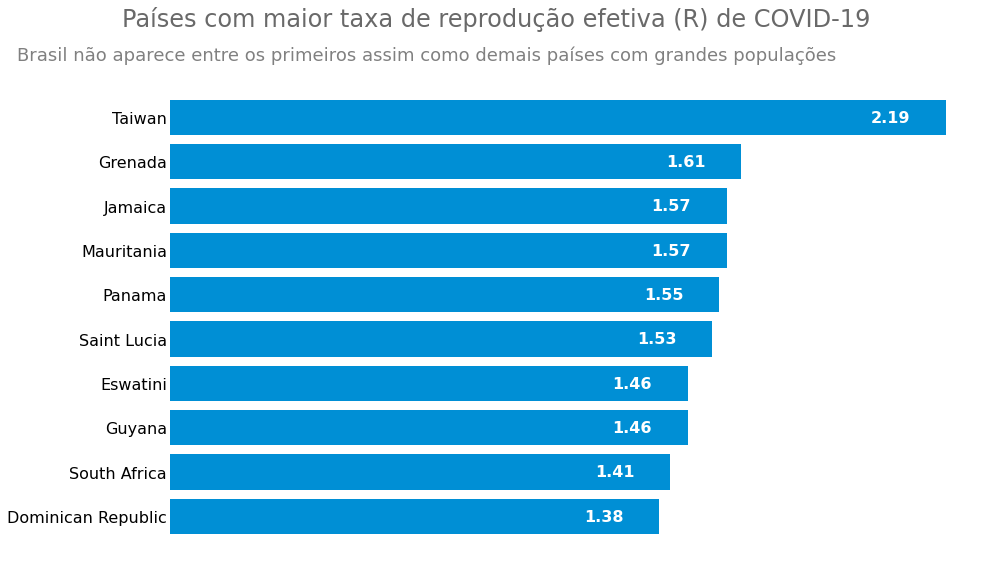

In [47]:
hbars_top10(df_r0_last_date, 'location', 'reproduction_rate',
            sup_title='Países com maior taxa de reprodução efetiva (R) de COVID-19\n',
            text= 'Brasil não aparece entre os primeiros assim como demais países com grandes populações\n')

In [48]:
bubble_scatter(df_countries_last_date, 'population_density', 'reproduction_rate',
               'total_cases_per_million', 'continent', 'location',
               'Densidade populacional (escala logarítmica)', 'Taxa de reprodução',
               'Taxa de reprodução efetiva (R) e densidade populacional<br>',
               '<b>Tamanho</b>: Total de casos por milhão. <b>Cor</b>: Continente',
               log_x=True)

Vemos que as 7 maiores densidades populacionais do mundo estão com R abaixo de 1. Ao menos pelo gráfico, não parece haver uma correlação tão direta entre as duas variáveis, mas como são dinâmicas o ideal é fazer uma análise temporal e não estática como no caso. Perceba, também, que a variável escolhida para o tamanho dos círculos foi o total de casos por milhão em cada localidade. Veja que há localidades com grande quantidade de casos acumulados mas com R < 1, indicando que já tiveram momentos de maior contágio no passado mas que, em abril de 2022, estavam em momentos de retração de contágio.

## Evolução do número de mortes

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-vector/coronavirus-cells-banner_1035-18749.jpg"></center>

Infelizmente alguns casos acabam levando a mortes. Vamos analisar como foi a evolução dos números.

### Total de mortes

#### Mundo 

Começando pelo total de mortes no mundo:

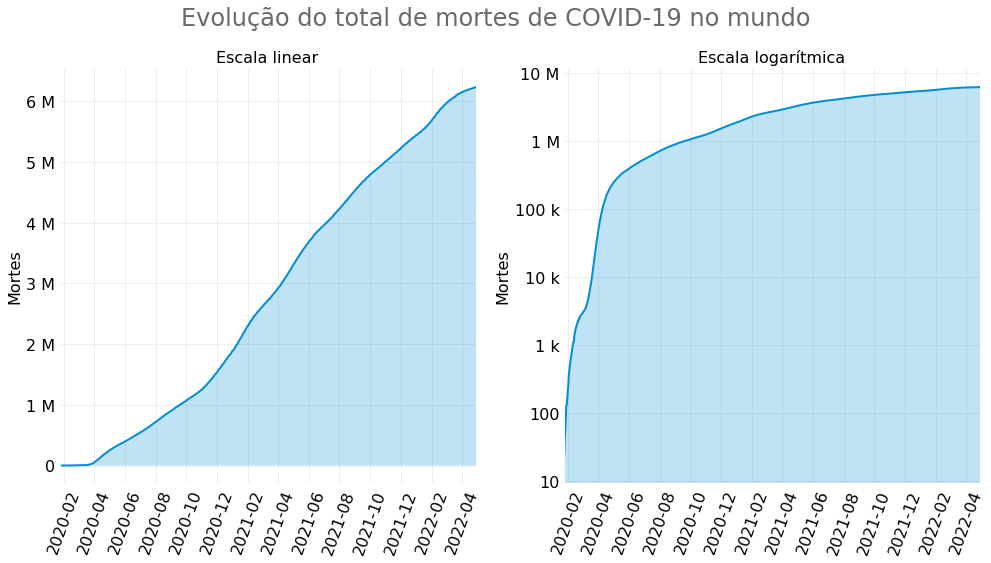

In [49]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'total_deaths'],
                  y_axis_name = 'Mortes',
                  sup_title = 'Evolução do total de mortes de COVID-19 no mundo')

Observe que a ordem de grandeza dos eixos verticais é bem menor que a vista no gráfico análogo referente ao número de casos. Voltaremos a esse ponto posteriormente.

Vejamos se há alguma possível relação entre o total de óbitos e as variantes:

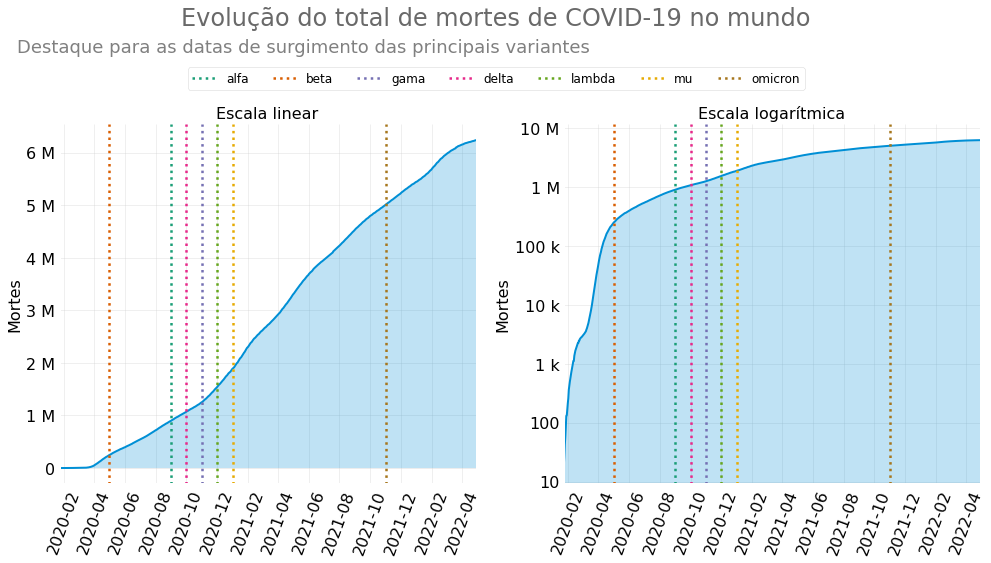

In [50]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'total_deaths'],
                  y_axis_name = 'Mortes',
                  sup_title = 'Evolução do total de mortes de COVID-19 no mundo\n\n',
                  text='Destaque para as datas de surgimento das principais variantes\n',
                  variants_lines=True, legend=True)

Enquanto nos gráficos de casos era possível perceber aumentos e eventualmente relacioná-los com variantes, vemos nos gráficos de mortes que não é tão evidente tal relação. Mesmo no caso da variante ômicron, não vemos um aumento na taxa de óbitos. Isto é um indicativo de que as variantes são menos letais que o vírus original. Na [página do CDC - Centers for Disease Control and Prevention](https://www.cdc.gov/coronavirus/2019-ncov/variants/omicron-variant.html) americano, o órgão afirma que a ômicron se espalha mais que as variantes anteriores, mesmo pessoas vacinadas podem contrair e passar a variante, mas é menos severa que as variantes anteriores.

#### Principais países

##### Totais absolutos

Vamos verificar os países que possuem os maiores totais de óbitos até abril de 2022:

In [51]:
top_10_total_deaths = df_countries_last_date.loc[:, ['location',
                                                 'continent',
                                                 'population',
                                                 'total_deaths',
                                                 ]].sort_values(by="total_deaths",
                                                                ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(top_10_total_deaths.reset_index(drop=True).to_html(index=False)))

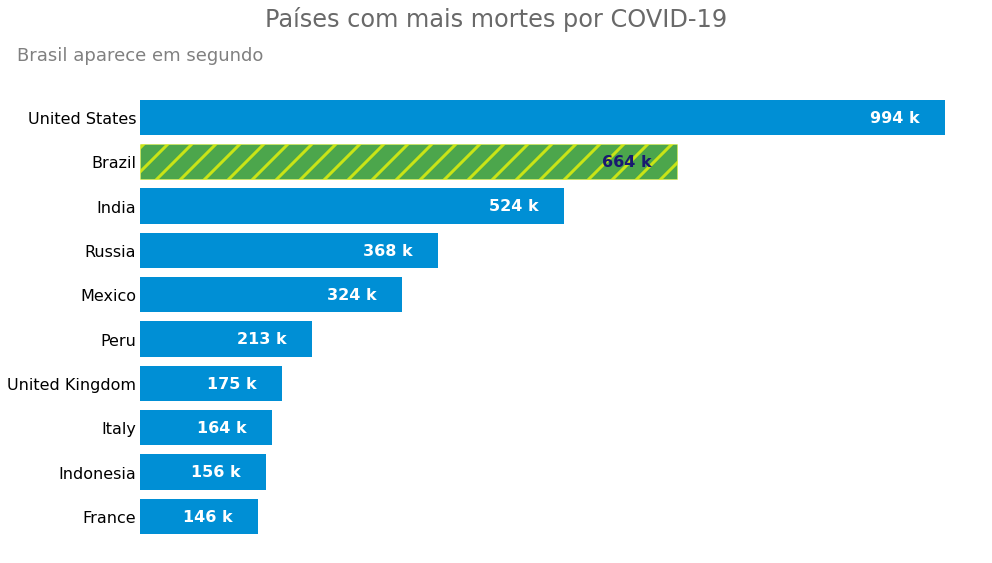

In [52]:
hbars_top10(top_10_total_deaths, 'location', 'total_deaths',
            'Países com mais mortes por COVID-19\n',
            'Brasil aparece em segundo\n', 2, fmt_function=eng_format_k)

Vemos que o Brasil aparece em segundo, atrás apenas dos Estados Unidos. Também observamos a presença de outro país da América do Sul entre os 10 países: o Peru. Como tal país não possui população tão numerosa quanto os primeiros colocados, é um sinal que a proporção de mortes por milhão é alta, o que veremos mais adiante.

Vamos verificar o total de óbitos até o momento por país de cada continente:

In [53]:
treemap(df_countries_last_date, df_world, df_continent_last_date,
        'total_deaths',
        'Total de mortes por COVID-19 no mundo<br>',
        'Mortes por continente e país. Clique em um continente para detalhes')

##### Totais por milhão de habitantes

Como já discutido ao apresentar os dados referentes a casos de COVID-19, números absolutos por vezes distorcem nossa percepção sobre os impactos reais em cada localidade. Faz mais sentido avaliar os números por milhão de habitantes. Vamos, então, construir a tabela e o gráfico:

In [54]:
top_10_deaths_per_million = df_countries_last_date.loc[:, ['location',
                                                       'continent',
                                                       'total_deaths_per_million',
                                                       ]].sort_values(by="total_deaths_per_million",
                                                                      ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(top_10_deaths_per_million.reset_index(drop=True).to_html(index=False)))

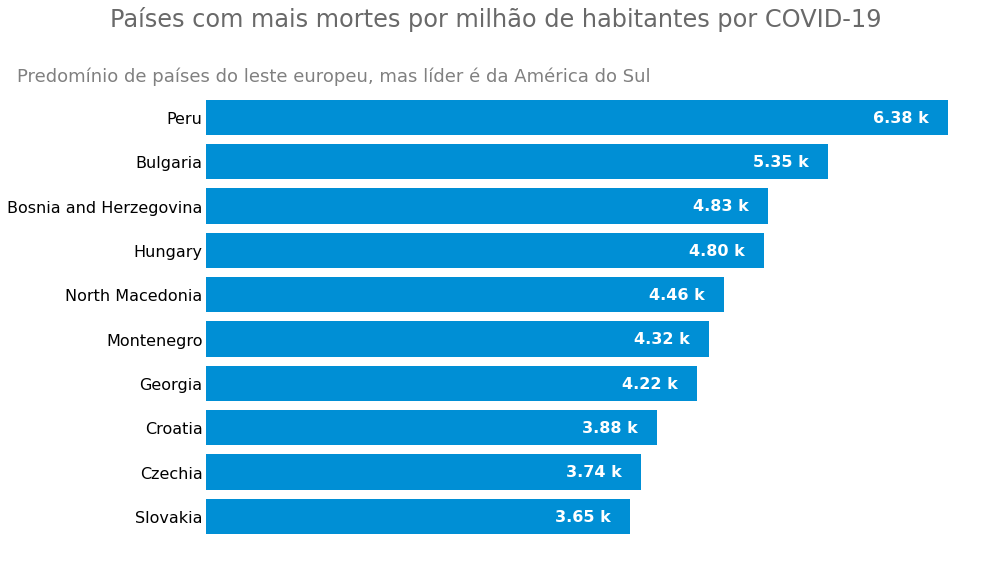

In [55]:
hbars_top10(top_10_deaths_per_million, 'location', 'total_deaths_per_million',
            'Países com mais mortes por milhão de habitantes por COVID-19\n',
            'Predomínio de países do leste europeu, mas líder é da América do Sul',
            fmt_function=eng_format)

Percebe-se claramente que a situação do Peru é diferenciada. E tal situação vem chamando a atenção [da mídia mundial](https://www.bbc.com/news/world-latin-america-53150808) e de [periódicos especializados](https://www.bmj.com/content/373/bmj.n1442). As condições precárias em regiões mais pobres do país e problemas no setor de saúde parecem  contribuir para o alto número de óbitos. Da mesma forma, a situação do leste europeu [tem gerado manchetes](https://www.ft.com/content/06b30dfb-998e-443f-a2bd-41f0b2ca4ab9) nos principais veículos de mídia mundiais.

Vamos analisar a situação de cada país por continente:

In [56]:
treemap(df_countries_last_date, df_world, df_continent_last_date,
        'total_deaths_per_million',
        'Total de mortes por milhão de habitantes por COVID-19<br>',
        'Mortes por milhão por continente e país. Clique em um continente para detalhes')

Observe como a Dinamarca, e seu território Ilhas Faroe, líder em casos por milhão, aparece como um dos países da Europa com menos mortes por milhão. Como discutido em outros trechos deste estudo, a mortalidade pode estar mais relacionada com aspectos sócio-econômicos e com o sistema de saúde de cada localidade do que com a agressividade da doença em si.

Outro país que merece ser destacado é a Suécia. Na contramão de outros países europeus, em especial seus vizinhos da Escandinávia, o país não adotou políticas restritivas como lockdown durante a pandemia. Devido ao [sistema legal do país](https://en.wikipedia.org/wiki/Swedish_government_response_to_the_COVID-19_pandemic), as decisões costumam ser descentralizadas para os ministérios, e estes não têm poder de lei. O Ministério da Saúde local adotou uma política de conscientização da população. As fronteiras com outros países foram fechadas, mas internamente as medidas foram brandas. Vemos nos dados de casos e de mortes que o país está dentre os menores números da Europa, [chamando a atenção da mídia](https://www.telegraph.co.uk/global-health/science-and-disease/swedens-death-rate-among-lowest-europe-despite-avoiding-strict/), indicando que [tal política não levou ao caos](https://www.bmj.com/content/375/bmj.n3081) que apoiadores de políticas restritivas diziam no início da pandemia. No entanto, como vemos nos gráficos, os números da Suécia são maiores que seus vizinhos escandinavos. [Alguns estudos](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7797349/) mostram que ocorreram mais mortes na porção de mais alta idade (acima de 80 anos) no país, comparado aos seus vizinhos, indicando possíveis problemas em casas de cuidados para idosos. Internamente, a visão é de que [a política não restritiva foi, em geral, correta](https://www.cbc.ca/news/world/sweden-report-coronavirus-1.6364154).

Já fiz uma pequena discussão na parte de casos acerca de países que provavelmente estão com dados abaixo dos números reais. Mas aqui cabe mais algumas observações sobre este tópico.

Começando pela América do Sul, percebemos a quase ausência da Venezuela, com um número muito abaixo de seus vizinhos. Obviamente que a situação chamou a atenção a ponto de a [Nature](https://www.nature.com/articles/d41586-021-02276-1) e o periódico [BMJ](https://www.bmj.com/content/371/bmj.m3938) irem verificar a situação. Como é de se esperar de regimes ditatoriais, há grande opressão governamental para abafar os casos e óbitos, além de falta de recursos básicos para controle da situação, conforme descrito nos links.

Na América do Norte, apesar de boa parte da atenção midiática ser destinada aos Estados Unidos, vemos que Trinidade e Tobago e México possuem números de óbitos por milhão de habitantes comparáveis aos americanos.

Por fim, um pouco sobre a África e a Ásia. De acordo com as [Nações Unidas](https://unstats.un.org/unsd/demographic-social/crvs/#coverage) parte significativa dos países africanos e asiáticos não possuem registros de mortes eficientes, conforme figura abaixo retirada do site da instituição. Desta forma, cuidado deve ser tomado ao se fazer comparações com estes países.

<center><img alt="covid_banner" width="60%" src="https://unstats.un.org/unsd/demographic-social/crvs/documents/DeathCov.jpg"></center>

Há também [notícias como esta](https://www.bbc.com/news/world-africa-55674139) a respeito dos problemas de registro de óbitos em países africanos.

Vejamos um mapa interativo da evolução das mortes por milhão em cada país:

In [57]:
animated_map(df_countries_monthly, 'iso_code', 'total_deaths_per_million',
             'location',
             'Evolução de mortes por milhão de habitantes por COVID-19<br>',
             'Mortes por milhão de habitantes para cada país entre 2020 e abril de 2022')

#### Idade e riqueza

Vamos verificar se o número de mortes possui alguma relação com a renda per capita do país ou a idade da população.

Comecemos verificando os países com maior PIB per capita:

In [58]:
top_10_gdp_per_capita_deaths = df_countries_last_date.loc[:, ['location',
                                                              'continent',
                                                              'total_deaths',
                                                              'total_deaths_per_million',
                                                              'gdp_per_capita',
                                                              ]].sort_values(by="gdp_per_capita",
                                                                             ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(top_10_gdp_per_capita_deaths.to_html(index=False)))

Já foi mostrado que a base de dados possui valores para agregados de países de acordo com a classificação de renda do Banco Mundial. Vejamos como estes agregados se comportam com relação ao total de mortes por milhão:

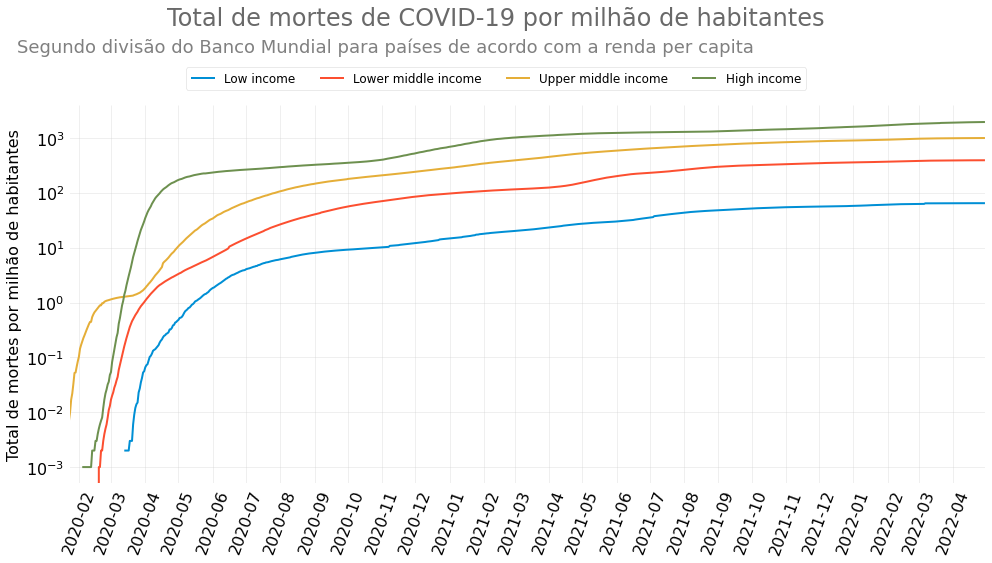

In [59]:
comparing_locations(df, 'date', 'total_deaths_per_million', 'Total de mortes por milhão de habitantes',
                   ('Low income', 'Lower middle income', 'Upper middle income', 'High income'),
                   'Total de mortes de COVID-19 por milhão de habitantes\n\n',
                    'Segundo divisão do Banco Mundial para países de acordo com a renda per capita\n',
                    ylog=True)

Vemos claramente que há mais mortes em países de renda alta, com quase duas ordens de grandeza mais casos que países de renda baixa. O perfil de crescimento é similar em todas as classificações. Observe como a faixa de valores deste gráfico, com máximo na ordem de 10<sup>3</sup>, é bem mais baixa que a do gráfico análogo visto na seção sobre casos, cujo máximo era na ordem de 10<sup>5</sup>.

Países com maiores rendas tendem a ter uma população mais velha. Vejamos como isto se relaciona com mortes por COVID-19:

In [60]:
bubble_scatter(df_countries_last_date, 'life_expectancy',
               'total_deaths_per_million', 'gdp_per_capita', 'continent',
               'location', 'Expectativa de vida',
               'Total de mortes por milhão de habitantes',
               'Total de mortes por milhão de habitantes por COVID-19 e expectativa de vida<br>',
               '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente')

No gráfico, vemos claramente que os países do continente africano possuem, em sua maioria, menores expectativas de vida e menores PIB per capita (menores círculos no gráfico). Seicheles, que é país africano com maior PIB per capita com uma das maiores expectativas de vida do continente e [chegou a liderar os dados mundiais em total de casos por milhão](https://franciscobustamante.com.br/portfolio/2021-10-projeto_covid/#total-de-casos) ao final de 2021, fica em segundo no continente no que diz respeito a mortes por milhão. No entanto, países dos demais continentes possuem números maiores de mortes.

Vemos uma tendência de localidades com maiores expectativas de vida apresentarem mais óbitos. Obviamente que países mais ricos tendem a ter maior parcela da população com idade avançada e, como a doença afeta mais pessoas idosas, é de se esperar maior quantidade de óbitos nesses países. No entanto, cabe destacar que há notáveis exceções nessa tendência como, por exemplo, o Japão, sobre o qual já fizemos uma extensa análise anteriormente. Singapura e Coreia do Sul também são notáveis exceções, sendo que vimos anteriormente que a Coreia do Sul figura entre os países com maiores números de casos totais. Vemos, portanto, que mais casos não necessariamente levam a mais óbitos. A Coreia do Sul [não adotou lockdown](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_South_Korea) como política de controle nem fechou estabelecimentos comerciais. Foi adotava uma política de muita testagem e de controle de distanciamento via celular e uso de cartão de crédito. O que gerou [desconforto na população](https://au.news.yahoo.com/coronavirus-thousands-defy-rally-ban-south-korea-cases-spike-215614353.html). E a política de hospitalização focou em pacientes de alto risco.

No gráfico, vemos que a expectativa de vida peruana é maior que a do Brasil, por exemplo, mas que o total de mortes por milhão de habitantes por COVID-19 é mais que o dobro da brasileira. Assim como já discutido em outros momentos do estudo, não se pode tirar grandes conclusões de apenas uma variável.

Uma maior expectativa de vida, no entanto, não necessariamente significa que a população atual possui mais idosos que jovens. Assim, vamos repetir o gráfico substituindo o eixo de expectativa de vida por mediana de idade:

In [61]:
bubble_scatter(df_countries_last_date, 'median_age',
               'total_deaths_per_million', 'gdp_per_capita', 'continent',
               'location', 'Mediana de idade da população',
               'Total de mortes por milhão de habitantes',
               'Total de mortes por milhão de habitantes por COVID-19 e mediana de idade<br>',
               '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente')

Vemos a mesma tendência: população mais idosa, mais mortes. No entanto, o caso do Peru se torna ainda mais chamativo por fugir da tendência dos demais países. 

O segundo país com mais mortes por milhão é a Bulgária. Se ampliarmos o gráfico anterior na porção de maiores medianas de idade, veremos que a Bulgária possui a oitava maior mediana de idade do mundo (44,7 anos), mas é o país com menor PIB per capita entre os 10 países com maior mediana de idade. O país [passa por uma crise demográfica](https://en.wikipedia.org/wiki/Bulgaria#Demographics) há alguns anos, com sua população envelhecendo e diminuindo de tamanho, além de ter uma parcela cada vez maior da população próximo ao nível de pobreza. Este retrato búlgaro é similar, guardadas as especificidades de cada país, aos demais países do leste europeu que aparecem na listagem de mais mortes por milhão. A [Bulgária acabou com restrições relativas ao COVID-19](https://www.schengenvisainfo.com/news/bulgaria-officially-lifts-all-covid-19-restrictions-on-may-1/) no início de maio.

O Peru possui uma mediana de idade bem menor que a búlgara, 29,1 anos, e um PIB per capita um terço menor. Conforme destacado em [notícias](https://www.bbc.com/news/world-latin-america-53150808) e [artigos](https://www.bmj.com/content/373/bmj.n1442), a situação de fragilidade econômica da população pode ter colaborado significativamente para a situação. Nas referências linkadas vemos, por exemplo, que cerca de 40 % das residências peruanas não possuem geladeiras e estimasse que mais de 10 % das residências possuem mais pessoas que o recomendável para seus tamanhos. O país foi um dos primeiros a decretar lockdown na América do Sul, sendo até considerado modelo neste aspecto embora claramente [não tenha ajudado](https://onlinelibrary.wiley.com/doi/10.1111/eci.13484), e a fornecer auxílio financeiro à sua população. No entanto, mais de um terço da população adulta não possui contas bancárias, não tendo acesso fácil ao auxílio.

Outra comparação de interesse entre os dois países é quanto à vacinação de suas respectivas populações. Os dados completos de vacinação serão apresentados adiante, mas já podemos adiantar que o Peru possui 80 % de sua população com esquema vacinal completo, enquanto que a Bulgária possui apenas 29 %. Desta forma, não parece ser razoável explicar a situação peruana com base em apenas vacinas.

### Novas mortes

Até o momento focamos em avaliar a evolução do total de óbitos no mundo e em cada país. Agora, vamos verificar a evolução de novos óbitos, à medida que foram sendo reportados. Assim, podemos verificar em quais momentos ocorreram as popularmente chamadas "ondas".

A base de dados apresenta as entradas na forma de dados diários e na forma de média móvel de 7 dias. A média móvel ajuda a visualizar melhor a tendência dos dados, visto que há grande variação dos dados diários. Vamos começar com as mortes em todo mundo:

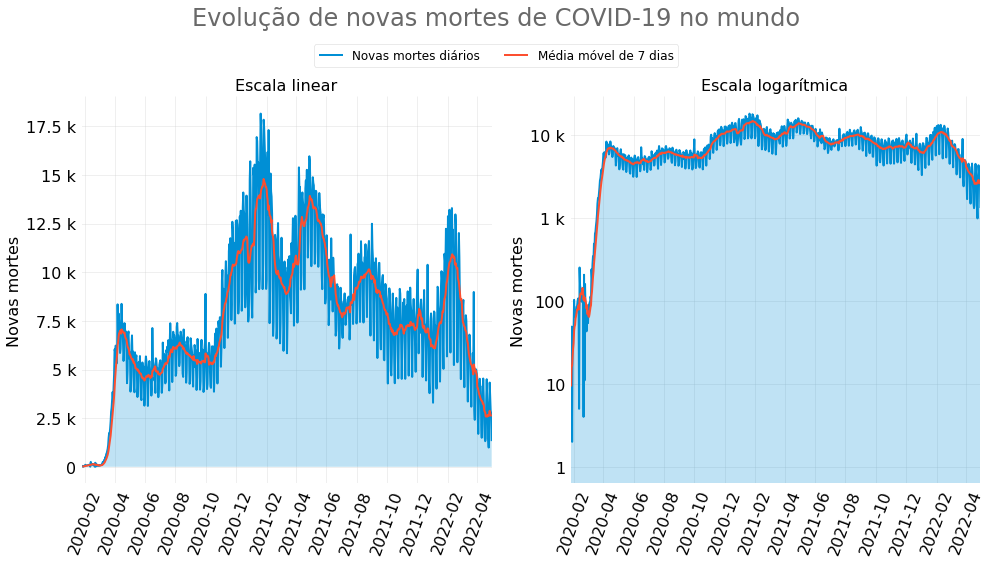

In [62]:
linear_log_scales(x=df.loc[df['location'] == 'World', 'date'],
                  y=df.loc[df['location'] == 'World', 'new_deaths'],
                  y_smooth=df.loc[df['location'] ==
                                  'World', 'new_deaths_smoothed'],
                  y_axis_name='Novas mortes',
                  y_label='Novas mortes diários',
                  y_smooth_label='Média móvel de 7 dias',
                  sup_title='Evolução de novas mortes de COVID-19 no mundo\n',
                  variants_lines=False, legend=True, legend_bbox=(0.5, 0.925))

Vemos que os máximos em novos óbitos acompanham os máximos de novos casos já discutido anteriormente. Nota-se, entretanto, uma grande diminuição na ordem de grandeza de casos para óbitos, além de verificarmos uma tendência de queda nos óbitos. Por exemplo, enquanto a variante ômicron levou a um grande aumento de casos, vemos que, em termos de óbitos, não houve um aumento tão grande quando comparamos com outras variantes. Vejamos nos próximos gráficos, com as datas de variantes e épocas de inverno:

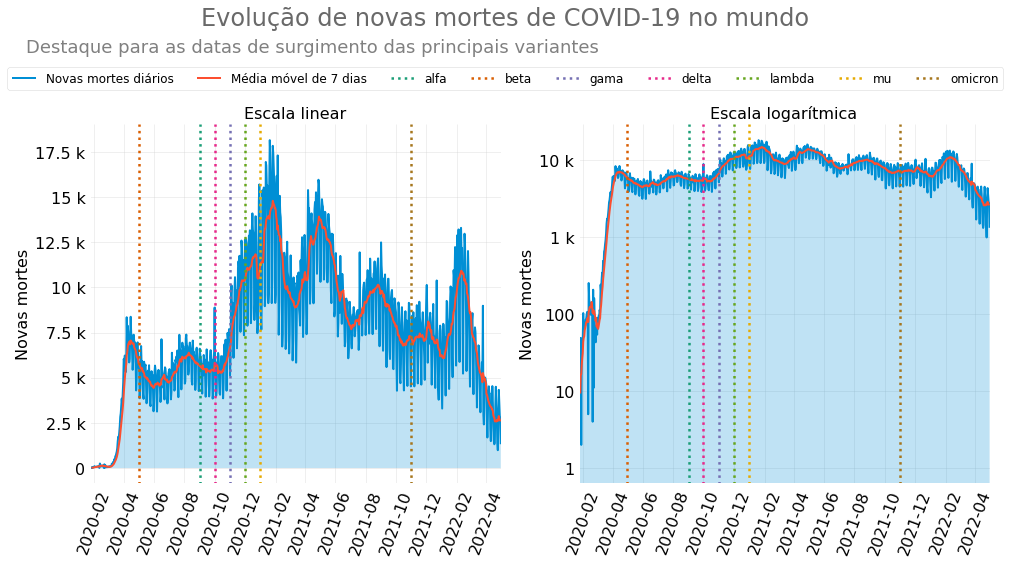

In [63]:
linear_log_scales(x=df.loc[df['location'] == 'World', 'date'],
                  y=df.loc[df['location'] == 'World', 'new_deaths'],
                  y_smooth=df.loc[df['location'] ==
                                  'World', 'new_deaths_smoothed'],
                  y_axis_name='Novas mortes',
                  y_label='Novas mortes diários',
                  y_smooth_label='Média móvel de 7 dias',
                  sup_title='Evolução de novas mortes de COVID-19 no mundo\n\n',
                  text='Destaque para as datas de surgimento das principais variantes\n',
                  variants_lines=True, legend=True)

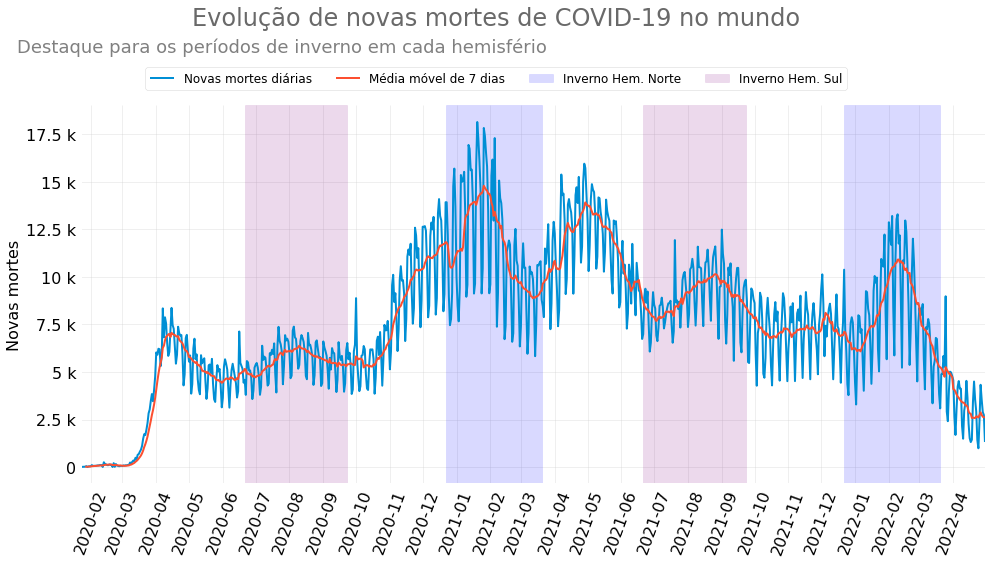

In [64]:
winter(x = df.loc[df['location'] == 'World', 'date'],
       y = df.loc[df['location'] == 'World', 'new_deaths'],
       y_smooth = df.loc[df['location'] == 'World', 'new_deaths_smoothed'],
       y_label='Novas mortes diárias',
       y_smooth_label='Média móvel de 7 dias',
       y_axis_name='Novas mortes',
       sup_title='Evolução de novas mortes de COVID-19 no mundo\n\n',
       text='Destaque para os períodos de inverno em cada hemisfério\n',
       legend=True)

A sazonalidade pode ser observada nos mapas interativos de novas mortes e novas mortes por milhão:

In [65]:
animated_map(df_countries_monthly, 'iso_code', 'new_deaths', 'location',
             'Evolução de novas mortes por COVID-19<br>',
             'Sazonalidade dos óbitos. Compare, por exemplo, EUA e Brasil')

In [66]:
animated_map(df_countries_monthly, 'iso_code', 'new_deaths_per_million', 'location',
             'Evolução de novas mortes por milhão de habitantes por COVID-19<br>',
             'Sazonalidade dos óbitos. Compare, por exemplo, EUA e Brasil')

Vejamos como foi o comportamento de novas mortes considerando agregados de países com base na classificação de renda do Banco Mundial:

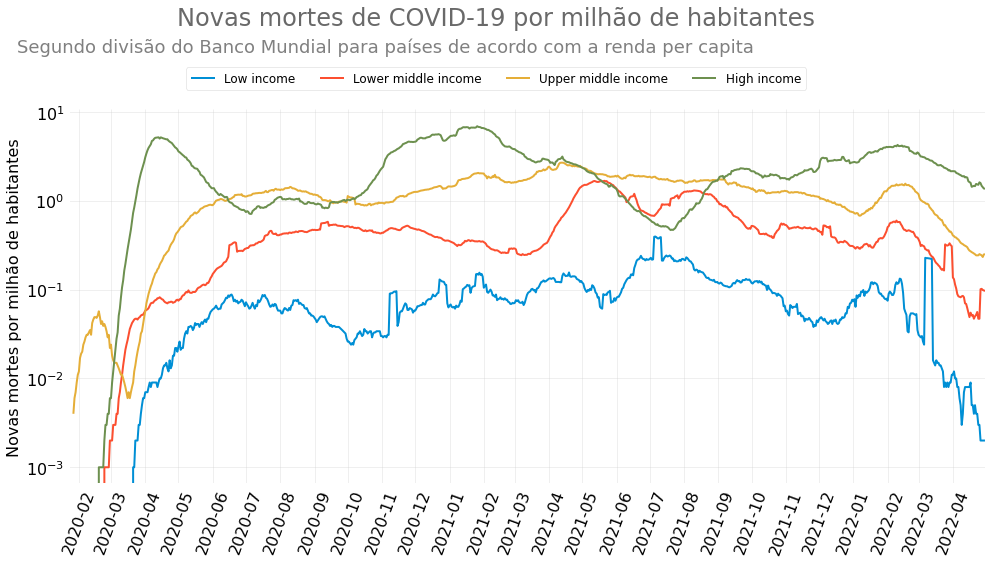

In [67]:
comparing_locations(df, 'date', 'new_deaths_smoothed_per_million', 'Novas mortes por milhão de habitantes',
                   ('Low income', 'Lower middle income', 'Upper middle income', 'High income'),
                   'Novas mortes de COVID-19 por milhão de habitantes\n\n',
                    'Segundo divisão do Banco Mundial para países de acordo com a renda per capita\n',
                    ylog=True)

Assim como já havíamos discutido para novos casos, vemos que as ondas de possuem maior impacto em países de mais alta renda. A variante ômicron, na passagem de 2021 para 2022, é perceptível em todas as classificações. No entanto, vemos que o incremento de mortes da ômicron é menor que de outras ondas do passado. Isto corrobora o que vem sendo mostrado no estudo e nas referências, que a ômicron é menos letal que variantes antecedentes.

## Evolução no número de vacinados

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/close-up-hand-holding-coronavirus-vaccine_23-2149012368.jpg"></center>

Certamente um dos pontos mais discutidos recentemente no contexto da pandemia. Vamos verificar a evolução.

### Total de vacinados

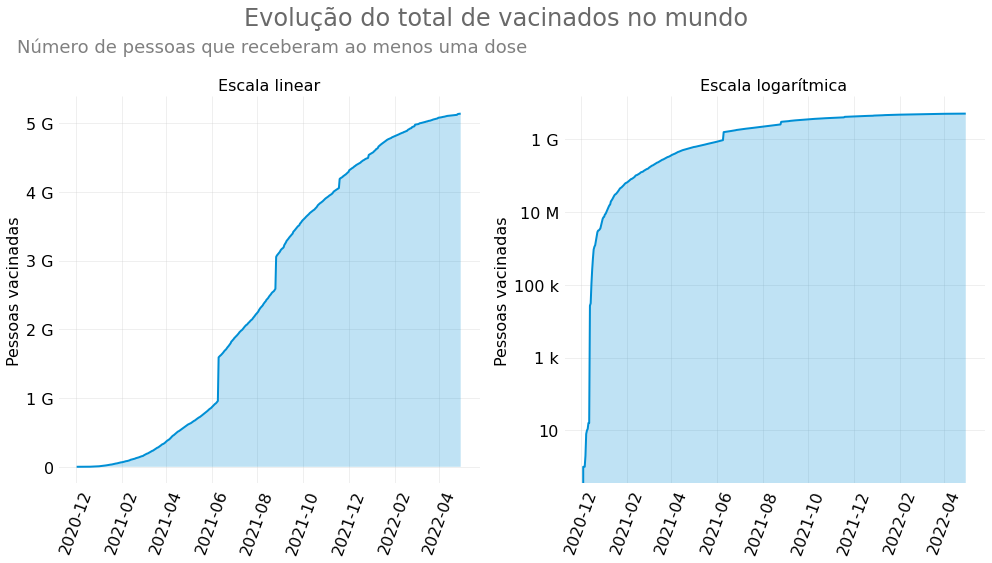

In [68]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'people_vaccinated'],
                  y_axis_name = 'Pessoas vacinadas',
                  sup_title = 'Evolução do total de vacinados no mundo\n',
                  text='Número de pessoas que receberam ao menos uma dose\n',
                  limit_dates=False)

Os gráficos começam em dezembro de 2020, quando as primeiras doses foram aplicadas ao redor do mundo. Vemos que, até abril de 2022, cerca de 5,1 bilhões de pessoas já receberam ao menos uma dose da vacina, praticamente dois terços da população mundial. Os saltos nos gráficos se devem a questões de disponibilização dos dados.

Vejamos quantas pessoas já receberam todas as doses protocolares:

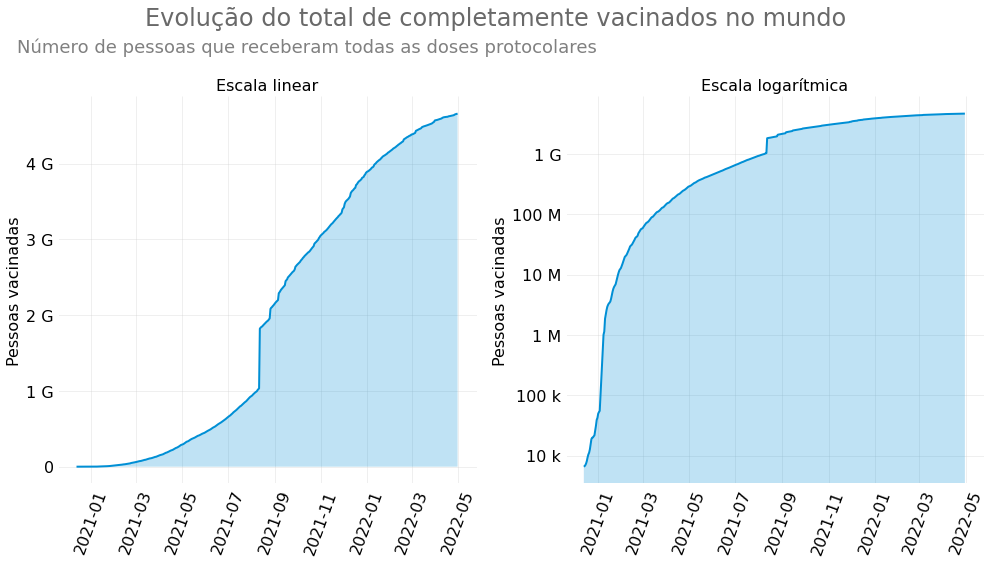

In [69]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'people_fully_vaccinated'],
                  y_axis_name = 'Pessoas vacinadas',
                  sup_title = 'Evolução do total de completamente vacinados no mundo\n',
                  text='Número de pessoas que receberam todas as doses protocolares\n',
                  limit_dates=False)

Vemos que uma parcela significativa da população mundial já tomou todas as doses protocolares. [Segundo as diretrizes da OWID](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations), são consideradas totalmente vacinadas as pessoas que receberam todas as doses inicialmente previstas no protocolo de cada vacina. Por exemplo, se uma vacina era prevista como sendo de duas doses, pessoas com duas doses são consideradas completamente vacinadas, mesmo que posteriormente não tenham tomado as doses de reforço. As doses de reforço são consideradas a parte, e podemos avaliá-las também:

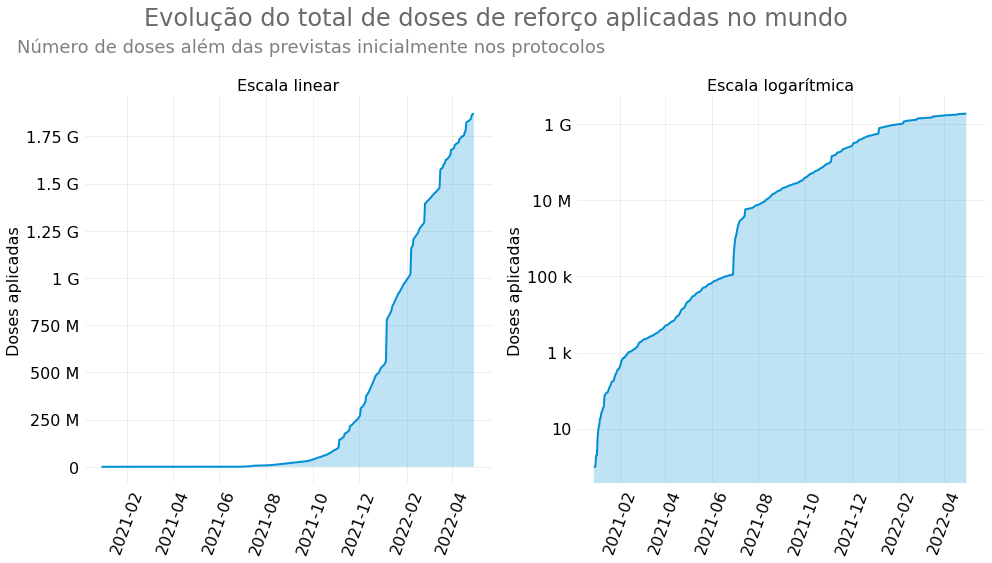

In [70]:
linear_log_scales(x = df.loc[df['location'] == 'World', 'date'],
                  y = df.loc[df['location'] == 'World', 'total_boosters'],
                  y_axis_name = 'Doses aplicadas',
                  sup_title = 'Evolução do total de doses de reforço aplicadas no mundo\n',
                  text='Número de doses além das previstas inicialmente nos protocolos\n',
                  limit_dates=False)

Vemos que o número de doses de reforço aplicadas vem subindo consideravelmente desde o meio de 2021.

Para fazer uma análise mais granular, olhando com mais detalhes cada país, precisamos criar um novo dataframe. Isto porque, desde março de 2022, os dados de vacinação da base de dados da OWID [só são atualizados em dias de semana](https://github.com/owid/covid-19-data/tree/master/public/data#changelog) (segunda a sexta). O dia 30 de abril de 2022 é um sábado, de forma que apresenta dados em branco para diversos países. Vamos criar um dataframe que preenche espaços em branco nas colunas referentes a vacinação com o último valor válido:

In [71]:
vaccine_cols = list(columns_per_category['Vaccinations'])

df[vaccine_cols] = df[vaccine_cols].replace('', np.nan)
df.loc[:, vaccine_cols] = df.groupby('iso_code')[vaccine_cols].ffill()

df_countries_last_weekday = df[~df['iso_code'].str.startswith(
    'OWID')].loc[df['date'] == last_date].sort_values(by="total_deaths", ascending=False)

Vejamos quais países possuem mais pessoas vacinadas com ao menos uma dose:

In [72]:
top_10_people_vaccinated = df_countries_last_weekday.loc[:, ['location',
                                                         'continent',
                                                             'population',
                                                             'people_vaccinated']].sort_values(by="people_vaccinated",
                                                                                               ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.0f}'.format):
    display(HTML(top_10_people_vaccinated.reset_index(
        drop=True).to_html(index=False)))

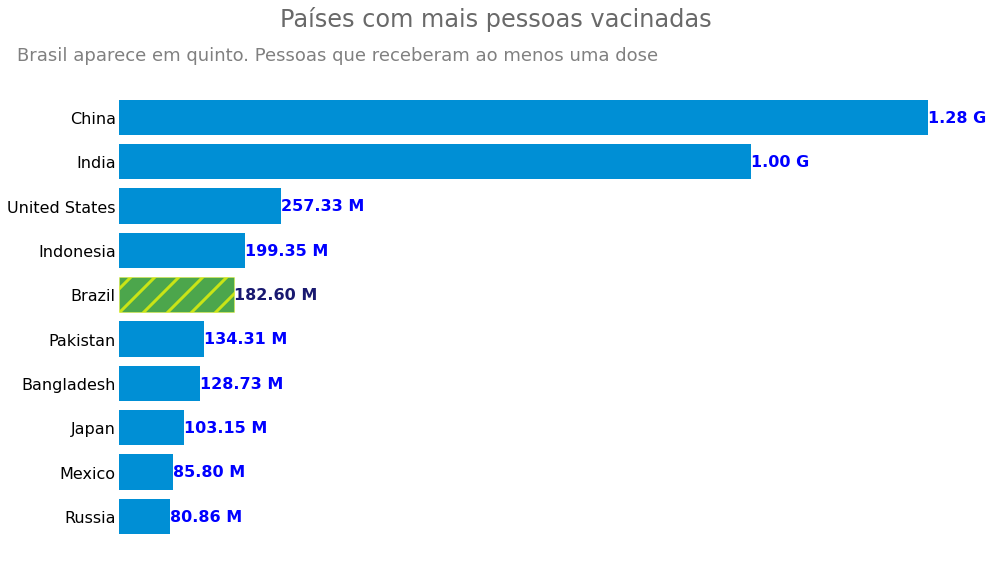

In [73]:
hbars_top10(top_10_people_vaccinated, 'location', 'people_vaccinated',
            sup_title='Países com mais pessoas vacinadas\n',
            text='Brasil aparece em quinto. Pessoas que receberam ao menos uma dose\n',
            brazil_position=5, padding=0, font_color='blue')

Vemos aqui que China e Índia, considerando suas imensas populações, já vacinaram com ao menos uma dose mais de três quartos das pessoas. Brasil e Estados Unidos também possuem quantidades significativas de pessoas vacinadas. Lembrando que não necessariamente o número a ser buscado é 100 % tendo em vista que os protocolos atuais não preveem vacinações em crianças.

Vamos verificar cada país por continente:

In [74]:
treemap(df_countries_last_weekday, df_world, df_continent_last_date,
        'people_vaccinated', 'Total de pessoas vacinadas<br>',
        'Pessoas vacinadas (ao menos uma dose) por continente e país. Clique em um continente para detalhes')

Observe que o gráfico acima possui menos países que os mostrados anteriormente para casos e óbtidos. Isto se deve ao fato de que nem todos os países possuem registros oficiais de vacinados de onde a OWID possa obter dados. O intervalo de disponibilização dos dados também é distinto para cada país, de forma que comparações devem ser feitas com cautela.

Assim como para casos e óbitos, análises comparativas fazem mais sentido com números relativos ao total da população de cada localidade. Vejamos então os locais com maior percentual da população vacinada com ao menos uma dose:

In [75]:
top_10_people_vaccinated_hundred = df_countries_last_weekday.loc[:, ['location',
                                                                     'continent',
                                                                     'population',
                                                                     'people_vaccinated_per_hundred']].sort_values(by="people_vaccinated_per_hundred",
                                                                                                                   ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(top_10_people_vaccinated_hundred.reset_index(
        drop=True).to_html(index=False)))

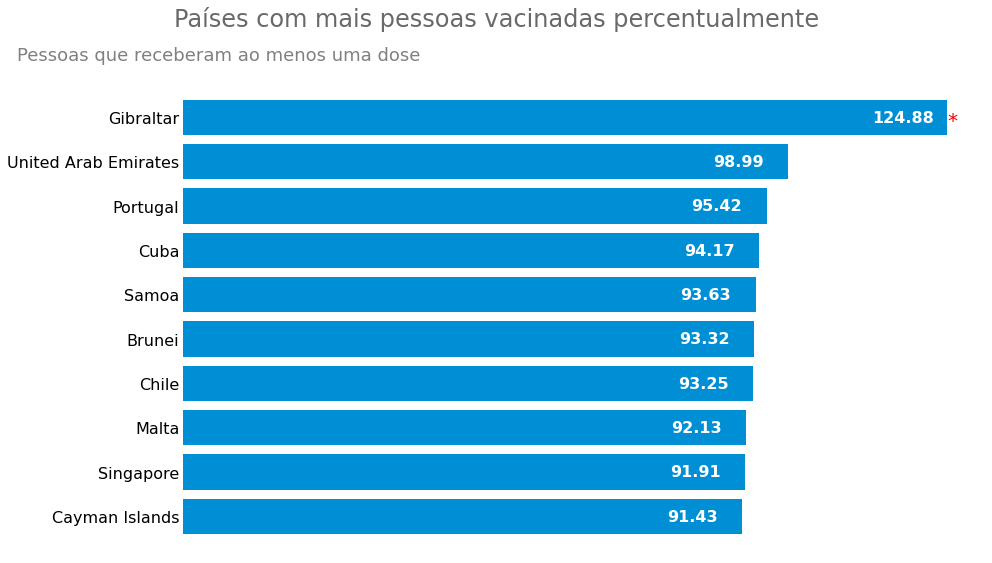

In [76]:
hbars_top10(top_10_people_vaccinated_hundred, 'location',
            'people_vaccinated_per_hundred',
            'Países com mais pessoas vacinadas percentualmente\n',
            'Pessoas que receberam ao menos uma dose\n',
            star=True)

Obviamente que o valor para Gibraltar está equivocado. [De acordo com a OWID](https://ourworldindata.org/covid-vaccinations#frequently-asked-questions), valores maiores do que 100 % podem ocorrer quando os valores para população estão desatualizados e/ou quando pessoas não residentes nos locais acabam entrando na conta como, por exemplo, turistas. No caso de Gibraltar, o aspecto turístico pode estar causando essa distorção.

Como era de se esperar, vemos o predomínio de localidades relativamente pequenas no que diz respeito ao número de habitantes, aparecendo apenas o Chile com população acima de 15 milhões de pessoas. Vejamos um gráfico de países por continente:

In [77]:
treemap(df_countries_last_weekday, df_world, df_continent_last_date,
        'people_vaccinated_per_hundred',
        'Percentual de pessoas vacinadas<br>',
        'Percentual (ao menos uma dose) por continente e país. Clique em um continente para detalhes')

Observa-se que, para ao menos uma dose, a cobertura vacinal está razoável, com cerca de dois terços da população mundial (considerando apenas os países para os quais há dados). Apenas o continente africano ainda possui a maior parte dos países com menos de 50 % das pessoas vacinadas com ao menos uma dose.

Vejamos agora os números para pessoas completamente vacinadas:

In [78]:
top_10_people_fully_vaccinated_hundred = df_countries_last_weekday.loc[:, ['location',
                                                                           'continent',
                                                                           'population',
                                                                           'people_fully_vaccinated_per_hundred']].sort_values(by="people_fully_vaccinated_per_hundred",
                                                                                                                               ascending=False)[0:10]

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(HTML(top_10_people_fully_vaccinated_hundred.reset_index(
        drop=True).to_html(index=False)))

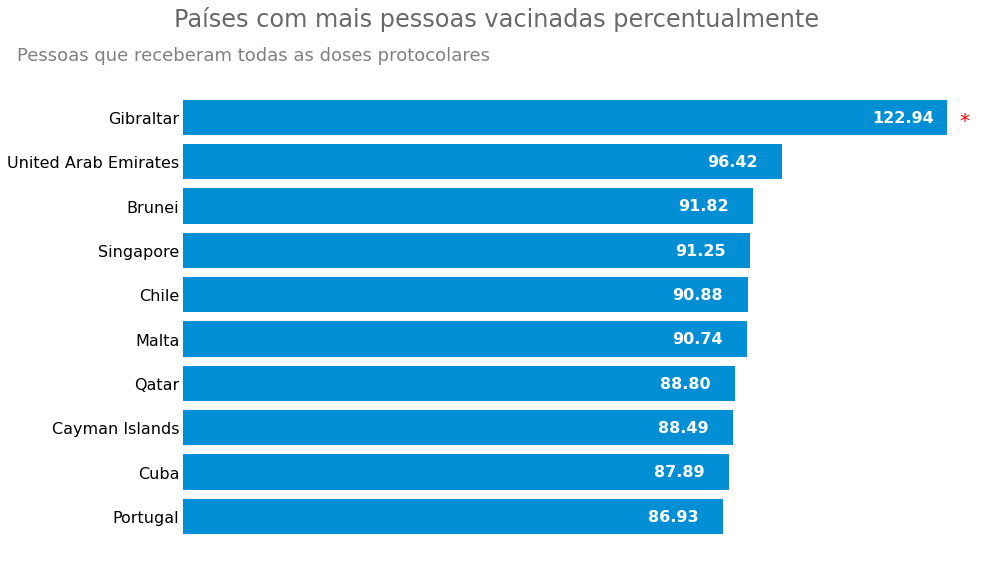

In [79]:
hbars_top10(top_10_people_fully_vaccinated_hundred, 'location',
            'people_fully_vaccinated_per_hundred',
            'Países com mais pessoas vacinadas percentualmente\n',
            'Pessoas que receberam todas as doses protocolares\n',
            star=True)

In [80]:
treemap(df_countries_last_weekday, df_world, df_continent_last_date,
        'people_fully_vaccinated_per_hundred',
        'Percentual de pessoas vacinadas<br>',
        'Percentual (todas as doses) por continente e país. Clique em um continente para detalhes')

Alguns países merecem ser mencionados. Vimos no início deste estudo que a Dinamarca era o país com mais casos por milhão de habitantes e, agora, vemos que é o quinto mais vacinado da Europa. Também discutimos amplamente a situação de Austrália e Nova Zelândia, que enfrentam um grande aumento de casos da variante ômicron, sendo que ambos já vacinaram percentuais significativos de suas populações. Na América do Sul, o Peru, que já vacinou um percentual da população maior que o Brasil, por exemplo, possui o maior número óbitos por milhão de habitantes em todo o mundo. Na Ásia, mostramos que a Coreia do Sul é o oitavo país com mais casos no mundo e é o quinto mais vacinado na Ásia, sendo que possui números muito baixos de óbitos.

Assim, vemos que não é simples avaliar o impacto real das vacinações a partir de números tão genéricos. Citamos exemplos de países com elevadas taxas de vacinação que tiveram problemas com surtos de novos casos ou com elevado número de mortes. Cabe destacar que se está olhando um retrato, um momento no tempo. Não necessariamente um país com elevada taxa de vacinação agora começou a aplicação cedo, pode ser que tenha começado a aplicação tardiamente e eventuais benefícios das vacinas não tenham sido aproveitados por sua população, levando a casos mais graves e óbitos. Da mesma forma, comparando os casos de Peru e Bulgária com os de Japão e Coreia do Sul, todos detalhados durante este estudo, vemos que o preparo da rede de saúde e as condições de vida da população têm efeito imenso no resultado final de casos e óbitos, eventualmente até mais que a vacinação em si.

Vejamos se há alguma relação entre quantidade de vacinados e PIB per capita e se países com pessoas mais velhas estão se vacinando mais:

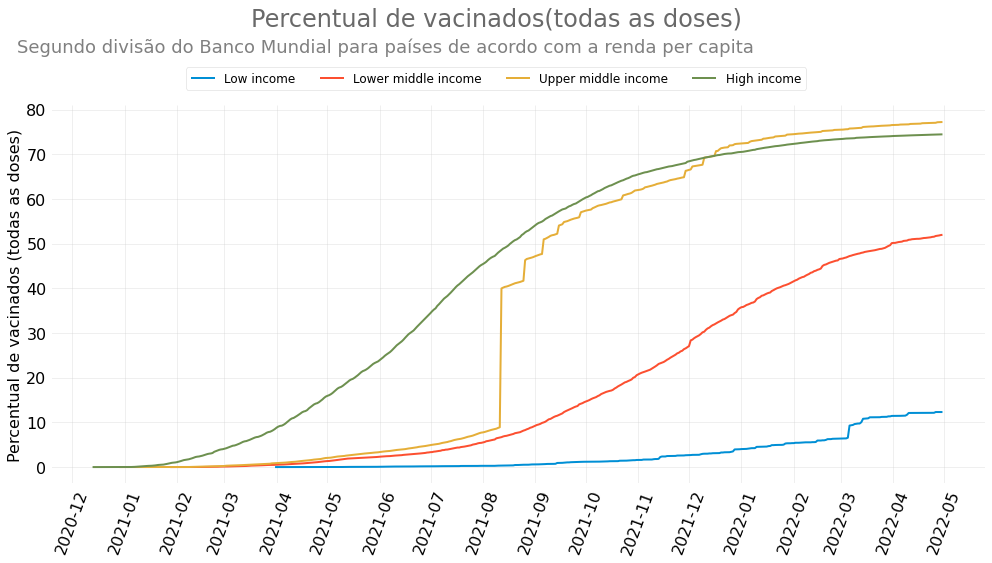

In [81]:
comparing_locations(df, 'date', 'people_fully_vaccinated_per_hundred', 
                    'Percentual de vacinados (todas as doses)',
                   ('Low income', 'Lower middle income', 'Upper middle income', 'High income'),
                   'Percentual de vacinados(todas as doses)\n\n',
                    'Segundo divisão do Banco Mundial para países de acordo com a renda per capita\n',
                    limit_dates=False)

Neste primeiro gráfico, vemos como países de mais alta renda possuem um percentual de totalmente vacinados bem maior que baixas de renda mais baixa. Além disso, vemos como os classificados como de renda alta atingiram metada de pessoas vacinadas de forma muito mais rápida que países das demais classificações.

Podemos adicionar mais camadas de informação, avaliando o perfil de idade, por exemplo:

In [82]:
bubble_scatter(df_countries_last_weekday, 'median_age',
               'people_fully_vaccinated_per_hundred', 'gdp_per_capita',
               'continent', 'location', 'Mediana de idade da população',
               'Percentual de vacinados',
               'Percentual de vacinados (todas as doses) e mediana de idade<br>',
               '<b>Tamanho</b>: PIB per capita. <b>Cor</b>: continente')

Como já discutido anteriormente, países com maior PIB per capita tendem a ter uma população mais velha e, pelo gráfico, uma maior parcela da população vacinada. Faz sentido se considerarmos que há custo envolvido em adquirir as vacinas, de forma que países mais ricos tendem a conseguir adquirir vacinas mais facilmente e a ter melhores condições de realizar grandes campanhas de vacinação. O dado para Luxemburgo não está atualizado [por problemas nos relatórios do país](https://github.com/owid/covid-19-data/issues/2153). É perceptível como países africanos, que possuem baixa mediana de idade e valores de PIB per capita baixos, também possuem baixo percentual de vacinados.

### Novas vacinações

Já vimos a evolução dos números totais, vejamos agora a evolução de novas vacinações:

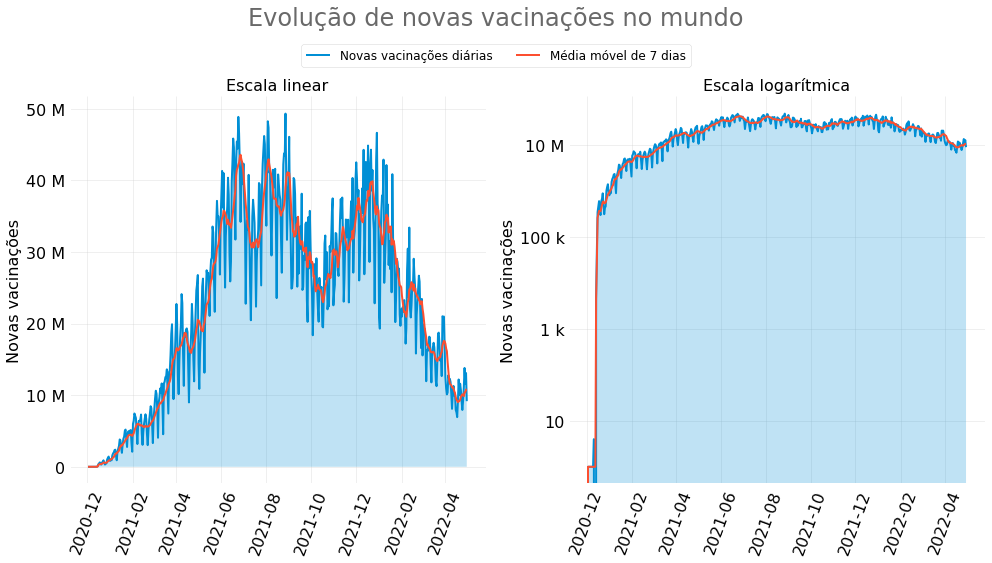

In [83]:
linear_log_scales(x=df.loc[df['location'] == 'World', 'date'],
                  y=df.loc[df['location'] == 'World', 'new_vaccinations'],
                  y_smooth=df.loc[df['location'] ==
                                  'World', 'new_vaccinations_smoothed'],
                  y_axis_name='Novas vacinações',
                  y_label='Novas vacinações diárias',
                  y_smooth_label='Média móvel de 7 dias',
                  sup_title='Evolução de novas vacinações no mundo\n',
                  legend=True, legend_bbox=(0.5, 0.925), limit_dates=False)

Vemos que há uma tendência decrescente. Podemos considerar algumas hipóteses para este declínio que, provavelmente, ocorrem em conjunto:

- a mais evidente é que à medida que mais pessoas completam o protocolo de vacinação, menos vacinas são tomadas;
- países mais pobres estão tendo [dificuldades de adquirir vacinas](https://www.nature.com/articles/d41586-021-02383-z). Conforme o artigo do link, há pressão para que as patentes das tecnologias aplicadas pelas grandes farmacêuticas sejam quebradas para que empresas locais possam fabricar as vacinas a um menor custo. Ou que sejam feitas colaborações com as tais empresas;
- menos pessoas querendo se vacinar, por diversos motivos como (evidências nos links):
    - a crescente percepção pública e de cientistas de que as [vacinas são menos eficazes](https://www.nature.com/articles/d41586-021-02532-4) do que inicialmente se pensava, especialmente devido ao surgimento de variantes;
    - crescente desconfiança quanto a potenciais conflitos de interesse que eventualmente contribuíram para [a aprovação emergencial das vacinas](https://www.bmj.com/content/373/bmj.n1283) com [triagem diferenciada](https://ncirs.org.au/phases-clinical-trials) e para o boicote a medicamentos utilizados no que ficou conhecido como [tratamento precoce](https://www.sciencedirect.com/science/article/pii/S2052297520300627);
    - crescente revolta entre a população de diversos países frente à imposição dos chamados passaportes de vacinação. Exemplos [aqui](https://www.foxnews.com/world/protesters-pack-paris-streets-in-defiance-of-covid-19-vaccine-passport-our-freedoms-are-dying) e [aqui](https://www.bmj.com/content/375/bmj.n2575). Muito embora durante todo o estudo tenham sido citadas referências mostrando que boa parte dos países já retiraram total ou parcialmente as restrições referentes à COVID, é pouco provável que pessoas que se sentiram agredidas em suas liberdades durante o período repressivo busquem se vacinar agora que as restrições foram levantadas.
    - no mesmo sentido, a [Áustria, que implementou lockdown para não vacinados](https://youtu.be/y9io1MZz_7E), não vê seu número de vacinados aumentar, provavelmente porque tais pessoas que tiveram restringidas suas liberdades não se sentem motivadas a seguir recomendações forçadas. Além do aspecto de divisão social mostrado na referência. Desta forma, a crescente segregação das atividades permitidas ou não para aqueles que não se vacinaram pode estar contribuindo para que aqueles que não se vacinaram continuem com este posicionamento.
    - eventuais [riscos não previstos de algumas vacinas](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4072489).
    
Qual dos motivos apontados contribui mais ou se há mais algum motivo é difícil de avaliar com base nos dados disponíveis. No entanto, se verificarmos o perfil de novas vacinações com base na classificação de renda do Banco Mundial, gráfico a seguir, vemos que países de mais alta renda já estão com perfil decrescente de novas vacinações, enquanto que países de renda baixa estão em perfil crescente. Isto corrobora o escrito acima, sobre a dificuldade que países pobres estão tendo para adquirir vacinas.

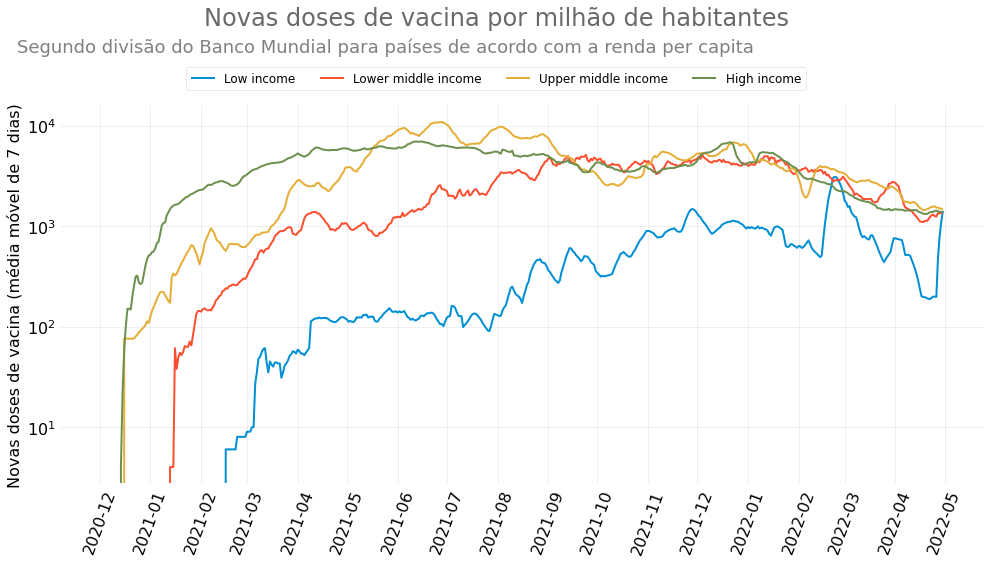

In [84]:
comparing_locations(df, 'date', 'new_vaccinations_smoothed_per_million', 
                    'Novas doses de vacina (média móvel de 7 dias)',
                   ('Low income', 'Lower middle income', 'Upper middle income', 'High income'),
                   'Novas doses de vacina por milhão de habitantes\n\n',
                    'Segundo divisão do Banco Mundial para países de acordo com a renda per capita\n',
                    limit_dates=False, ylog=True)

## Comparações e correlações

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/close-up-pen-market-research_1098-3465.jpg"></center>

Já analisamos casos, óbitos e vacinações de forma separada. Vamos começar a buscar comparações e correlações. Primeiro, vamos comparar a ordem de grandeza entre casos, mortes e vacinações nos continentes:

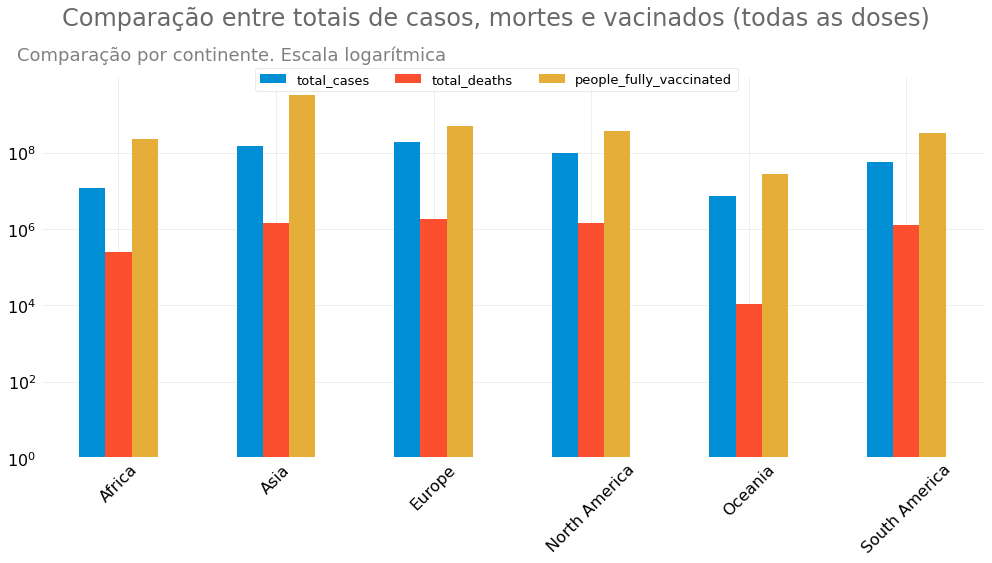

In [85]:
fig, ax = plt.subplots()

df_continent_last_date.plot(kind='bar', x='location', y=['total_cases',
                                                         'total_deaths',
                                                         'people_fully_vaccinated'],
                            log=True, ax=ax, legend=False)

ax.set_xlabel(None)
ax.tick_params(axis='x', rotation=45)

plt.suptitle('Comparação entre totais de casos, mortes e vacinados (todas as doses)\n',
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Comparação por continente. Escala logarítmica\n',
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()

fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
           handles=handles, labels=labels)

plt.show()

Como já abordado brevemente anteriormente, há uma diferença de cerca de duas ordens de grandeza entre casos e mortes. Podemos ver isto também em um gráfico com os mesmos dados por milhão de habitantes:

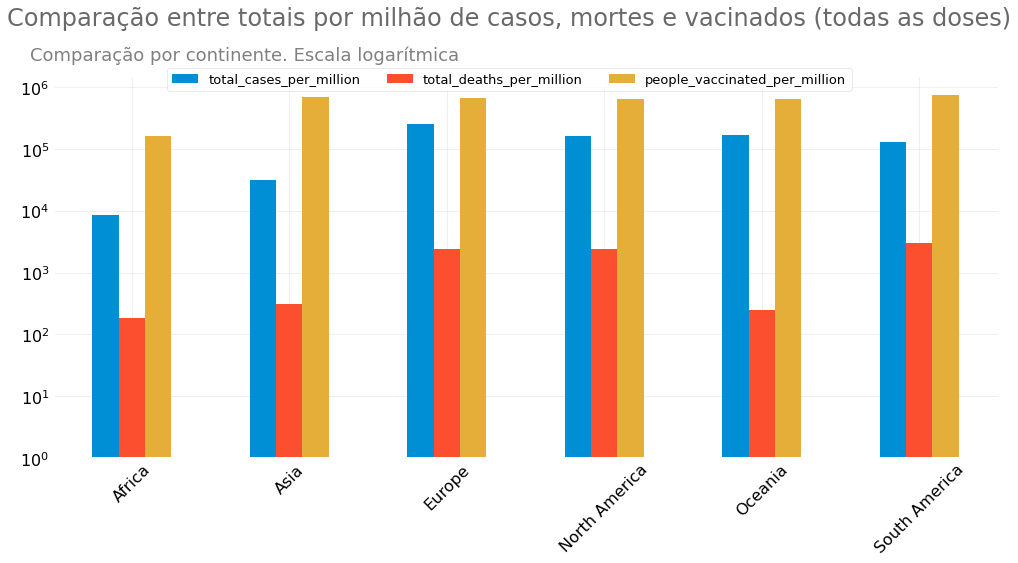

In [86]:
with pd.option_context('mode.chained_assignment', None):
    df_continent_last_date['people_vaccinated_per_million'] = df_continent_last_date['people_fully_vaccinated_per_hundred'] * 1E4

fig, ax = plt.subplots()
df_continent_last_date.plot(kind='bar', x='location', y=['total_cases_per_million',
                                                         'total_deaths_per_million',
                                                         'people_vaccinated_per_million'],
                            log=True, ax=ax, legend=False)

ax.set_xlabel(None)
ax.tick_params(axis='x', rotation=45)

plt.suptitle('Comparação entre totais por milhão de casos, mortes e vacinados (todas as doses)\n',
             color='dimgray')
plt.gcf().text(0.025, 0.85, 'Comparação por continente. Escala logarítmica\n',
               fontsize=18, color='gray')

handles, labels = ax.get_legend_handles_labels()

fig.legend(bbox_to_anchor=(0.5, 0.885), loc='upper center', ncol=8,
           handles=handles, labels=labels)

plt.show()

Esta observação está coerente com estudos que indicam que a mortalidade da COVID-19 fica em torno de 1 a 2 %. Cabe ressaltar que há diferentes formas de cálculo e interpretações para mortalidade [como mostra esse material da OMS](https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19), especialmente com a pandemia em andamento. E já vimos que há diversas questões envolvendo a disponibilização de dados por parte de alguns países. 

No entanto, se confirmada essa faixa de mortalidade, a pandemia de COVID-19 seria [proporcionalmente menos fatal](https://www.news-medical.net/health/How-does-the-COVID-19-Pandemic-Compare-to-Other-Pandemics.aspx) que outras pandemias no último século. O que diferencia a COVID-19, segundo [estudos](https://tdtmvjournal.biomedcentral.com/articles/10.1186/s40794-020-00129-9), é sua alta transmissibilidade que a espalhou por todo o planeta, de forma que a contagem total de mortos se tornou elevada. Cabe ressaltar que, como toda comparação, cuidados devem ser tomados e há [estudos](https://www.cambridge.org/core/journals/infection-control-and-hospital-epidemiology/article/why-comparing-coronavirus-disease-2019-covid19-and-seasonal-influenza-fatality-rates-is-like-comparing-apples-to-pears/FDFE92B10895C57C42F59C2422DB7582) que abordam tais cuidados, que fogem ao escopo deste trabalho.

Durante a análise, em alguns momentos correlações de casos e óbitos com idade da população e PIB per capita foram estudadas. Vamos avaliar, através de [matrizes de correlação](https://en.wikipedia.org/wiki/Correlation), se há correlações positivas ou negativas entre variáveis. Comecemos procurando relações entre totais de casos/óbitos com vacinação, indicadores de riqueza e indicadores de idade:

<AxesSubplot:>

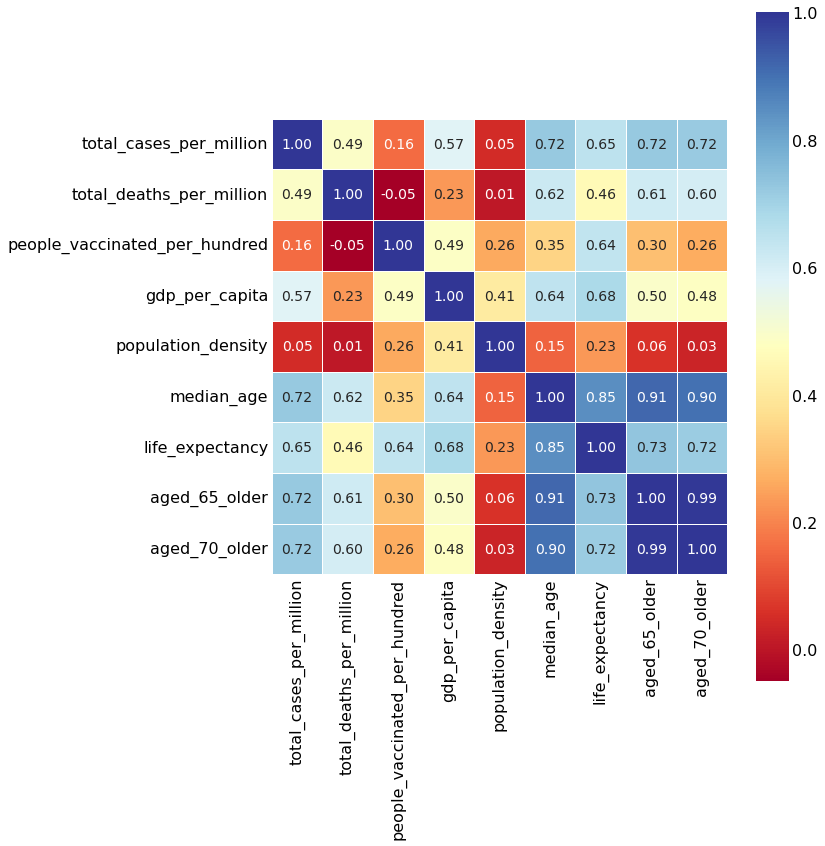

In [87]:
corr_countries = df_countries_last_date[['total_cases_per_million',
                                         'total_deaths_per_million',
                                         'people_vaccinated_per_hundred',
                                         'gdp_per_capita',
                                         'population_density',
                                         'median_age',
                                         'life_expectancy',
                                         'aged_65_older',
                                         'aged_70_older']].corr()


fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr_countries, cmap='RdYlBu', fmt='.2f', square=True,
            linecolor='white', annot=True, linewidths=.5, ax=ax,
            annot_kws={'size': 14})

Podemos criar matriz similar mas para novos casos/óbitos/vacinações e suas relações com índices que variam no tempo:

<AxesSubplot:>

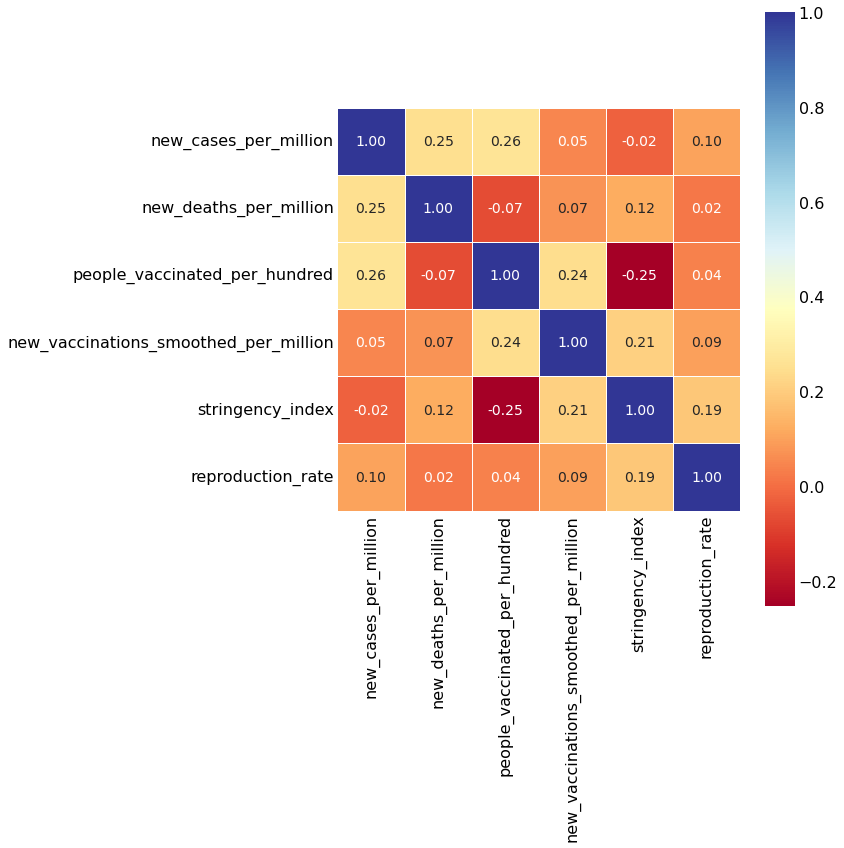

In [88]:
corr_countries = df_countries[['new_cases_per_million',
                               'new_deaths_per_million',
                               'people_vaccinated_per_hundred',
                               'new_vaccinations_smoothed_per_million',
                               'stringency_index',
                               'reproduction_rate', ]].corr()


fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr_countries, cmap='RdYlBu', fmt='.2f', square=True,
            linecolor='white', annot=True, linewidths=.5, ax=ax,
            annot_kws={'size': 14})

Nas figuras acima temos algumas correlações mais óbvias e que já foram discutidas no decorrer do estudo, que são:

- correlação positiva entre idades mais avançadas e maior PIB per capita;
- correlação positiva entre mais pessoas vacinadas e maior PIB per capita;
- como consequência das anteriores, correlação positiva entre pessoas vacinadas e idades mais avançadas

Outras correlações:

- correlação positiva entre pessoas vacinadas e casos por milhão;
- correlação negativa entre pessoas vacinadas e mortes por milhão;
- correlação positiva entre o índice de restrição e a taxa de reprodução efetiva;
- correlação positiva entre o índice de restrição e novas mortes;

Estas duas últimas correlações, embora fracas, encontram respaldo em algumas publicações científicas recentes, como [esta](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3711686) e [esta](https://onlinelibrary.wiley.com/doi/10.1111/eci.13484), que parecem indicar ineficácia ou mesmo piora no número de casos e óbitos devido ao uso de medidas restritivas.

Muito se fala sobre o efeito de comorbidades, vamos verificar se há correlações envolvendo as variáveis referentes a doenças:

<AxesSubplot:>

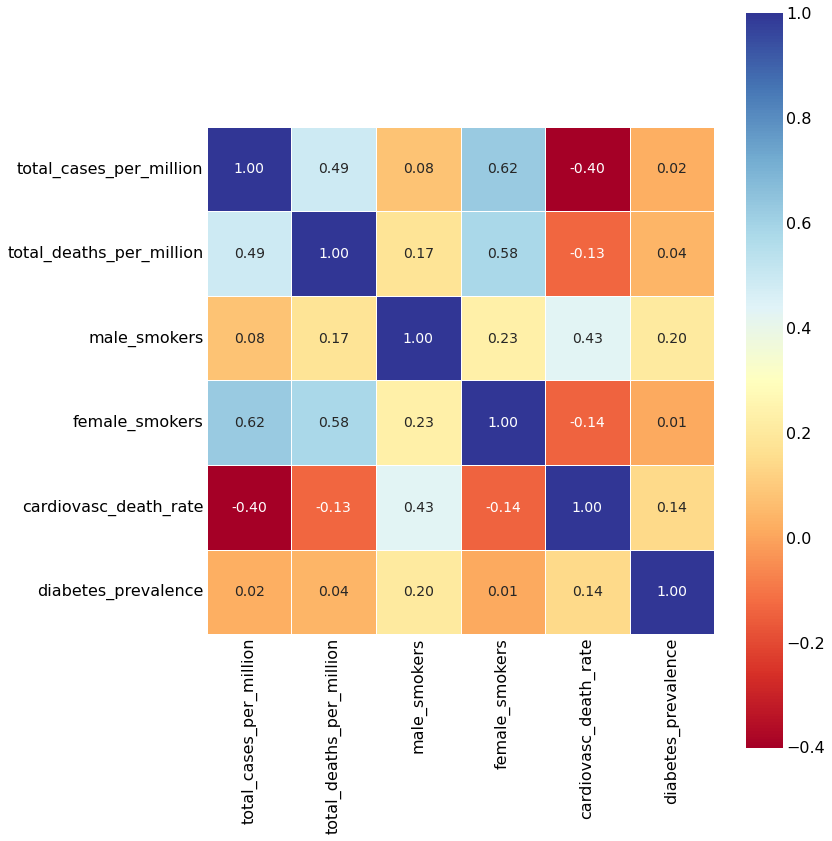

In [89]:
corr_countries = df_countries_last_date[['total_cases_per_million',
                                         'total_deaths_per_million',
                                         'male_smokers', 'female_smokers',
                                         'cardiovasc_death_rate',
                                         'diabetes_prevalence',
                                         ]].corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_countries, cmap='RdYlBu', fmt='.2f', square=True,
            linecolor='white', linewidths=.5, annot=True, ax=ax,
            annot_kws={'size': 14})

Curiosamente há relação negativa entre taxa de mortalidade por doenças cardiovasculares (lembrando que os dados são de 2017) e casos e óbitos. E há relação positiva entre mulheres fumantes e casos e óbitos, assim como para homens mas com valores menores. Não se pode fazer análises muito profundas com base nestes dados pois não significa que as pessoas que tiveram os casos ou morreram tinham as doenças ou fumavam. Os dados de fumantes e doenças são para cada localidade e não para cada indivíduo.

## Brasil

<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/realistic-shot-waving-flag-brazil-with-interesting-textures_181624-11214.jpg"></center>

Para terminar, vamos abordar um pouco da situação brasileira. Em alguns momentos durante o estudo comentários já foram feitos acerca do país, então apenas complementaremos com mais algumas informações.

Comecemos verificando como a evolução de novos casos se relaciona com as datas de surgimento de novas variantes e com os períodos de inverno:

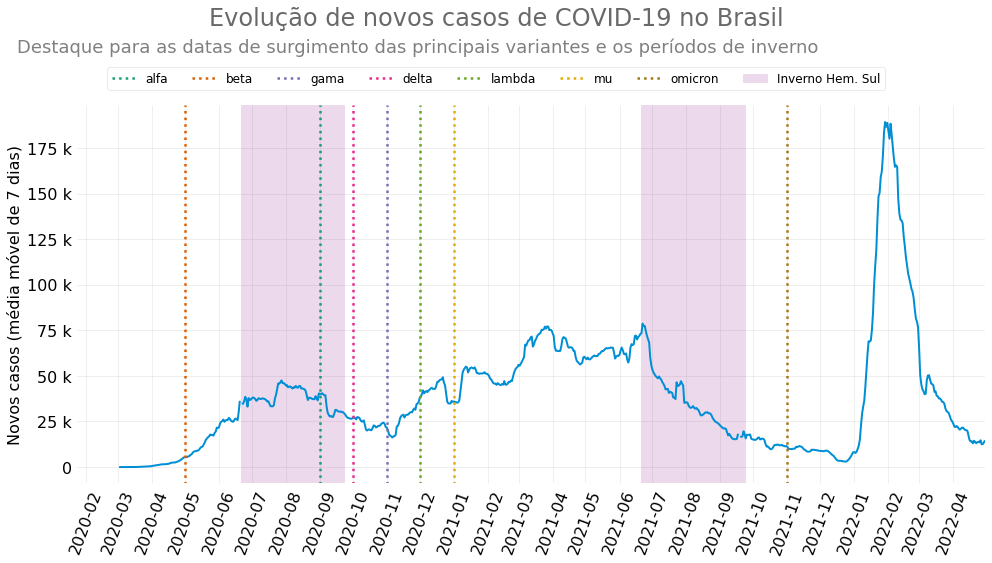

In [90]:
winter(x = df.loc[df['location'] == 'Brazil', 'date'],
       y = df.loc[df['location'] == 'Brazil', 'new_cases_smoothed'],
       y_axis_name='Novos casos (média móvel de 7 dias)',
       sup_title='Evolução de novos casos de COVID-19 no Brasil\n\n',
       text='Destaque para as datas de surgimento das principais variantes e os períodos de inverno\n',
       north_hem=False, variants_lines=True,
       legend=True)

No gráfico há um aumento significativo de casos logo após a variante gama, cujo primeira amostra foi no país. No entanto, cabe ressaltar que as variantes podem demorar um certo tempo para se espalhar pelo mundo, de forma que as datas das outras variantes não necessariamente são estas no país.

Há picos de casos nos invernos, porém os maiores picos foram entre março e maio de 2021 e janeiro e fevereiro de 2022. E no último inverno tivemos um pico no início da estação mas um perfil decrescente na parte final.

O Ministério da Saúde, ao [fim de abril de 2022](https://www1.folha.uol.com.br/cotidiano/2022/04/queiroga-assina-portaria-que-acaba-com-a-emergencia-sanitaria-pela-covid.shtml), declarou o fim da emergência sanitária.

Vejamos o perfil de novos óbitos:

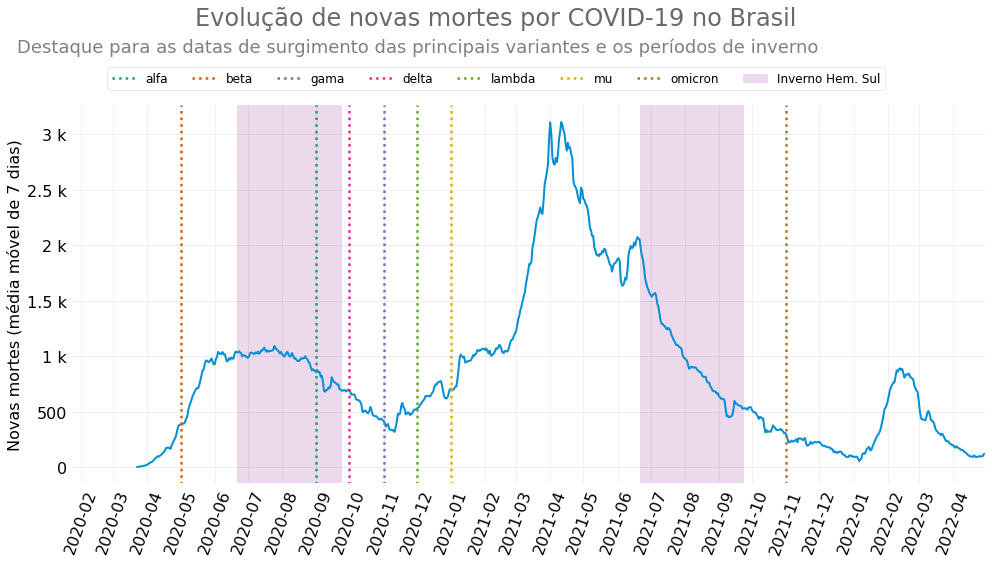

In [91]:
winter(x = df.loc[df['location'] == 'Brazil', 'date'],
       y = df.loc[df['location'] == 'Brazil', 'new_deaths_smoothed'],
       y_axis_name='Novas mortes (média móvel de 7 dias)',
       sup_title='Evolução de novas mortes por COVID-19 no Brasil\n\n',
       text='Destaque para as datas de surgimento das principais variantes e os períodos de inverno\n',
       north_hem=False, variants_lines=True,
       legend=True)

Vemos que o perfil de novos óbitos segue o de novos casos, mas em menor ordem de grandeza. Também é possível observar como a variante ômicron, que aumentou significativamente o número de casos, não aumentou na mesma proporção o número de óbitos.

É interessante observar como o Brasil se compara com os demais países da América do Sul e, também, com os demais países classificados como de renda média alta na classificação do Banco Mundial. Comecemos com o total de casos por milhão de habitantes:

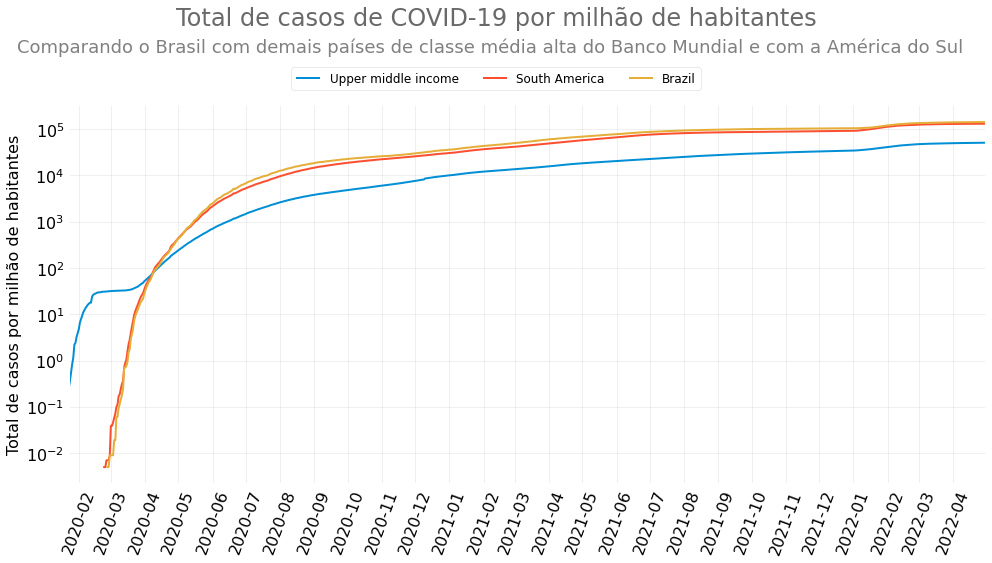

In [92]:
comparing_locations(df, 'date', 'total_cases_per_million', 'Total de casos por milhão de habitantes',
                   ('Upper middle income', 'South America', 'Brazil'),
                   'Total de casos de COVID-19 por milhão de habitantes\n\n',
                    'Comparando o Brasil com demais países de classe média alta do Banco Mundial e com a América do Sul\n',
                    ylog=True)

Vemos que o Brasil acompanha o perfil da América do Sul. No entanto, possui valores acima do agregado de países de renda média alta. No [link do Banco Mundial](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) sobre a classificação, vemos que nessa categoria há países como China, alguns africanos e asiáticos. Conforme descrito no início deste estudo, nem sempre números vindos destes locais são confiáveis. Desta forma, não necessariamente o país, e a América do Sul, estão tendo um desempenho pior para lidar com a doença que os demais países de mesma classificação.

Quanto a novos casos, total de mortes e novas mortes, temos os seguintes gráficos:

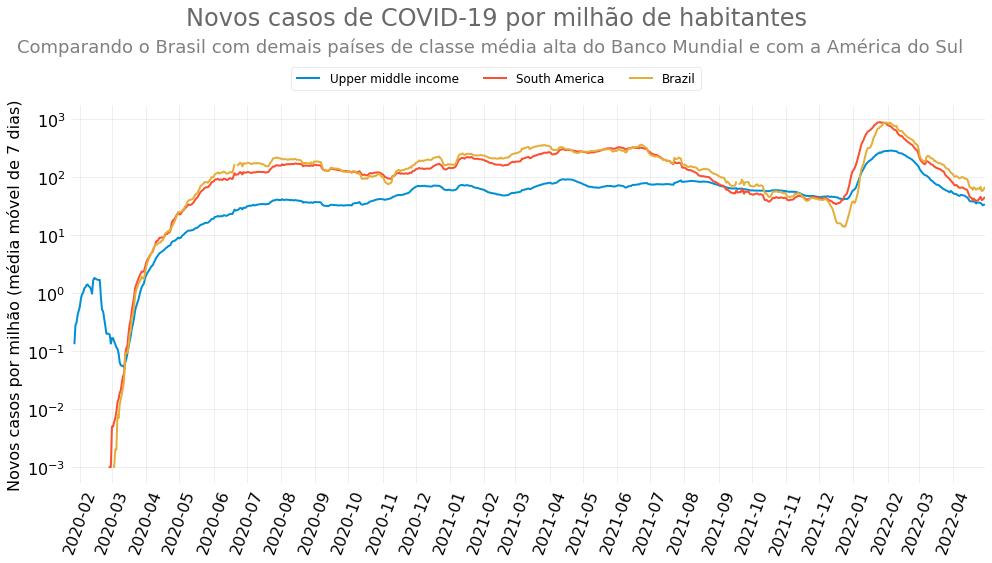

In [93]:
comparing_locations(df, 'date', 'new_cases_smoothed_per_million', 
                    'Novos casos por milhão (média móvel de 7 dias)',
                   ('Upper middle income', 'South America', 'Brazil'),
                   'Novos casos de COVID-19 por milhão de habitantes\n\n',
                    'Comparando o Brasil com demais países de classe média alta do Banco Mundial e com a América do Sul\n',
                    ylog=True)

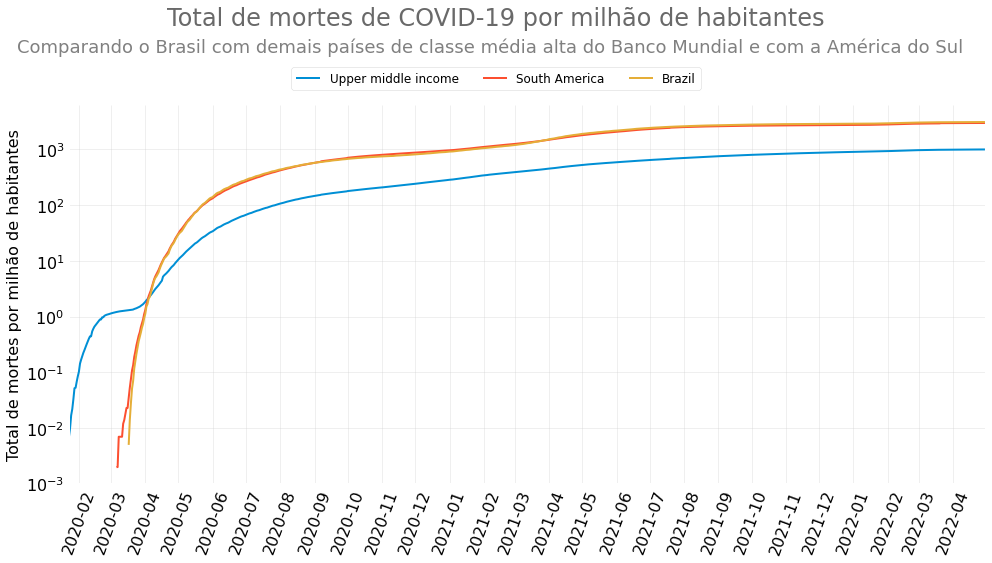

In [94]:
comparing_locations(df, 'date', 'total_deaths_per_million', 'Total de mortes por milhão de habitantes',
                   ('Upper middle income', 'South America', 'Brazil'),
                   'Total de mortes de COVID-19 por milhão de habitantes\n\n',
                    'Comparando o Brasil com demais países de classe média alta do Banco Mundial e com a América do Sul\n',
                    ylog=True)

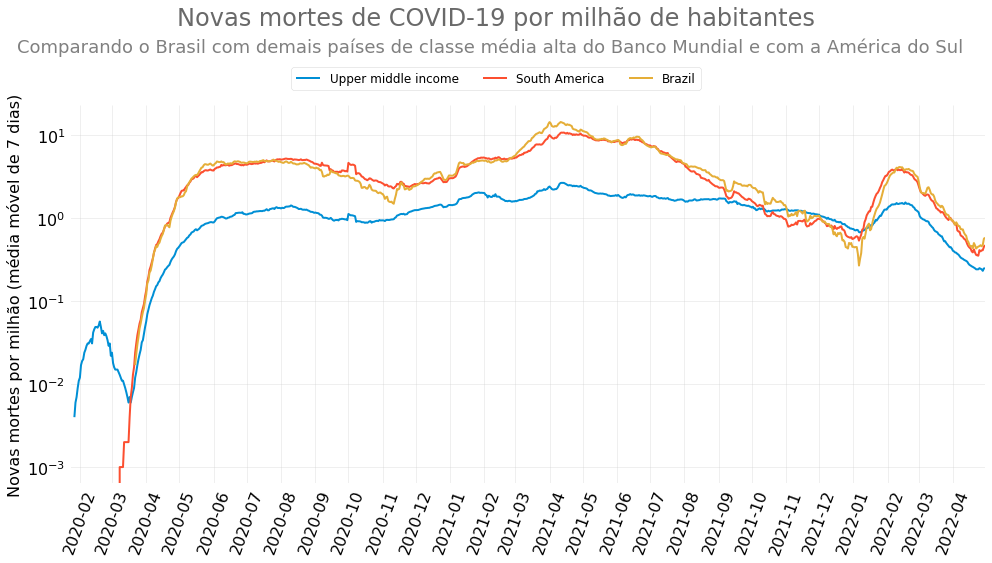

In [95]:
comparing_locations(df, 'date', 'new_deaths_smoothed_per_million', 
                    'Novas mortes por milhão (média móvel de 7 dias)',
                   ('Upper middle income', 'South America', 'Brazil'),
                   'Novas mortes de COVID-19 por milhão de habitantes\n\n',
                    'Comparando o Brasil com demais países de classe média alta do Banco Mundial e com a América do Sul\n',
                    ylog=True)

A mesma discussão feita para o total de casos por milhão pode ser estendida para novos casos, total de mortes e novas mortes.

A seguir, vemos que tanto o Brasil acompanhou o perfil da América do Sul e dos demais países classificados como de renda média alta no quesito vacinação.

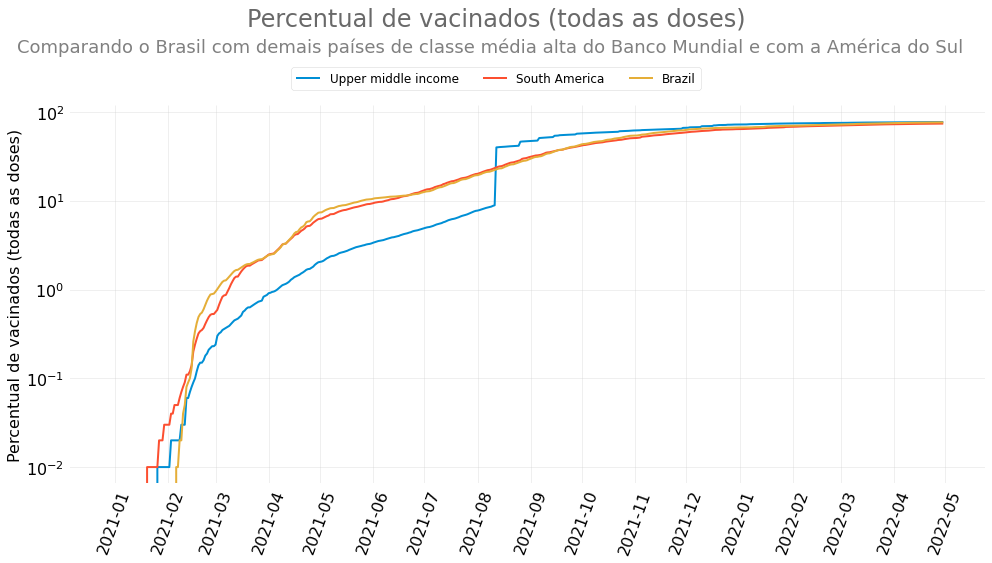

In [96]:
comparing_locations(df, 'date', 'people_fully_vaccinated_per_hundred', 
                    'Percentual de vacinados (todas as doses)',
                   ('Upper middle income', 'South America', 'Brazil'),
                   'Percentual de vacinados (todas as doses)\n\n',
                    'Comparando o Brasil com demais países de classe média alta do Banco Mundial e com a América do Sul\n',
                    ylog=True, limit_dates=False)

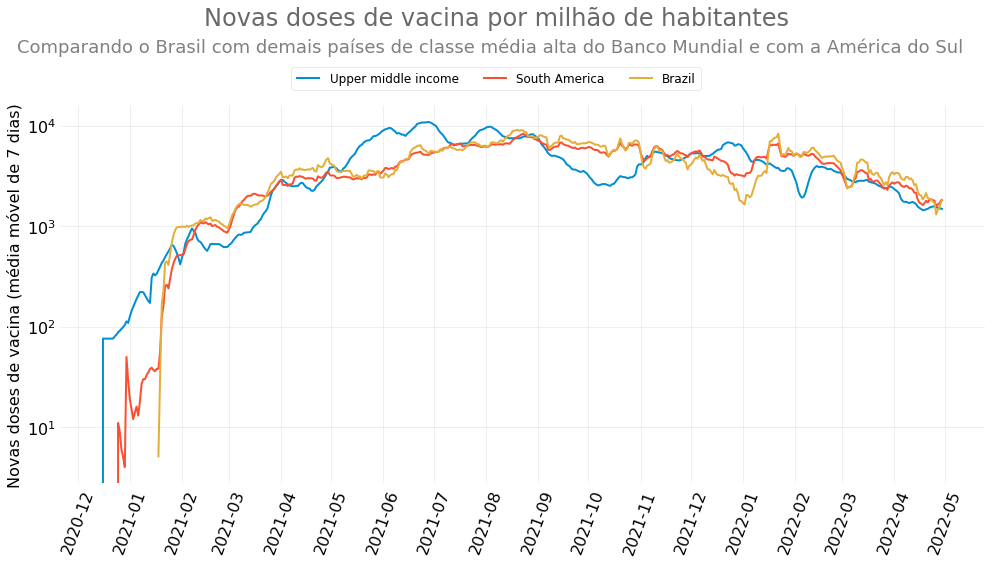

In [97]:
comparing_locations(df, 'date', 'new_vaccinations_smoothed_per_million', 
                    'Novas doses de vacina (média móvel de 7 dias)',
                   ('Upper middle income', 'South America', 'Brazil'),
                   'Novas doses de vacina por milhão de habitantes\n\n',
                    'Comparando o Brasil com demais países de classe média alta do Banco Mundial e com a América do Sul\n',
                    limit_dates=False, ylog=True)

Infelizmente a base de dados é bem incompleta para o Brasil. Vejamos:

In [98]:
df_brazil = df.loc[df['location'] == "Brazil"].copy()
df_brazil.head()

iso_code      continent location       date  total_cases  new_cases  \
23392      BRA  South America   Brazil 2020-02-26          1.0        1.0   
23393      BRA  South America   Brazil 2020-02-27          1.0        0.0   
23394      BRA  South America   Brazil 2020-02-28          1.0        0.0   
23395      BRA  South America   Brazil 2020-02-29          2.0        1.0   
23396      BRA  South America   Brazil 2020-03-01          2.0        0.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
23392                 NaN           NaN         NaN                  NaN  ...   
23393                 NaN           NaN         NaN                  NaN  ...   
23394                 NaN           NaN         NaN                  NaN  ...   
23395                 NaN           NaN         NaN                  NaN  ...   
23396                 NaN           NaN         NaN                  NaN  ...   

       female_smokers  male_smokers  handwashing_facilities  \
23392            10.1          17.9                     NaN   
23393            10.1          17.9                     NaN   
23394            10.1          17.9                     NaN   
23395            10.1          17.9                     NaN   
23396            10.1          17.9                     NaN   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
23392                         2.2            75.88                    0.765   
23393                         2.2            75.88                    0.765   
23394                         2.2            75.88                    0.765   
23395                         2.2            75.88                    0.765   
23396                         2.2            75.88                    0.765   

       excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
23392                                   NaN                          NaN   
23393                                   NaN                          NaN   
23394                                   NaN                          NaN   
23395                                7049.6                         3.31   
23396                                   NaN                          NaN   

       excess_mortality  excess_mortality_cumulative_per_million  
23392               NaN                                      NaN  
23393               NaN                                      NaN  
23394               NaN                                      NaN  
23395              5.25                                32.943066  
23396               NaN                                      NaN  

[5 rows x 67 columns]

In [99]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 23392 to 24186
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    795 non-null    object        
 1   continent                                   795 non-null    object        
 2   location                                    795 non-null    object        
 3   date                                        795 non-null    datetime64[ns]
 4   total_cases                                 795 non-null    float64       
 5   new_cases                                   793 non-null    float64       
 6   new_cases_smoothed                          788 non-null    float64       
 7   total_deaths                                775 non-null    float64       
 8   new_deaths                                  775 non-null    float64       
 9   new_

In [100]:
for cat in columns_per_category:
    print(f'{cat.upper():^30}')
    print((df_brazil[list(columns_per_category[cat])].isnull().sum() / df_brazil.shape[0]).sort_values(ascending=False))
    print()

            OTHERS            
handwashing_facilities        1.0
iso_code                      0.0
extreme_poverty               0.0
life_expectancy               0.0
hospital_beds_per_thousand    0.0
male_smokers                  0.0
female_smokers                0.0
diabetes_prevalence           0.0
cardiovasc_death_rate         0.0
gdp_per_capita                0.0
continent                     0.0
aged_70_older                 0.0
aged_65_older                 0.0
median_age                    0.0
population_density            0.0
population                    0.0
date                          0.0
location                      0.0
human_development_index       0.0
dtype: float64

       CONFIRMED CASES        
new_cases_smoothed                0.008805
new_cases_smoothed_per_million    0.008805
new_cases                         0.002516
new_cases_per_million             0.002516
total_cases                       0.000000
total_cases_per_million           0.000000
dtype: float64

  

Vemos que há diversos dados ausentes referentes a hospitalizações e testes. Em breve farei um estudo focado no país utilizando dados oficias governamentais. Acompanhe meu [perfil no LinkedIn](https://www.linkedin.com/in/flsbustamante/) para saber quando eu divulgar. 

## Conclusões


<center><img alt="covid_banner" width="50%" src="https://image.freepik.com/free-photo/digital-world-map-hologram-blue-background_1379-901.jpg"></center>

Foi um longo estudo, mas espero que tenha sido proveitoso e que tenha trazido novas visões a respeito da pandemia. Busquei colocar links para diversas notícias e estudos com o intuito de embasar afirmações e facilitar a compreensão por parte dos leitores. Vamos fazer uma breve recaptulação do que foi mostrado:

- evolução de casos e mortes e possíveis relações com variantes 
- sazonalidade dos casos e mortes e possível relação com períodos de inverno
- importância de avaliar os dados por milhão de habitantes ao invés dos totais
- correlações existentes entre diversas variáveis

Caso tenha dúvidas, comentários e/ou críticas construtivas me procure:

- [LinkedIn](https://www.linkedin.com/in/flsbustamante/)
- [GitHub](https://github.com/chicolucio)
- [Site](https://franciscobustamante.com.br/)